# WiDS Datathon 2020

[Kaggle Challenge WiDS Datathon 2020](https://www.kaggle.com/c/widsdatathon2020/data)

In [14]:
import pandas as pd
import numpy as np
import sklearn as skl
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns


#Pandas - Mehr Zeilen und Spalten anzeigen
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [9]:
def my_df_summary(data):
    '''Eigene Funktion für die Summary'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.sum(), dat.min(), dat.max(), dat.mean(), dat.std(), dat.median(), dat.count(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Summe','Minimum', 'Maximum', 'Mittelwert', 'Stand. Abw.', 'Median', 'Anzahl', '#NA', '#Uniques', 'dtypes'])        
        print('Insgesamt sind {} Datenzeilen enthalten.'.format(len(data)))
        return df
    except:
        print('Es konnte keine Summary erstellt werden.')
        return data

In [28]:

def my_df_summary(data):
    '''Eigene Funktion für die Summary'''
    try:
        dat = data.copy()
        Q1 = dat.quantile(0.25)
        Q3 = dat.quantile(0.75)
        IQR = Q3 - Q1        
    
        df = pd.DataFrame([dat.sum(), dat.min(), dat.max(), ((dat < (Q1 - 1.5 * IQR)) | (dat > (Q3 + 1.5 * IQR))).sum(), dat.mean(), dat.std(), dat.median(), dat.count(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Summe','Minimum', 'Maximum', 'Ausreißer', 'Mittelwert', 'Stand. Abw.', 'Median', 'Anzahl', '#NA', '#Uniques', 'dtypes'])        
        print('Insgesamt sind {} Datenzeilen enthalten.'.format(len(data)))
        return df
    except:
        print('Es konnte keine Summary erstellt werden.')
        return data

In [3]:
#!kaggle competitions download -c widsdatathon2020


  0%|          | 0.00/22.8M [00:00<?, ?B/s]
  4%|4         | 1.00M/22.8M [00:00<00:05, 4.25MB/s]
  9%|8         | 2.00M/22.8M [00:00<00:04, 4.60MB/s]
 13%|#3        | 3.00M/22.8M [00:00<00:04, 4.93MB/s]
 18%|#7        | 4.00M/22.8M [00:00<00:03, 5.14MB/s]
 22%|##1       | 5.00M/22.8M [00:00<00:03, 5.32MB/s]
 26%|##6       | 6.00M/22.8M [00:01<00:03, 5.48MB/s]
 31%|###       | 7.00M/22.8M [00:01<00:02, 5.57MB/s]
 35%|###5      | 8.00M/22.8M [00:01<00:02, 5.63MB/s]
 40%|###9      | 9.00M/22.8M [00:01<00:02, 5.64MB/s]
 44%|####3     | 10.0M/22.8M [00:01<00:02, 5.69MB/s]
 48%|####8     | 11.0M/22.8M [00:02<00:02, 5.72MB/s]
 53%|#####2    | 12.0M/22.8M [00:02<00:01, 5.75MB/s]
 57%|#####7    | 13.0M/22.8M [00:02<00:01, 5.76MB/s]
 61%|######1   | 14.0M/22.8M [00:02<00:01, 5.78MB/s]
 66%|######5   | 15.0M/22.8M [00:02<00:01, 5.78MB/s]
 70%|#######   | 16.0M/22.8M [00:02<00:01, 5.79MB/s]
 75%|#######4  | 17.0M/22.8M [00:03<00:01, 5.59MB/s]
 79%|#######9  | 18.0M/22.8M [00:03<00:00, 5.67MB/s]
 

In [106]:
data = pd.read_csv(r'widsdatathon2020/training_v2.csv')

## Data manipulation

### Changing Gender variable

In [108]:
data['gender'].replace({'M':0,'F':1},inplace=True)
data.rename(columns={"gender":"is_women"}, inplace= True)

### Adding BMI

In [111]:
data['bmi'] = data['weight']/((data['height']/100)**2)

### Adding Weight Class

In [116]:
def weighted_class(x): 
    if x < 15: 
        return 'very severely underweight' 
    elif x >= 15 and x < 16: 
        return 'severely weight' 
    elif x >=16 and x < 18.5: 
        return 'underweight' 
    elif x >= 18.5 and x < 25: 
        return 'healthy weight' 
    elif x >= 25 and x < 30: 
        return 'overweight' 
    elif x >= 30 and x < 35: 
        return 'class 1' 
    elif x >= 35 and x < 40: 
        return 'class 2' 
    else: 
        return 'class 3' 
    
data['weightclass'] = data['bmi'].map(weighted_class)

## Data Overview

In [194]:
data.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,is_women,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,weightclass,ethnicity,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,weightclass
0,66154,25312,118,0,68.0,22.732803,0,0.0,180.3,92,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,999.0,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,999.0,999.0,999.0,999.00,36.0,134.0,39.3,999.0,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,999.0,999.0,68.0,63.0,68.0,63.0,119.0,108.0,999.0,999.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,999.0,999.0,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,999.0,999.0,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.00,999.00,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.00,999.00,999.0,

In [118]:
my_df_summary(data)

Insgesamt sind 91713 Datenzeilen enthalten.


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,is_women,height,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,weightclass,apache_2_bodysystem,apache_3j_bodysystem,ethnicity,hospital_admit_source,icu_admit_source
Summe,6016930349,6010606938,9691245,7915,5.45115e+06,2.57083e+06,16851,42219,1.5332e+07,46623009,admitadmitadmitadmitadmitadmitadmitadmitadmita...,CTICUMed-Surg ICUMed-Surg ICUCTICUMed-Surg ICU...,76650.6,0,7.47793e+06,108379,1.66956e+07,5.05811e+07,18444,2546,38539.3,1.87107e+06,107834,12418.4,311203,491379,864,358779,1.29347e+07,9.05697e+06,2.36975e+06,13761,7.98471e+06,879310,879310,2.73379e+06,153292,2.33535e+06,1.00871e+07,3.19009e+06,7.42505e+07,29640,845705,1.86882e+06,1.10905e+06,8.10125e+06,4.59217e+06,8.03458e+06,4.55565e+06,9.43156e+06,6.43923e+06,2.75e+06,1.49165e+06,9.57486e+06,5.93532e+06,9.43762e+06,5.85994e+06,2.63781e+06,1.17322e+06,9.06872e+06,8.26576e+06,3.66463e+06,2.22845e+06,1.35811e+07,8.87377e+06,1.34429e+07,8.79594e+06,3.3328e+06,3.242e+06,1.14088e+06,942359,6.63828e+06,5.53566e+06,6.39522e+06,5.3377e+06,8.2013e+06,7.43963e+06,1.60059e+06,1.28156e+06,7.97711e+06,6.91368e+06,7.56833e+06,6.5863e+06,1.97718e+06,1.50353e+06,8.58165e+06

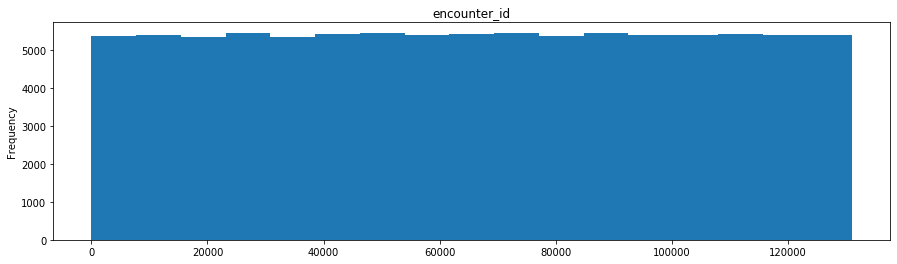

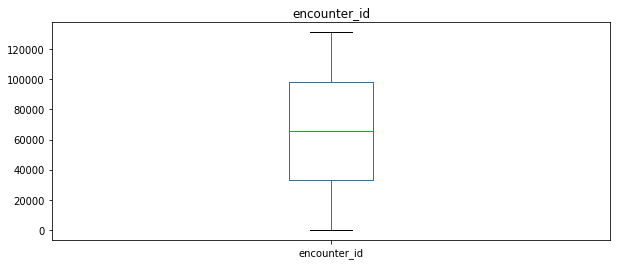

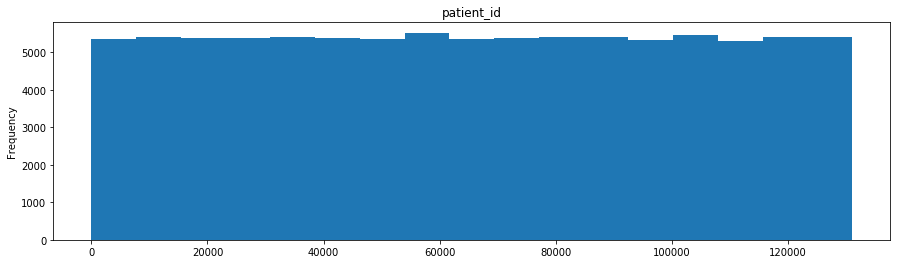

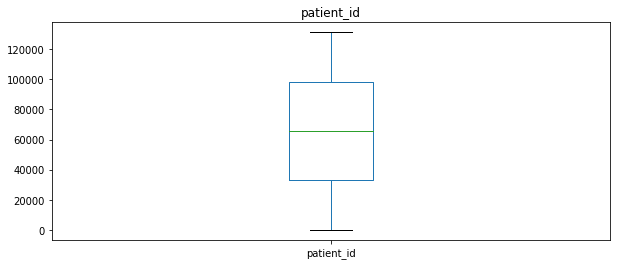

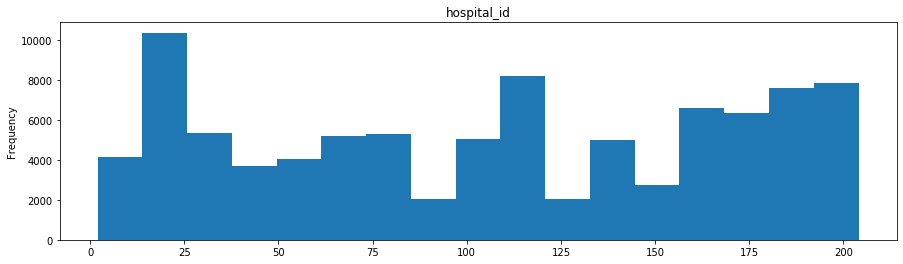

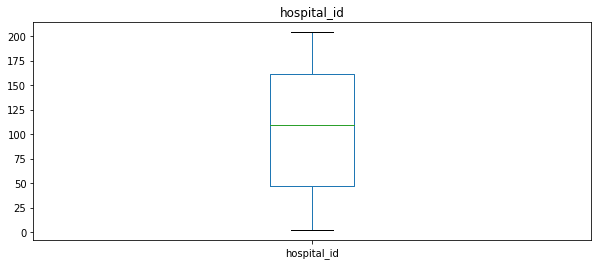

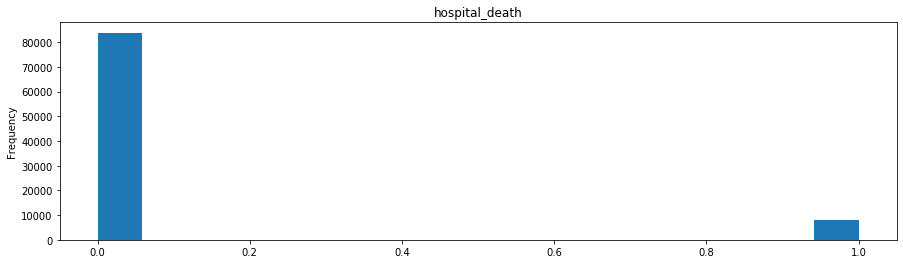

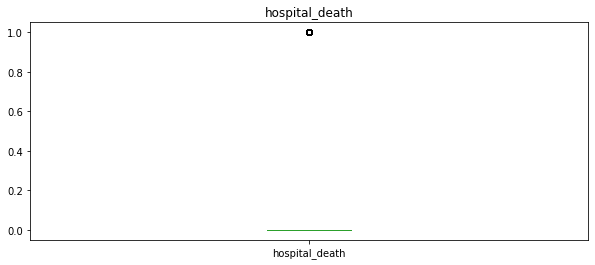

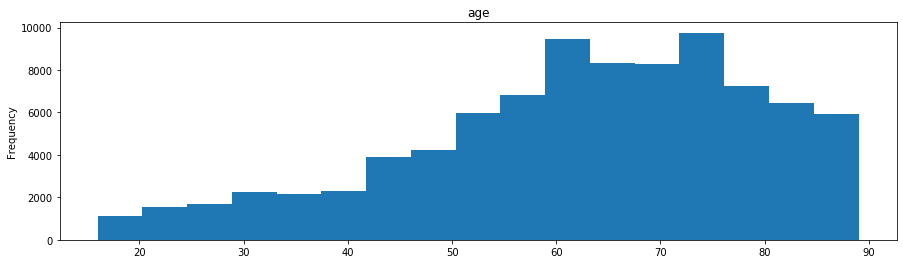

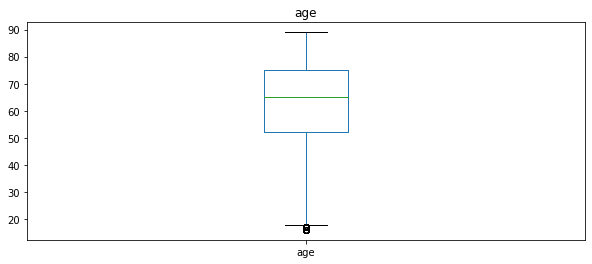

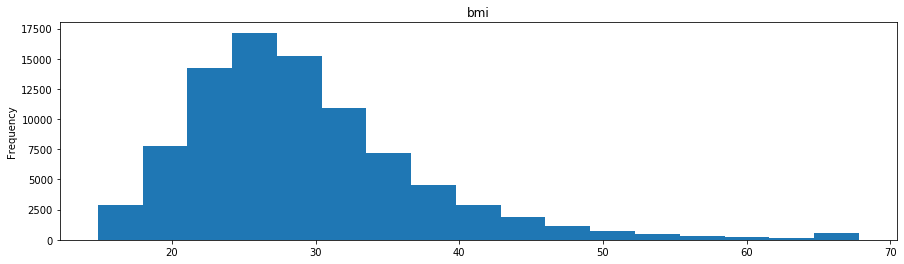

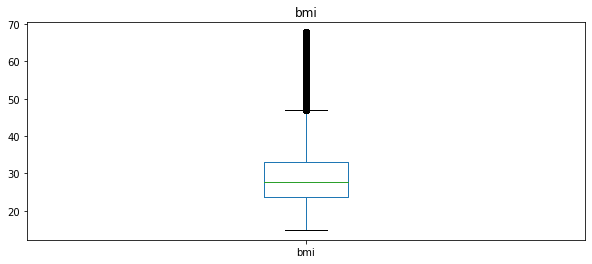

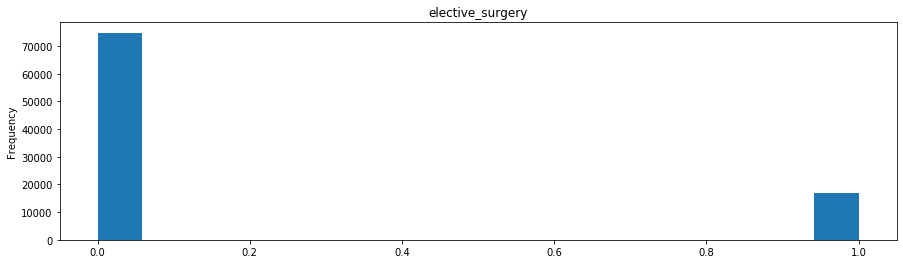

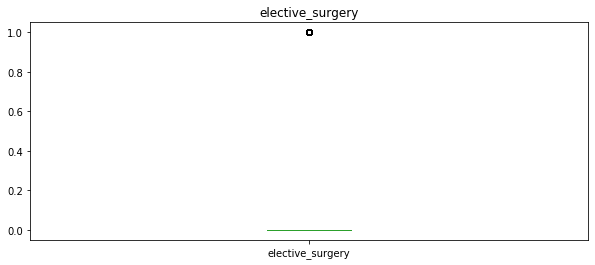

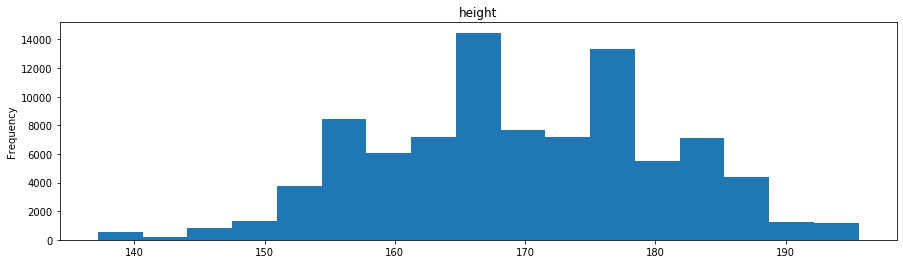

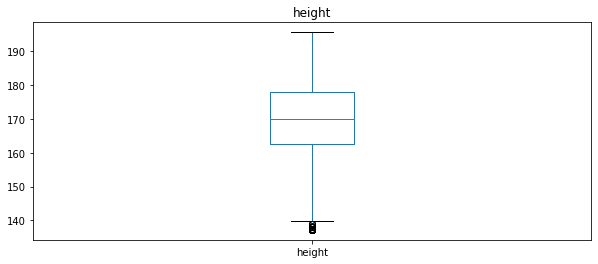

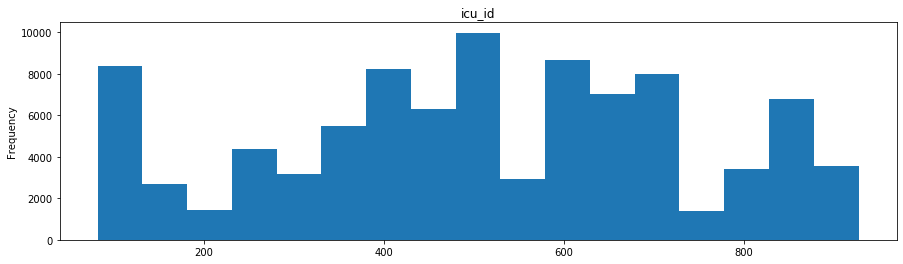

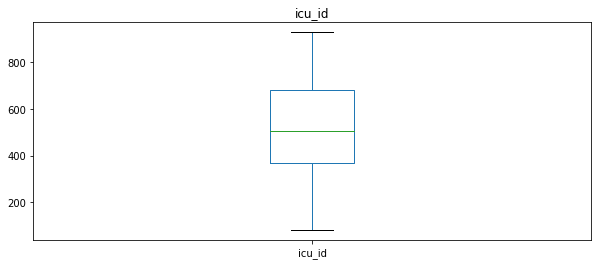

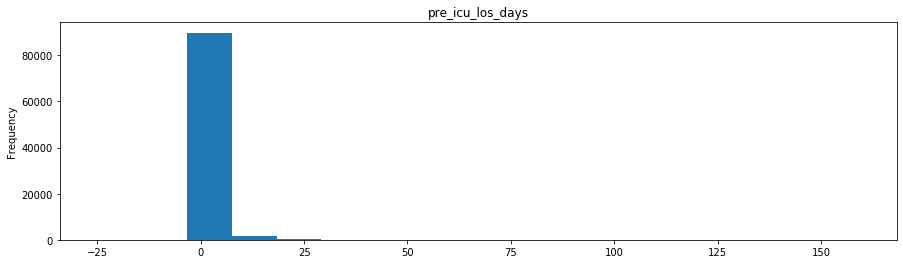

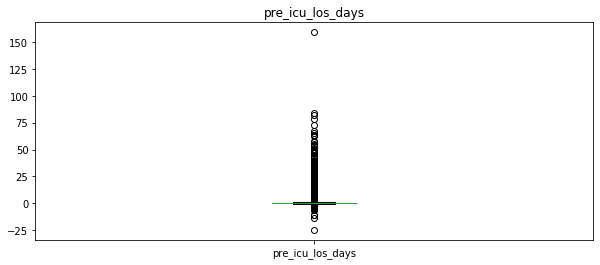

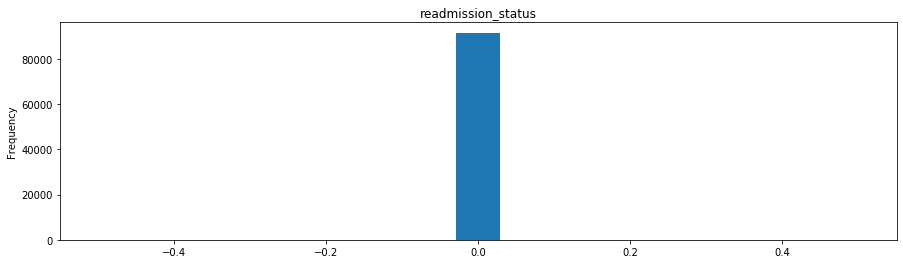

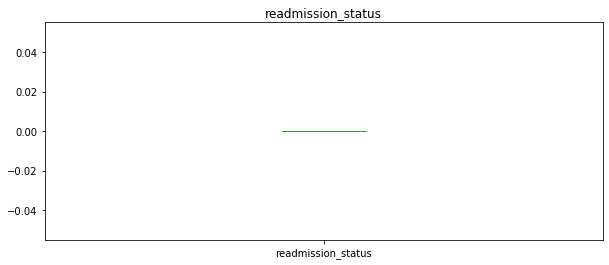

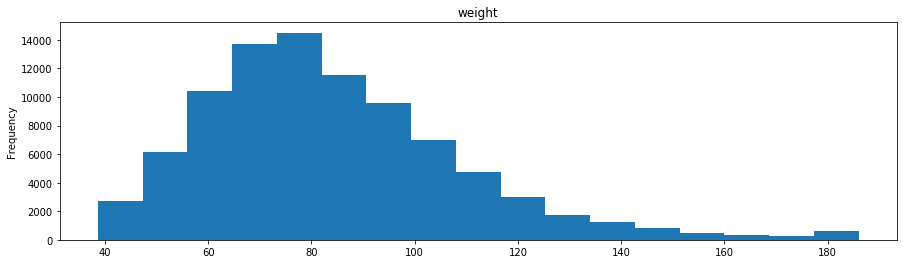

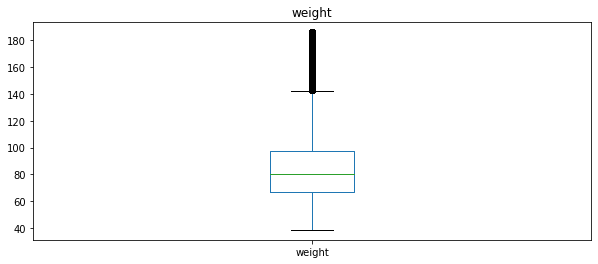

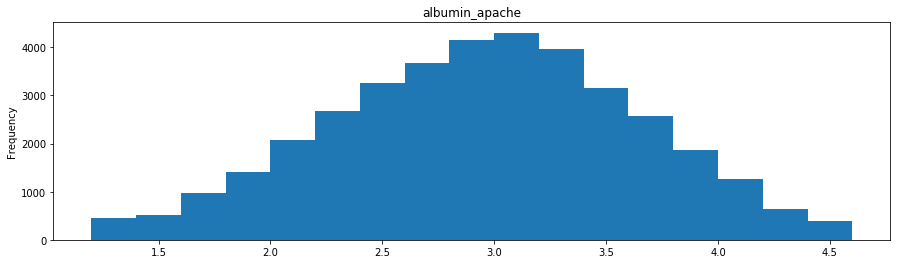

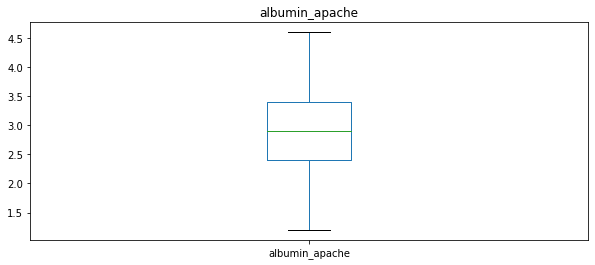

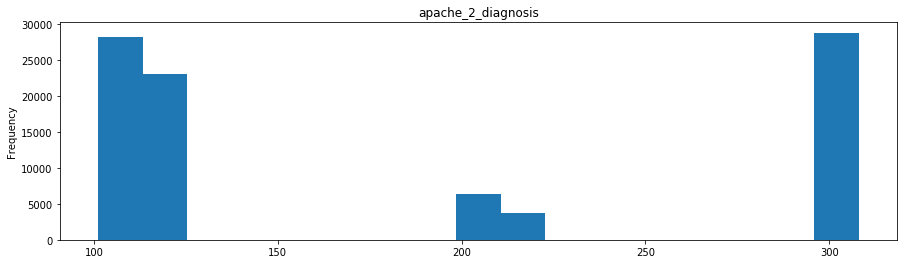

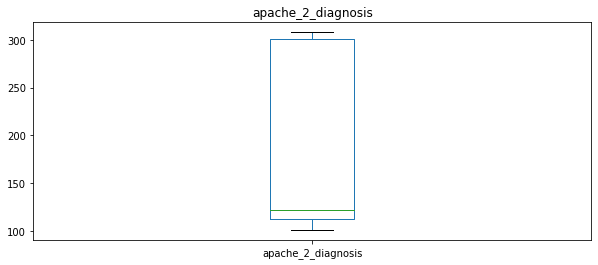

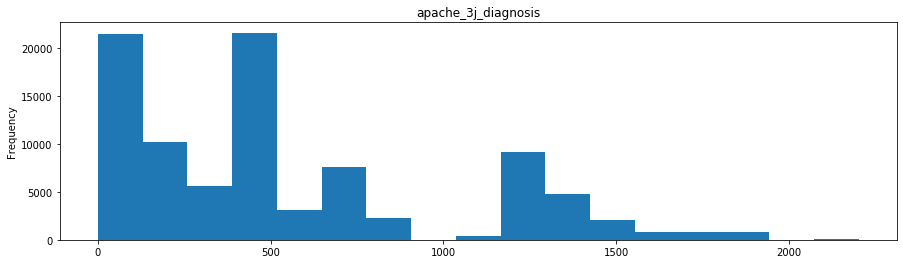

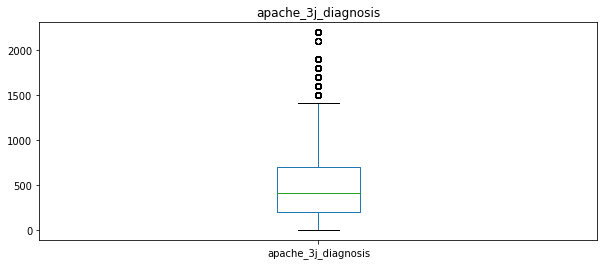

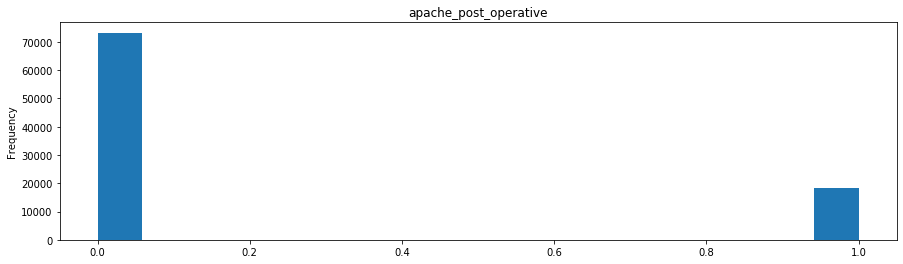

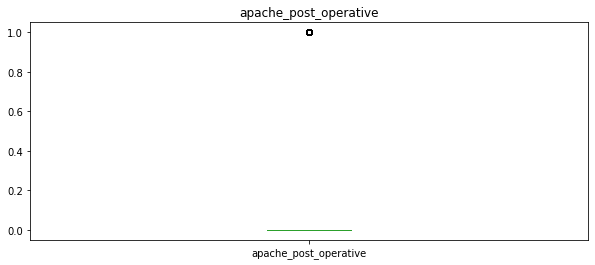

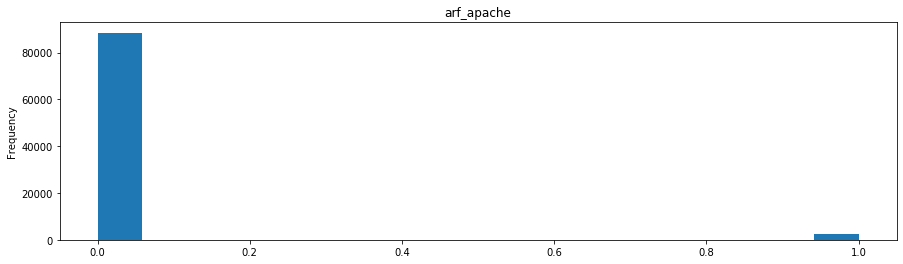

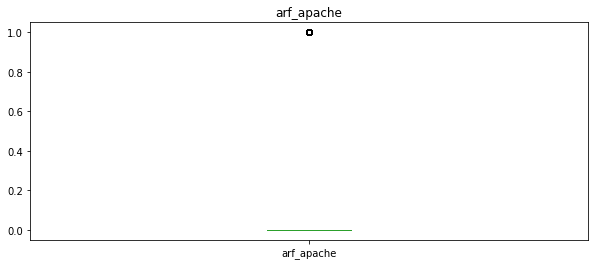

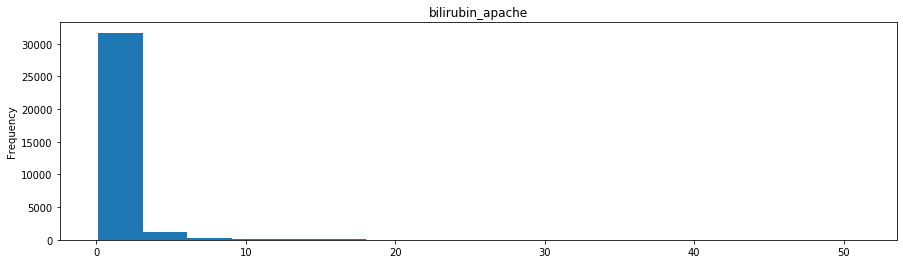

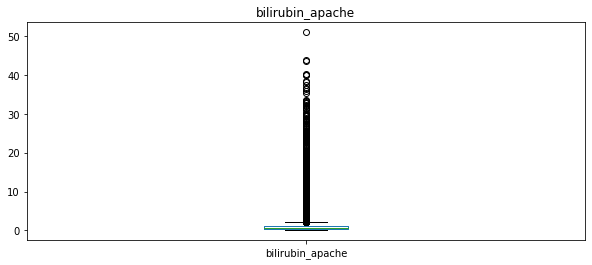

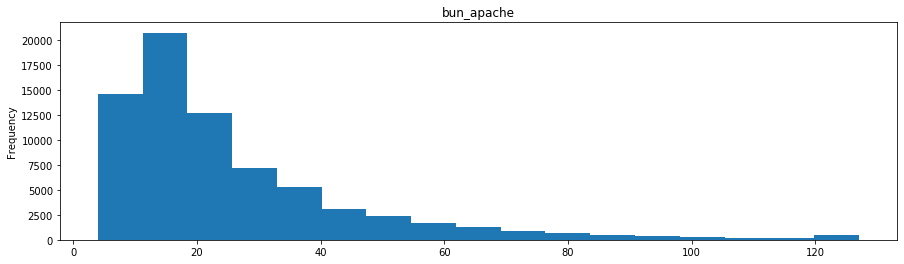

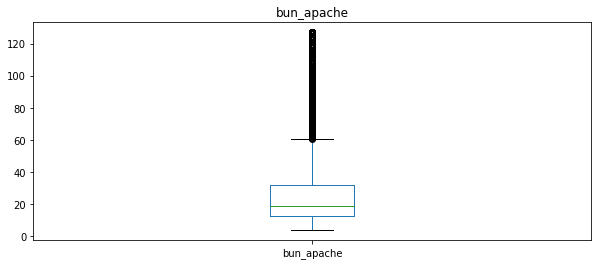

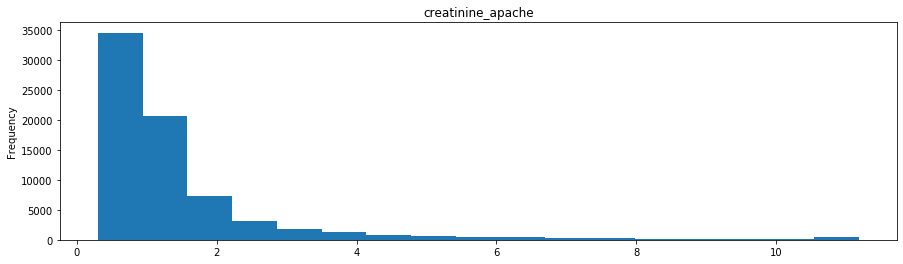

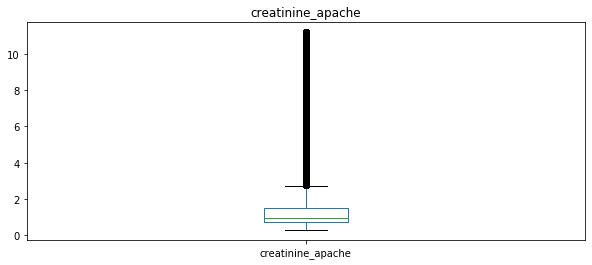

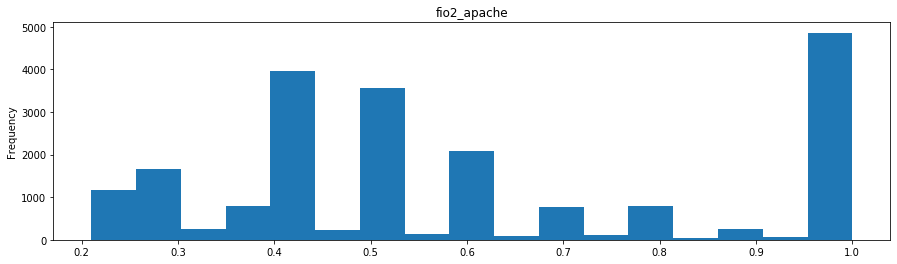

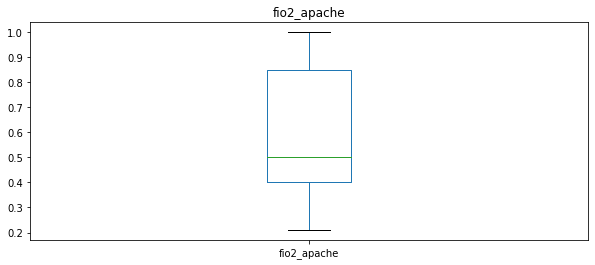

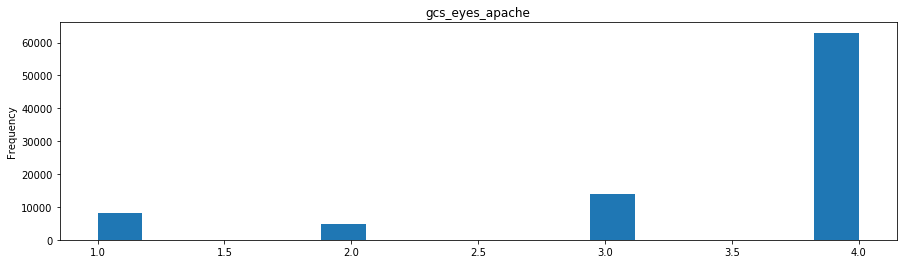

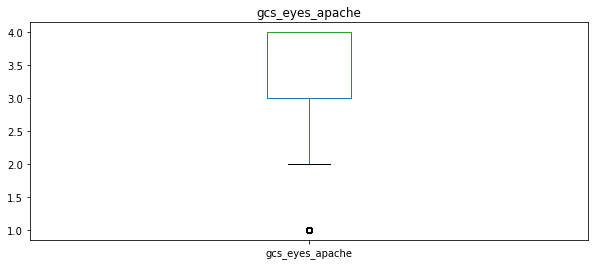

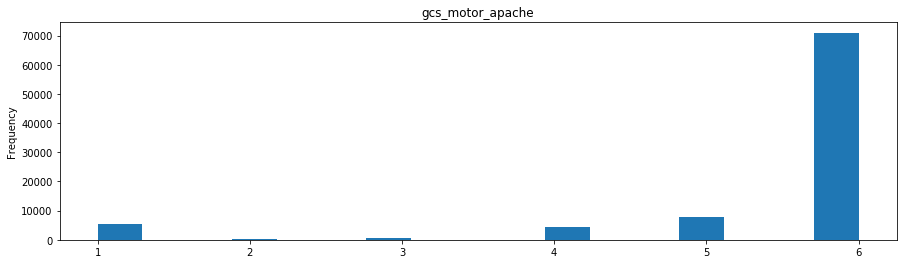

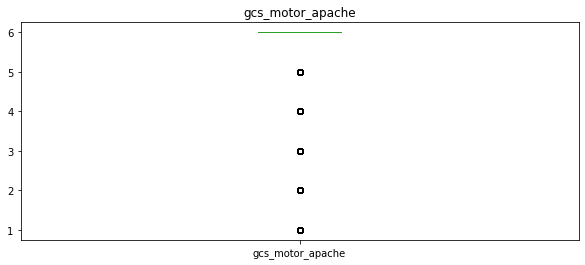

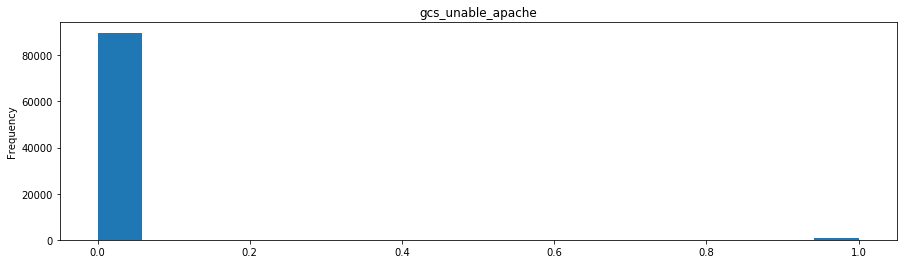

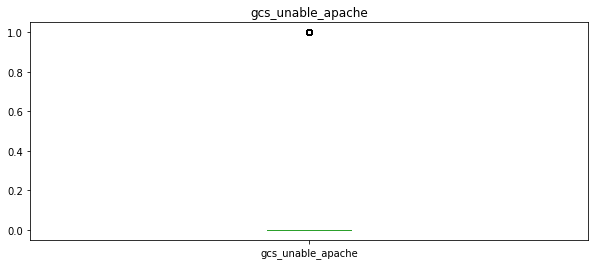

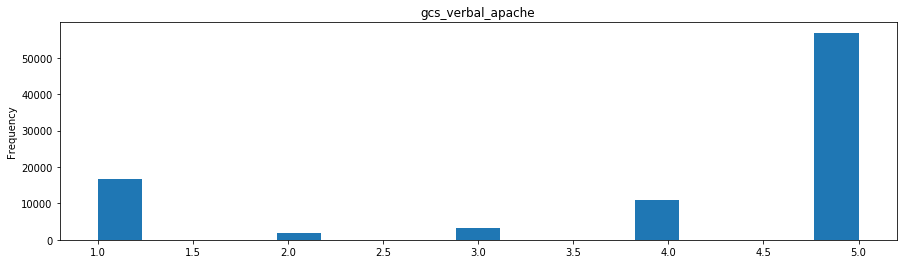

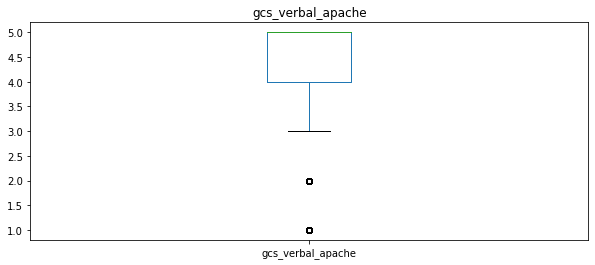

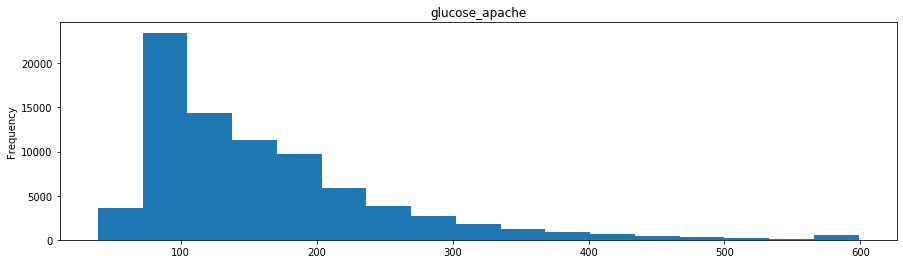

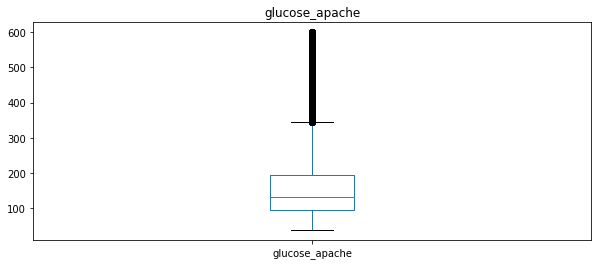

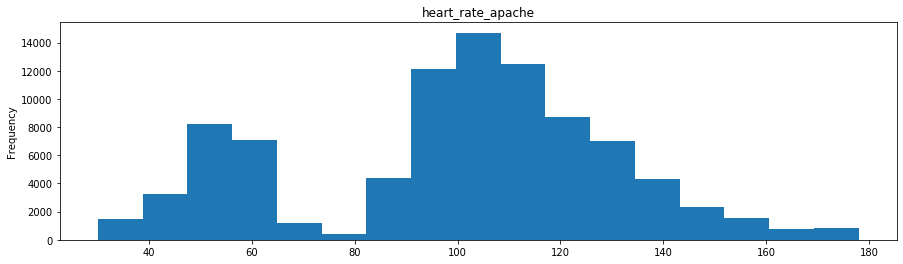

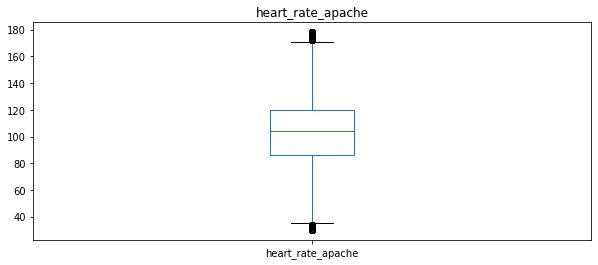

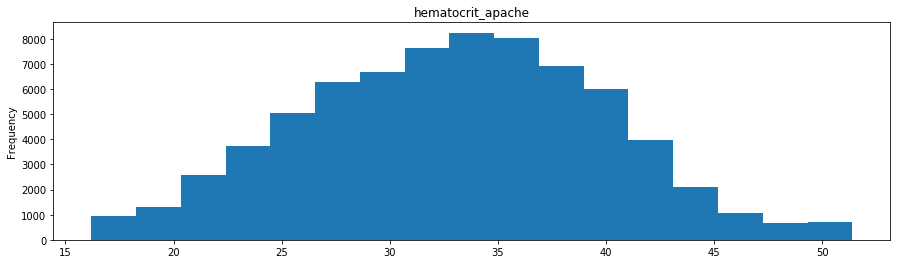

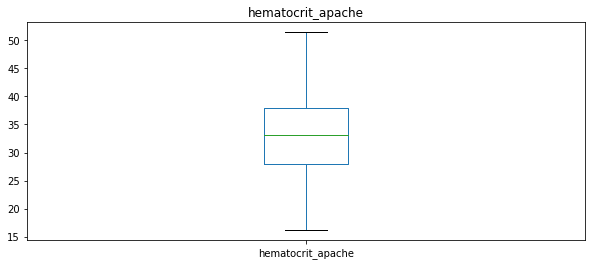

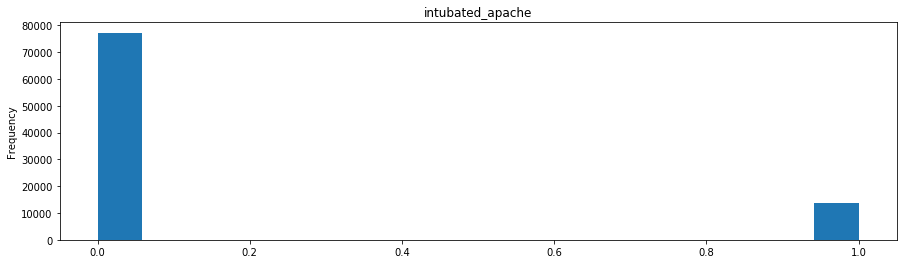

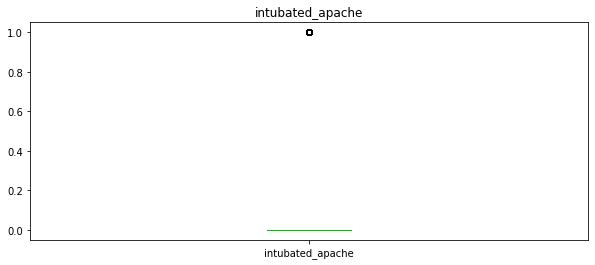

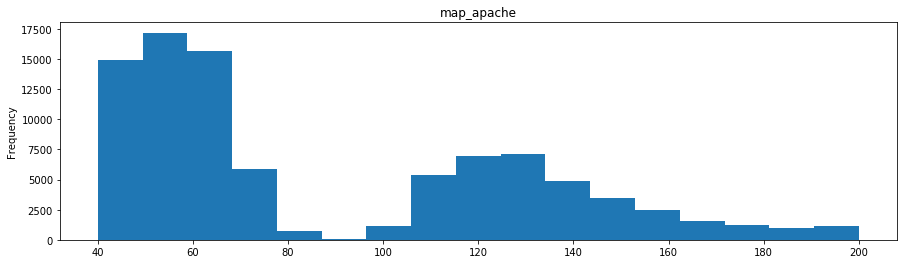

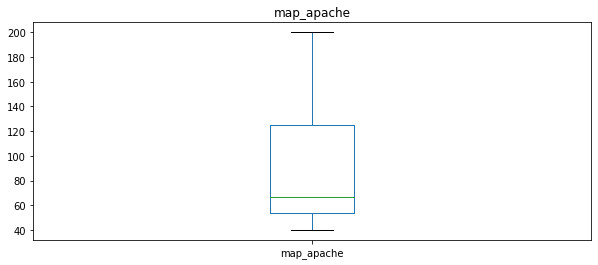

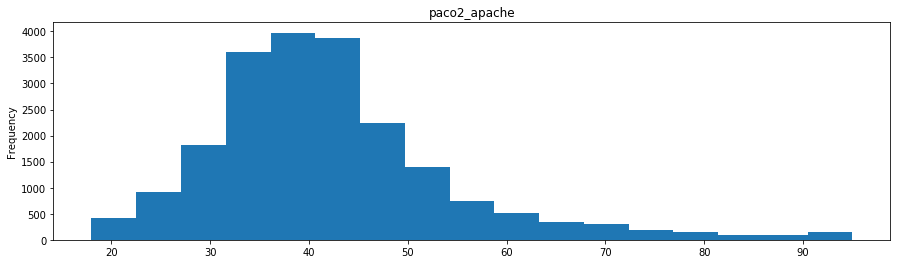

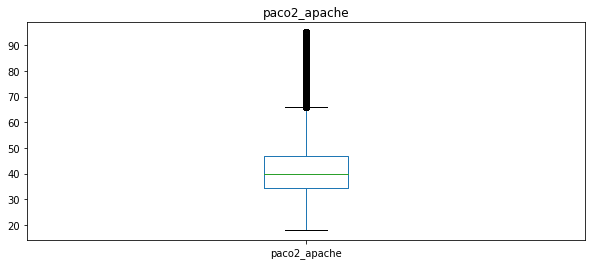

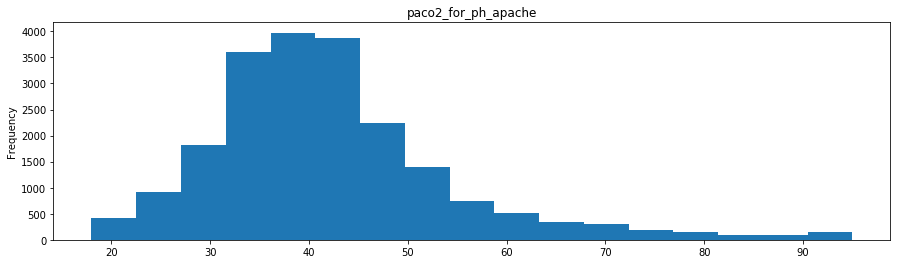

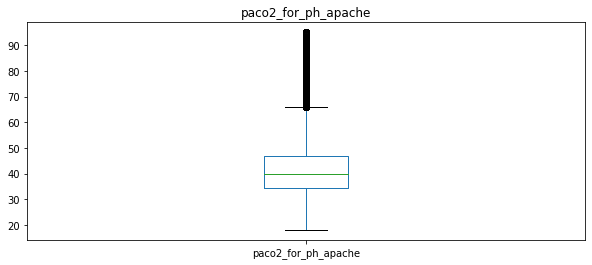

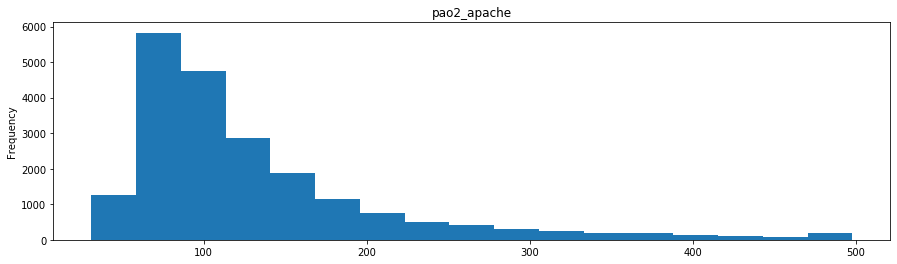

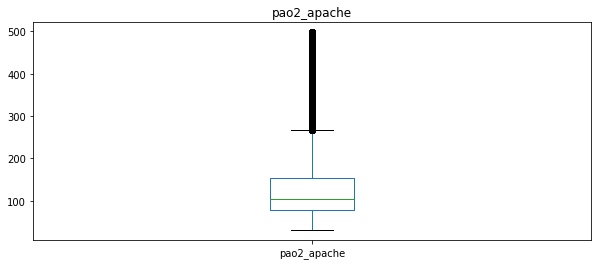

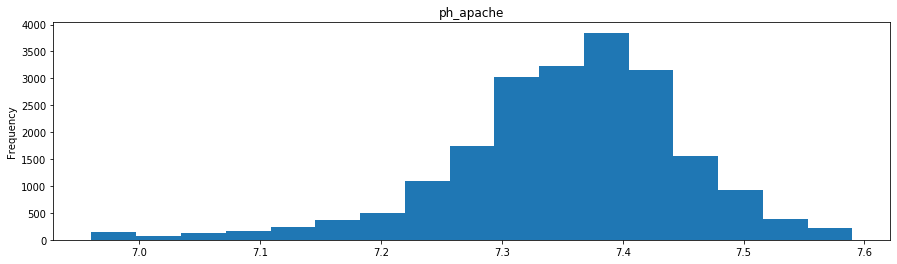

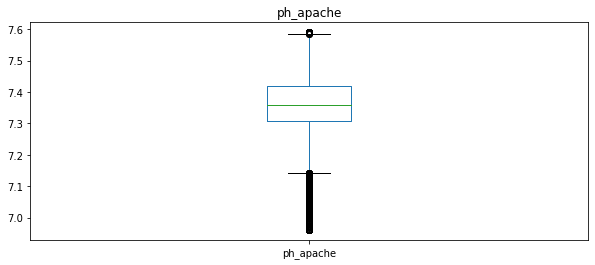

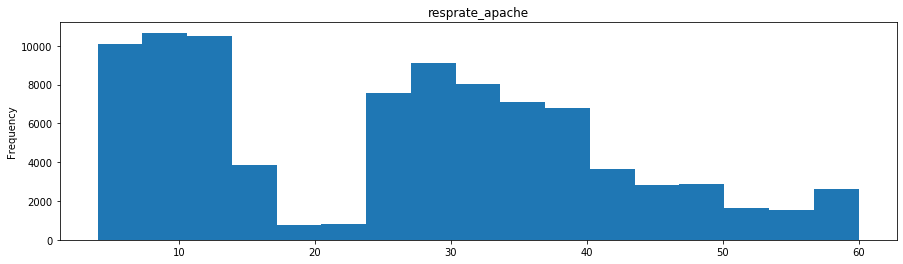

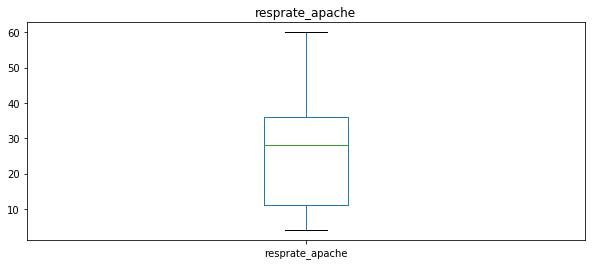

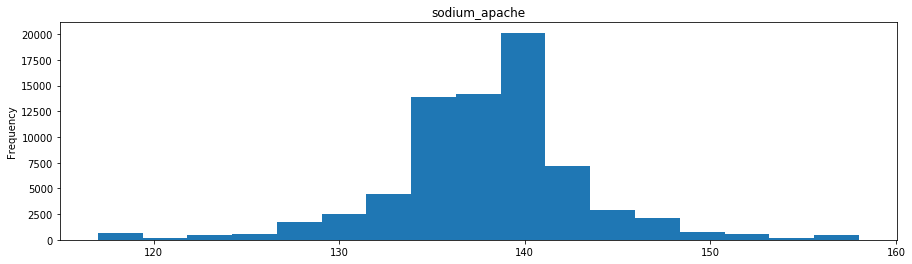

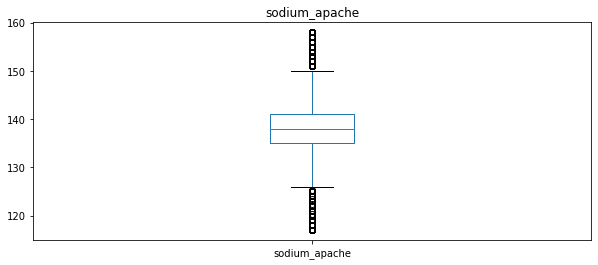

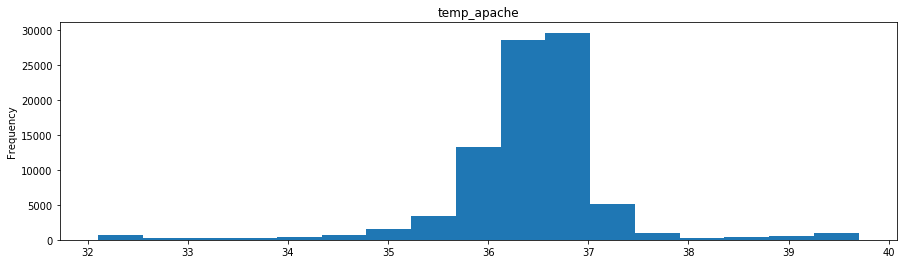

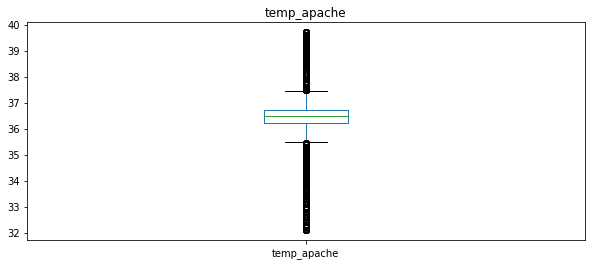

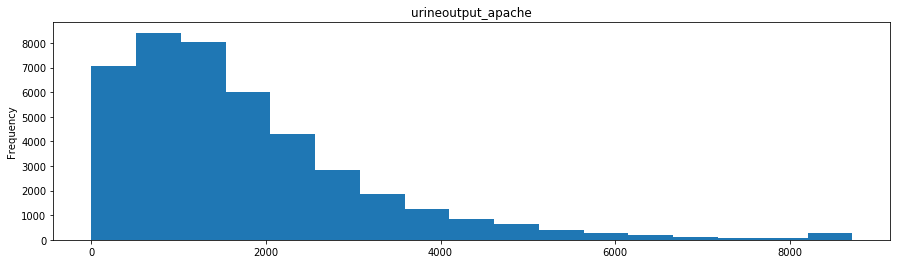

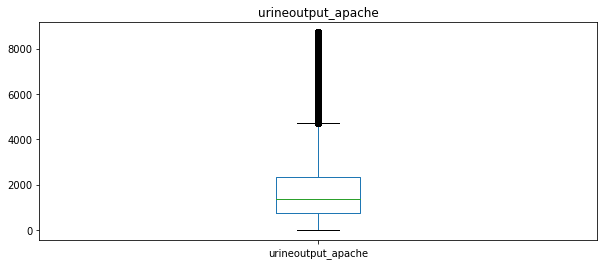

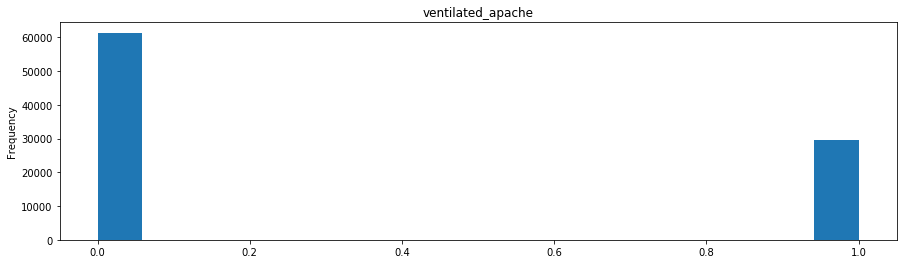

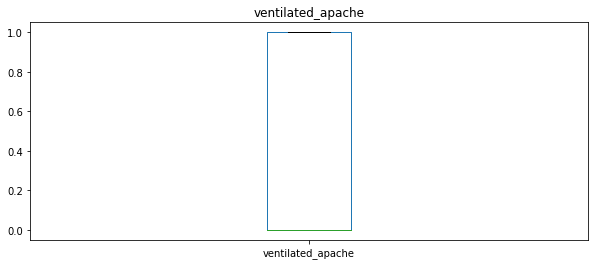

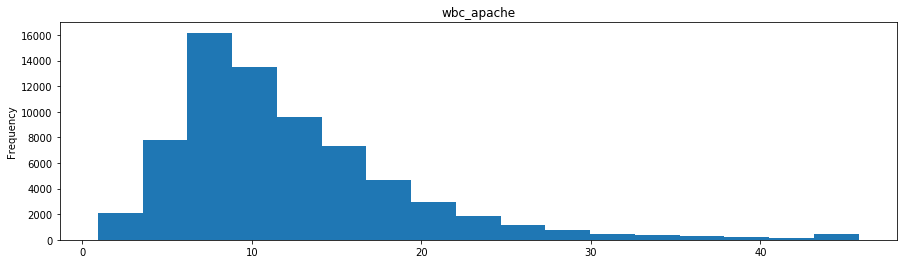

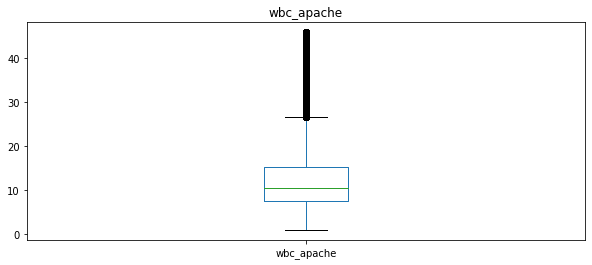

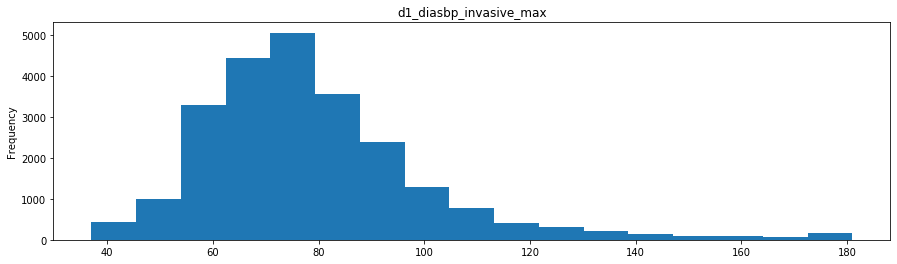

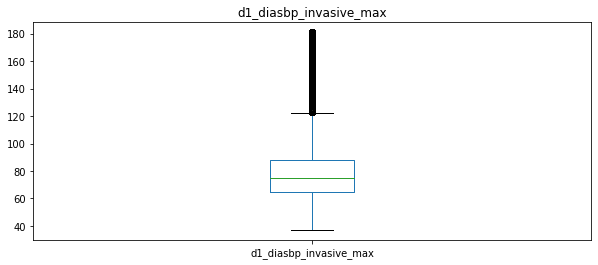

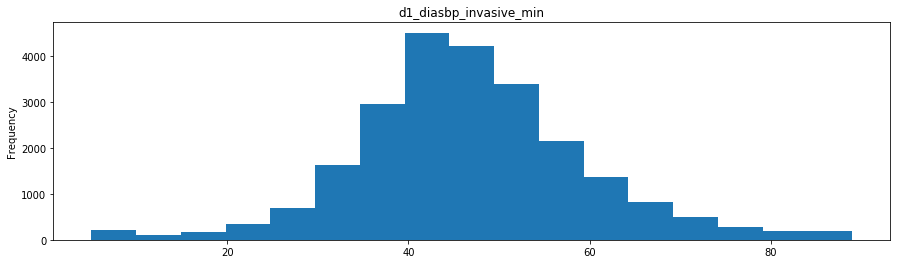

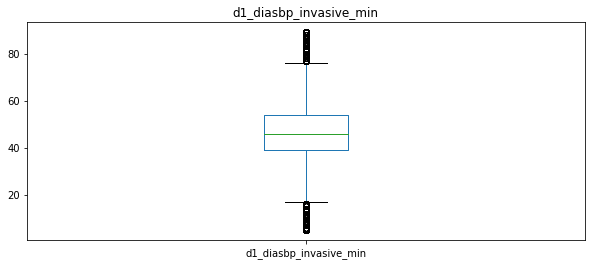

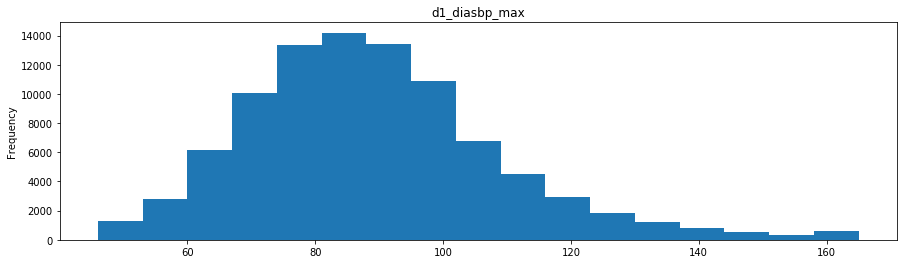

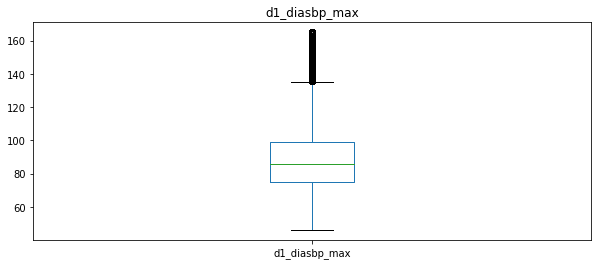

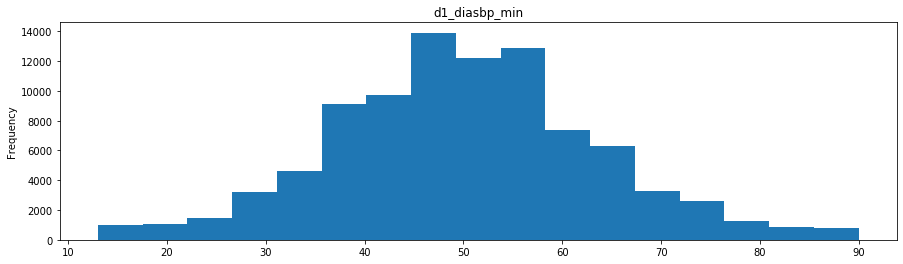

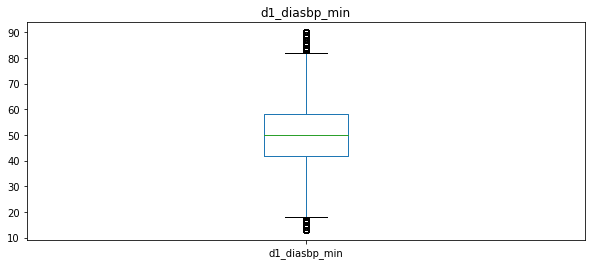

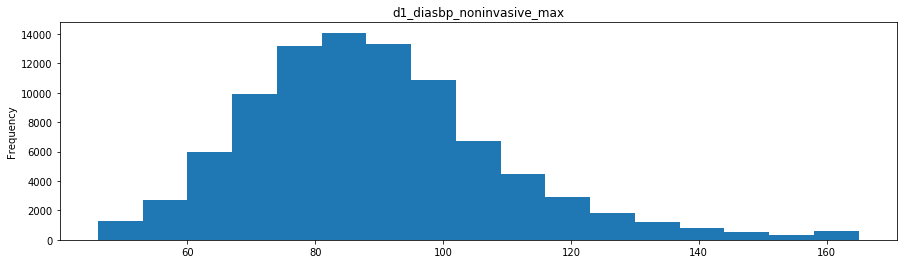

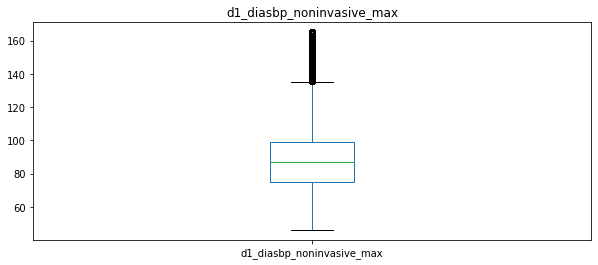

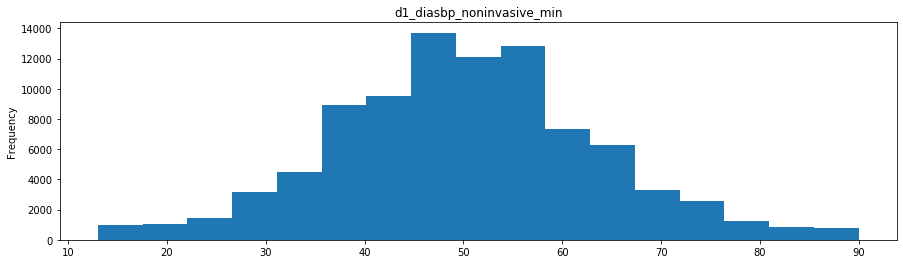

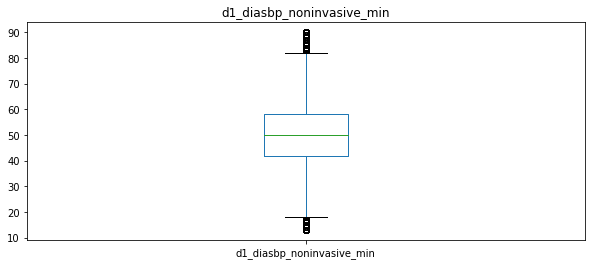

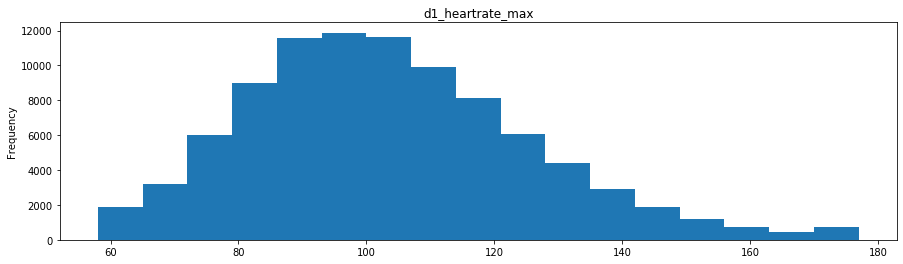

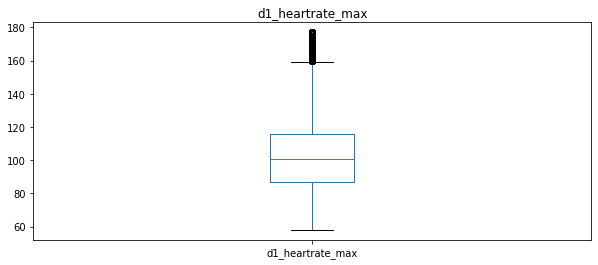

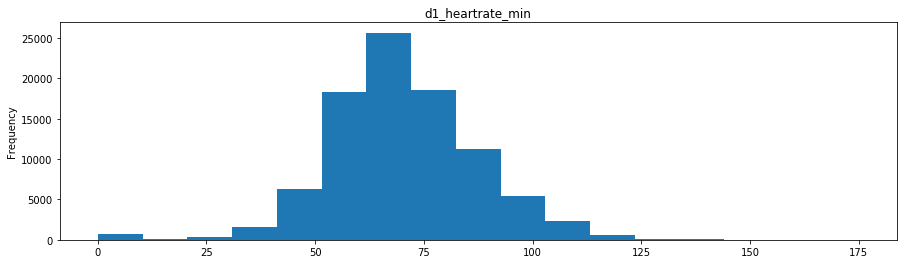

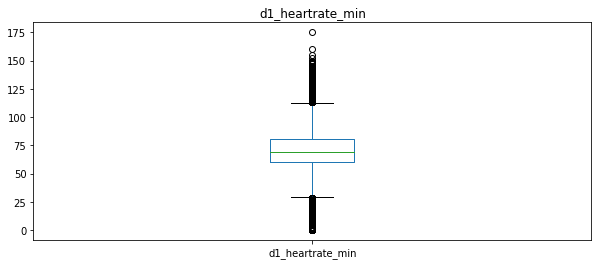

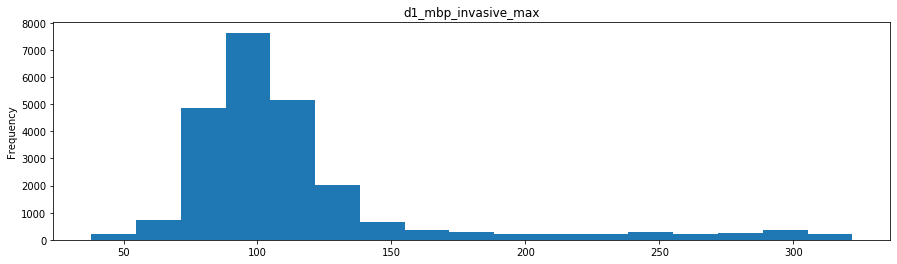

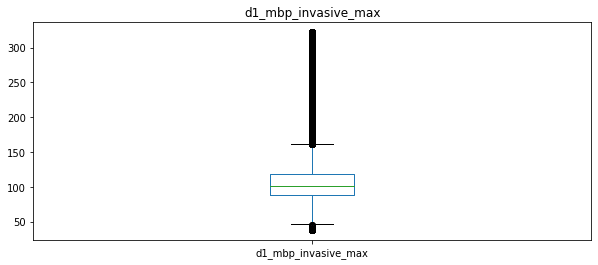

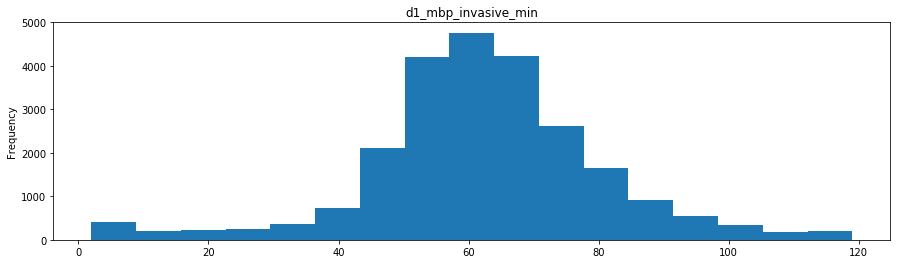

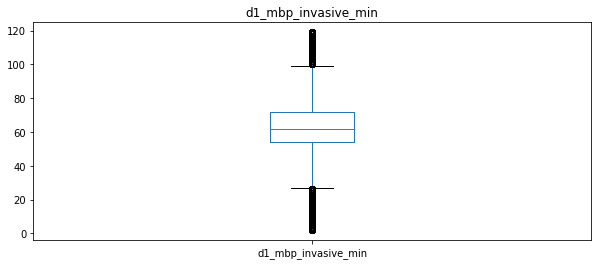

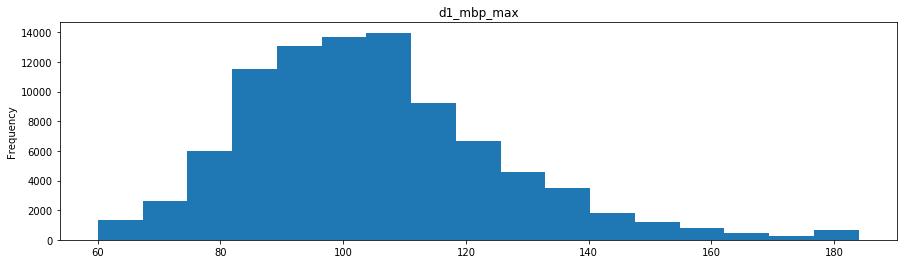

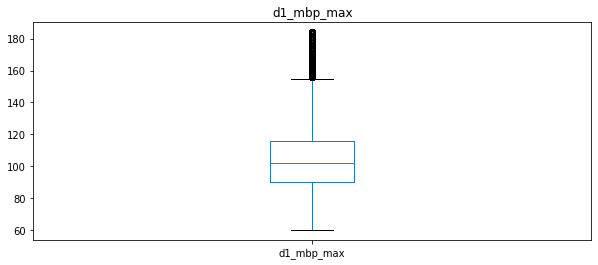

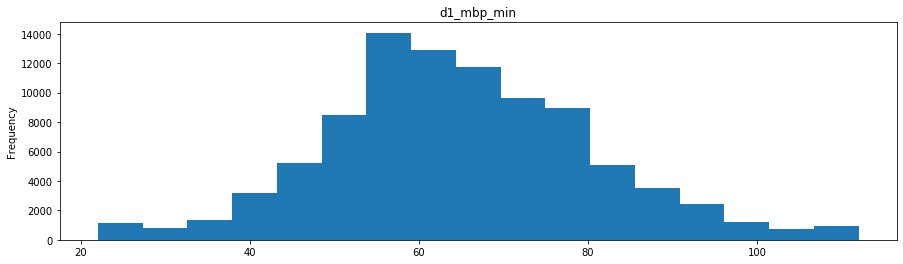

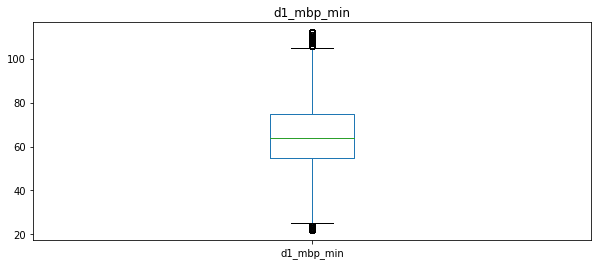

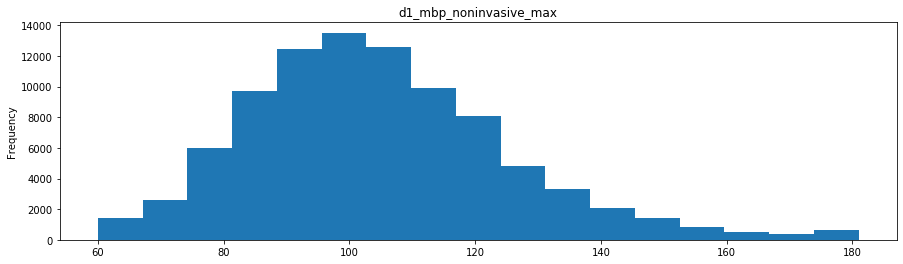

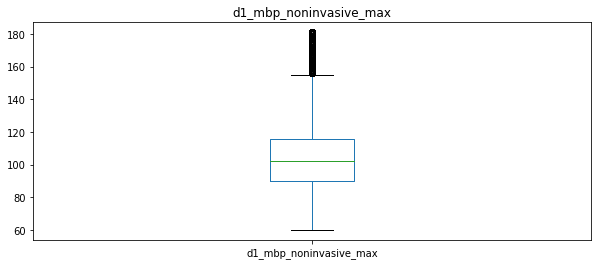

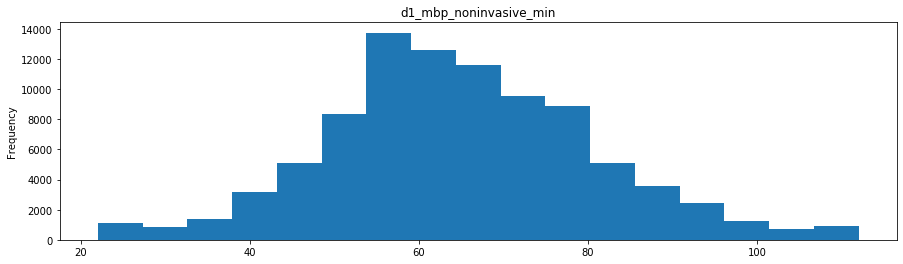

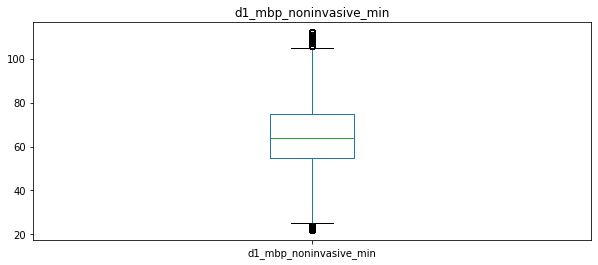

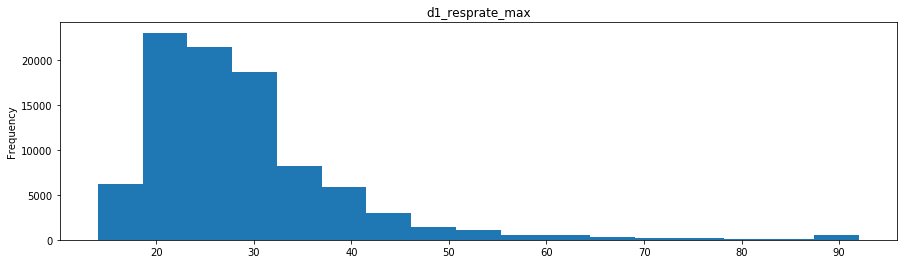

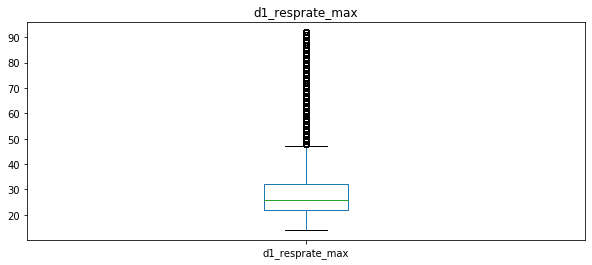

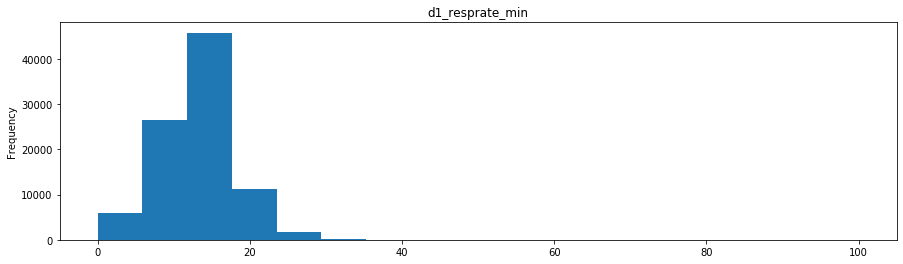

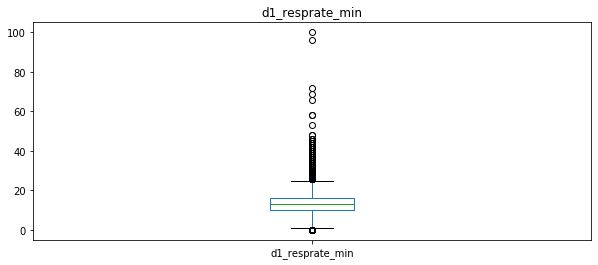

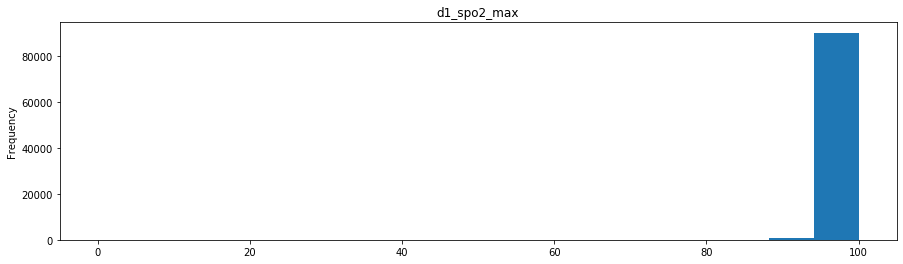

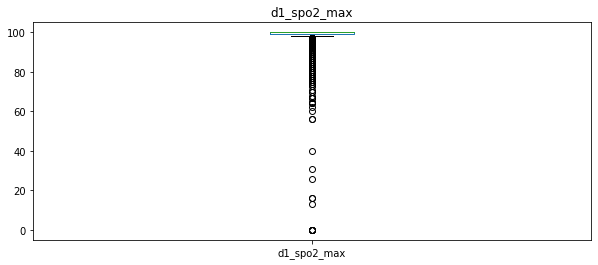

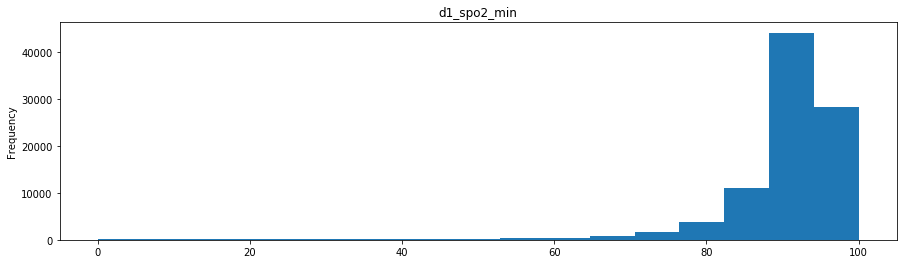

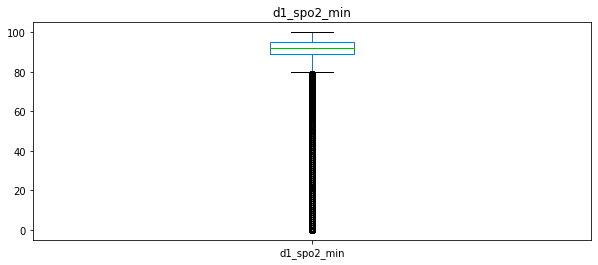

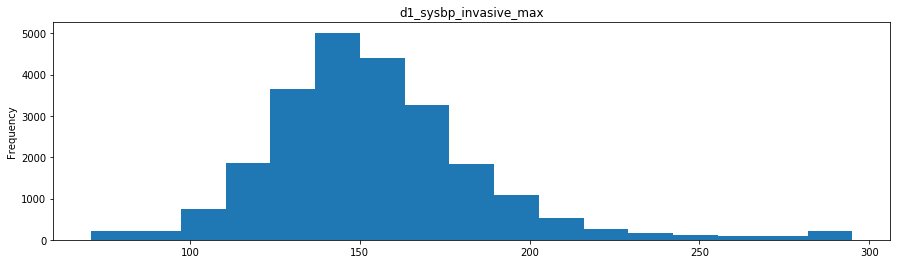

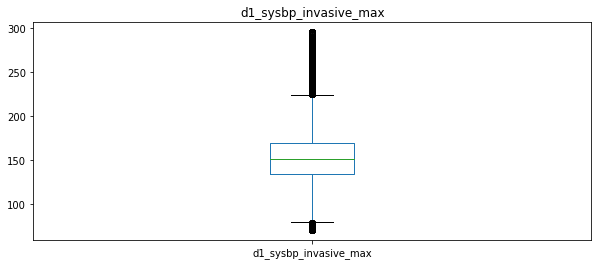

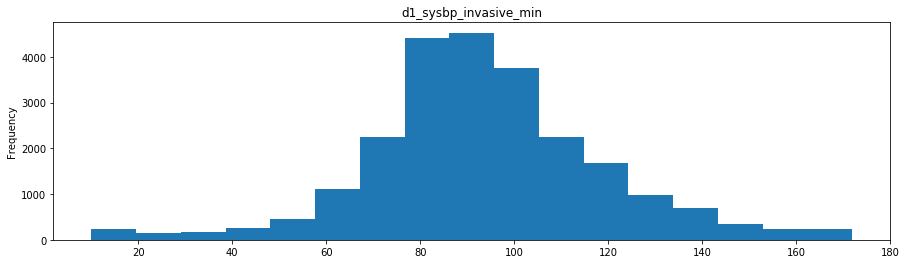

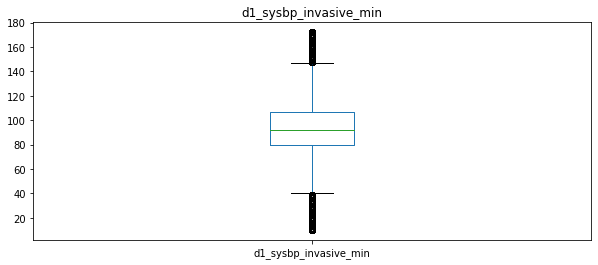

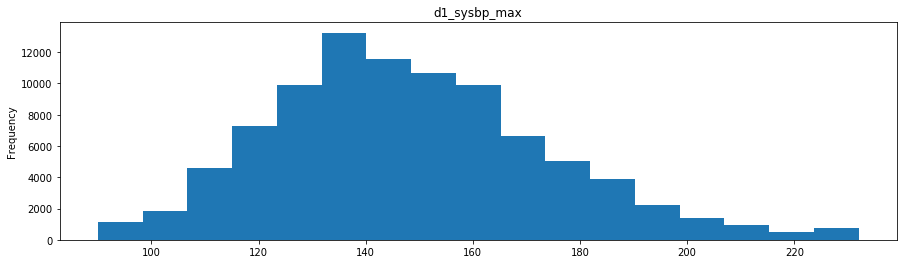

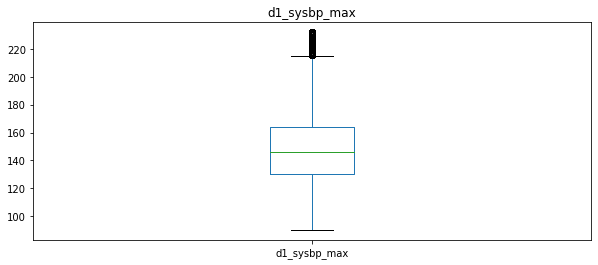

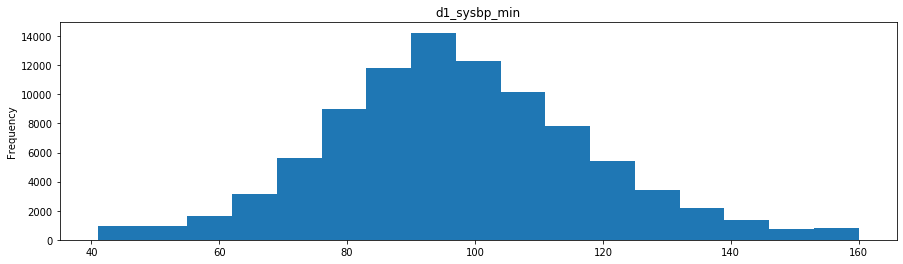

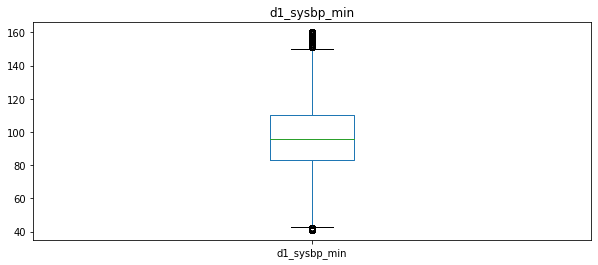

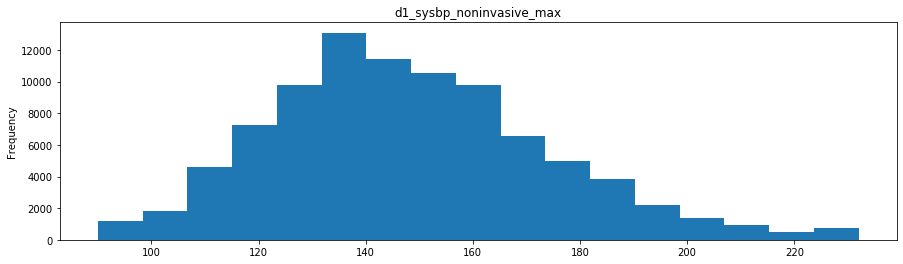

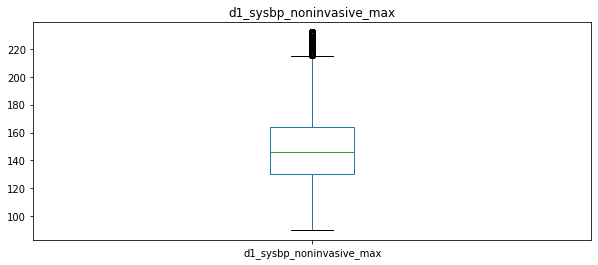

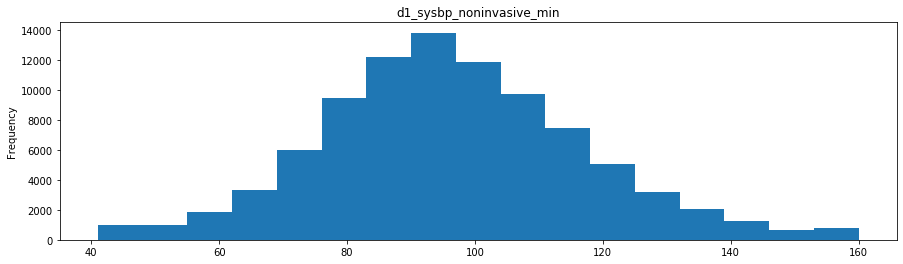

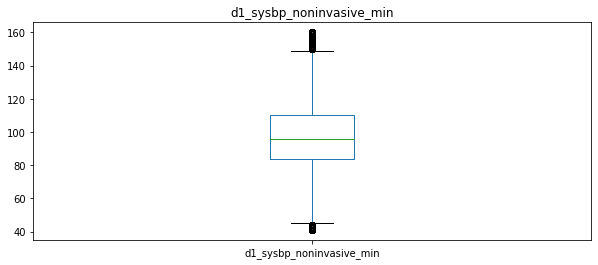

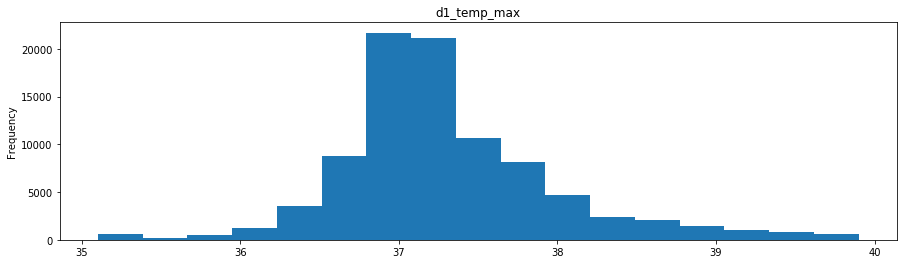

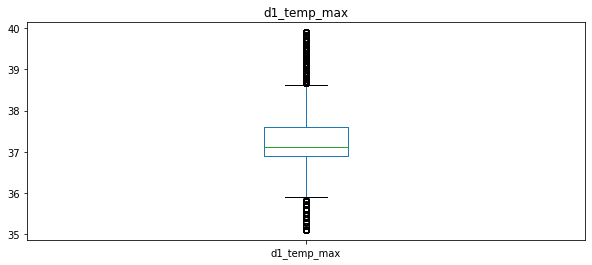

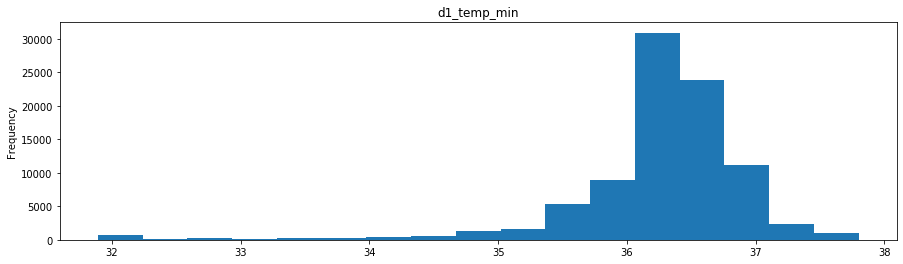

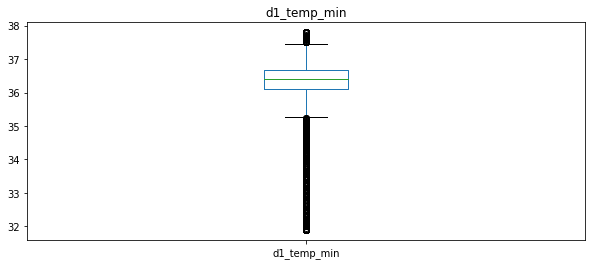

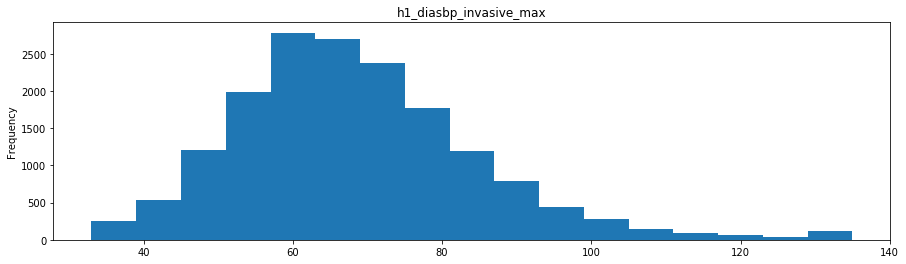

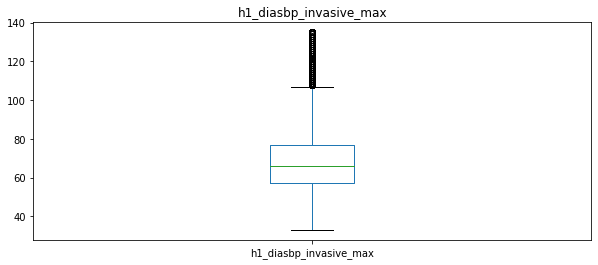

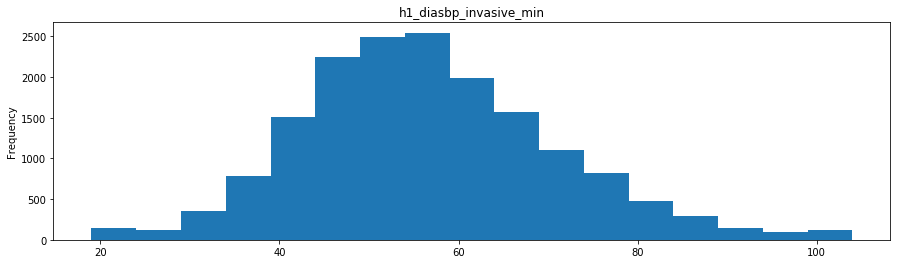

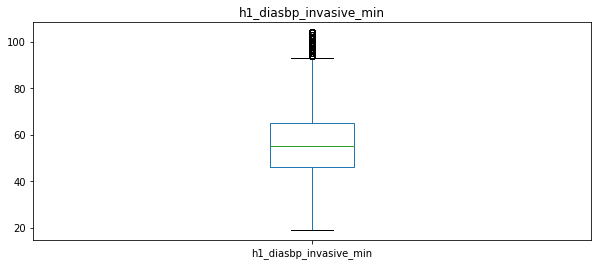

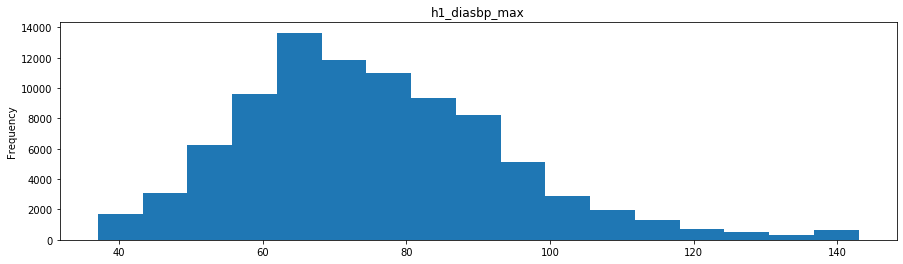

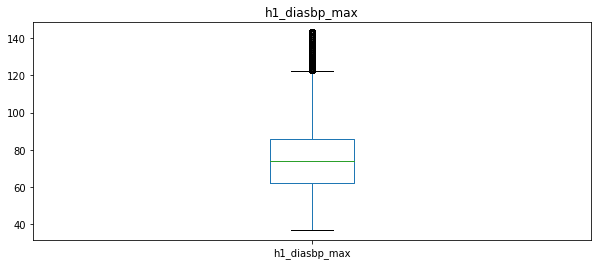

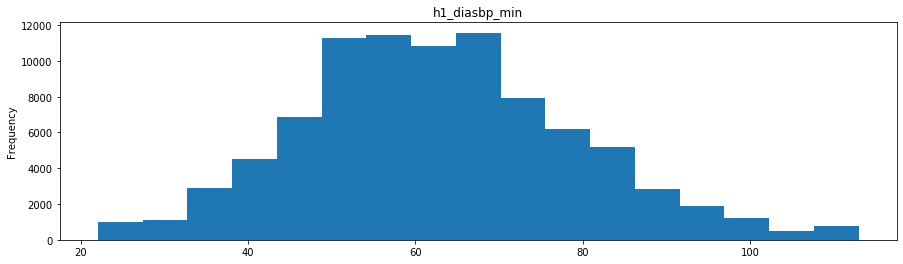

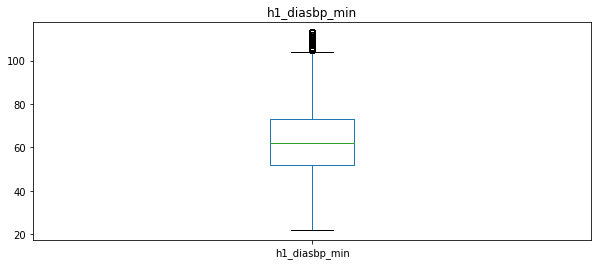

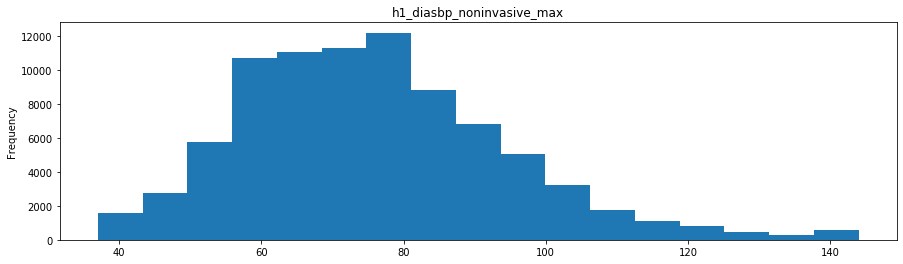

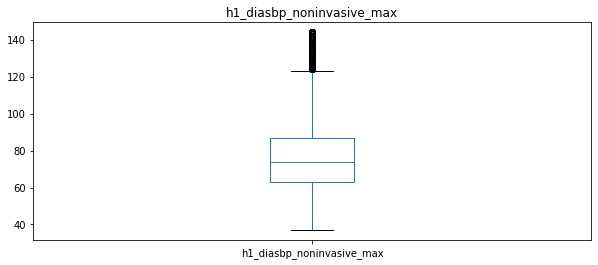

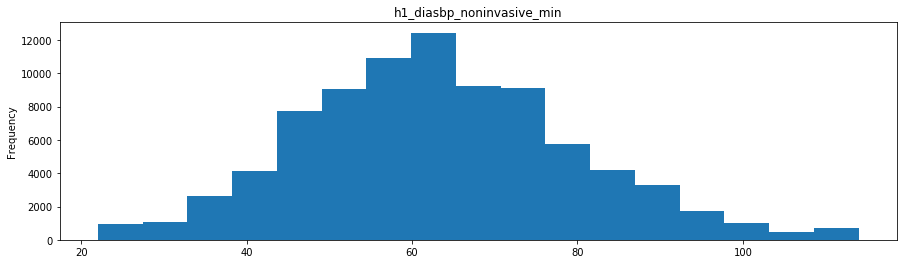

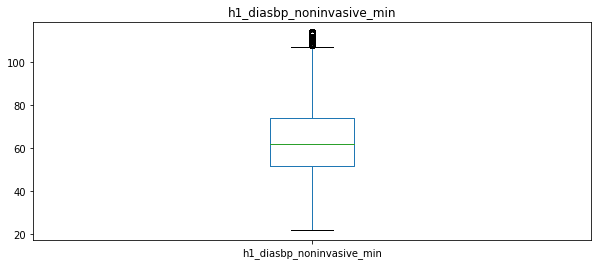

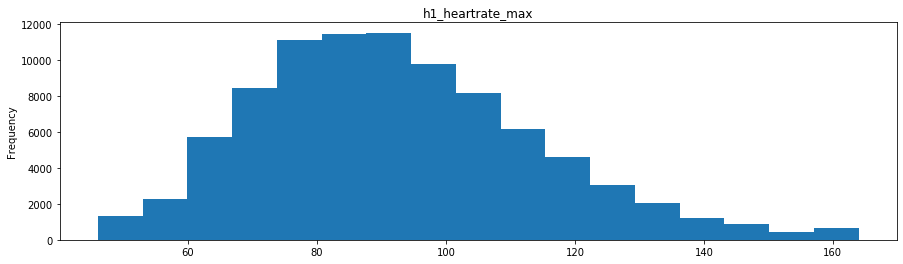

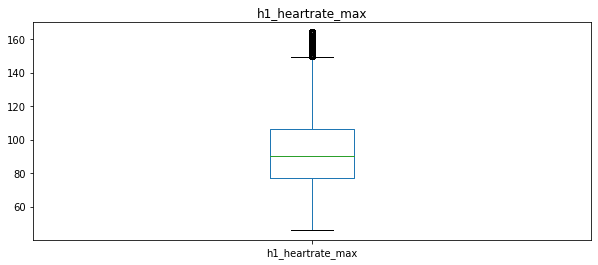

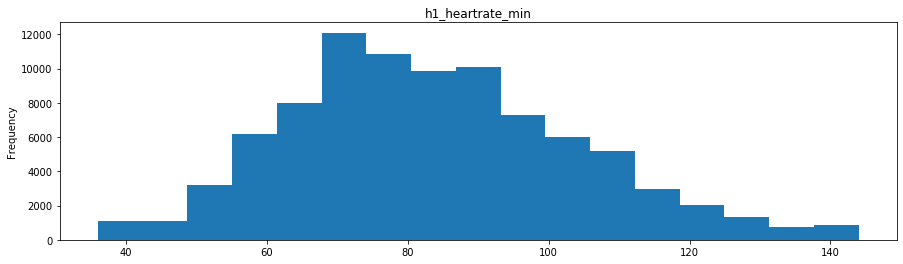

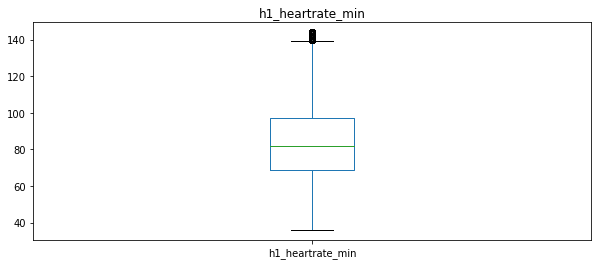

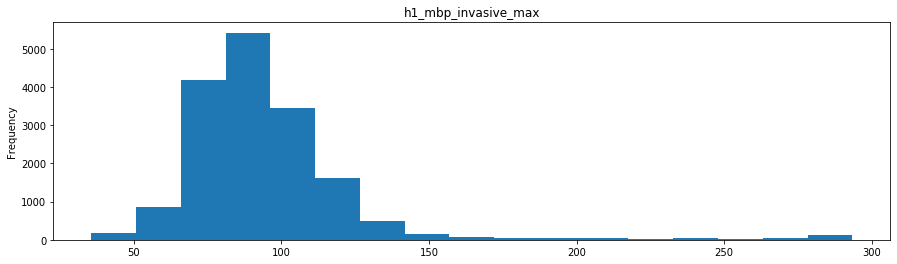

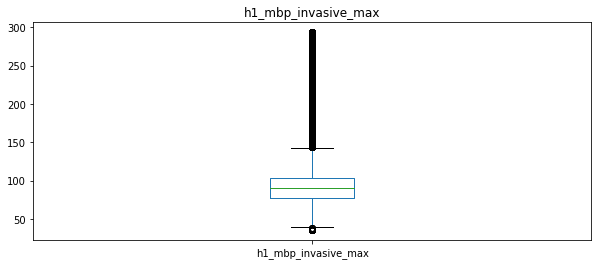

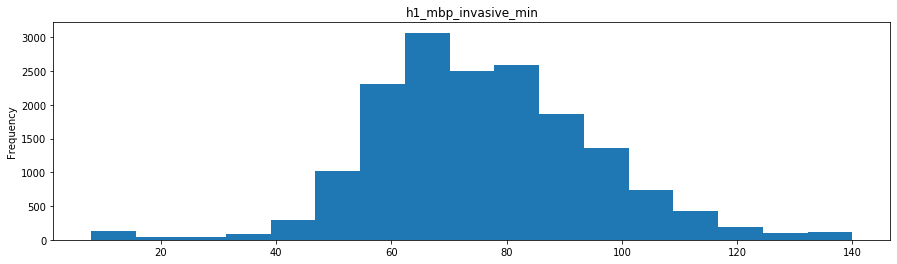

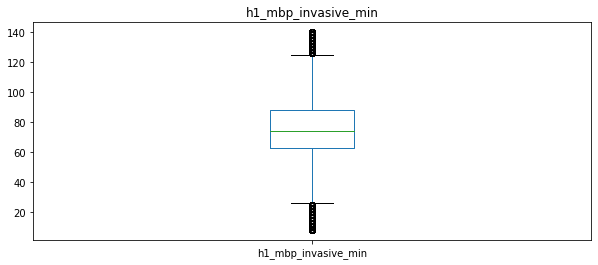

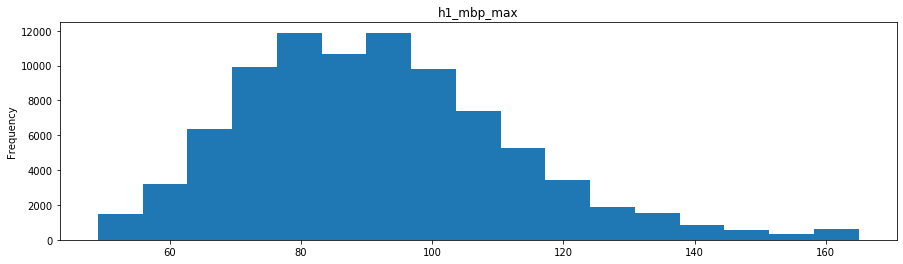

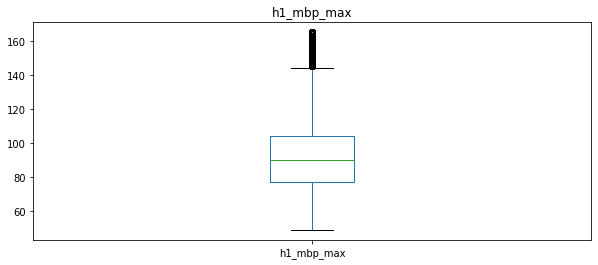

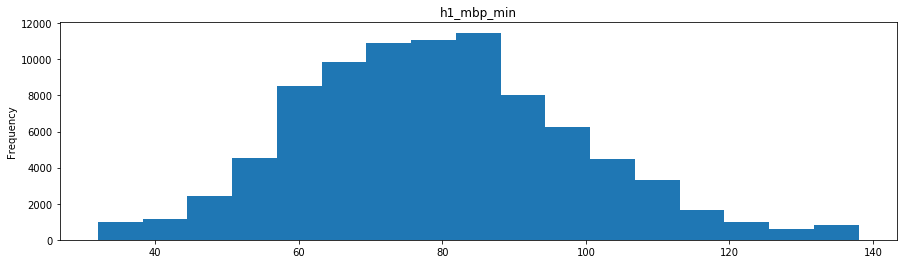

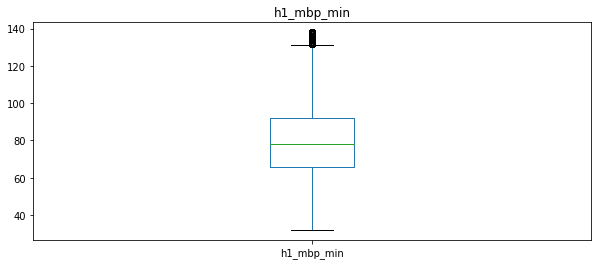

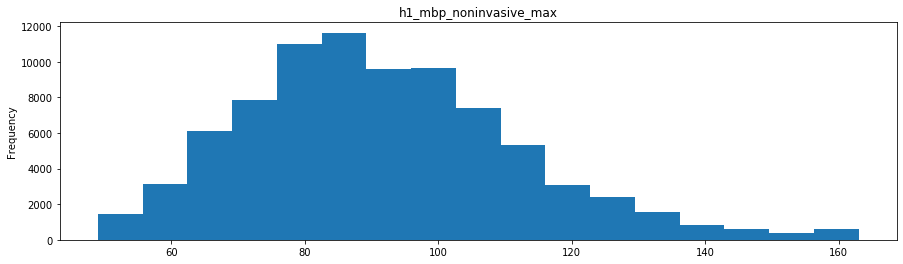

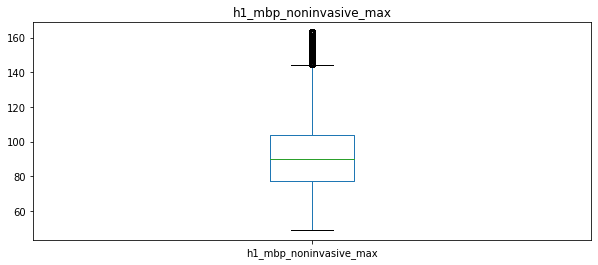

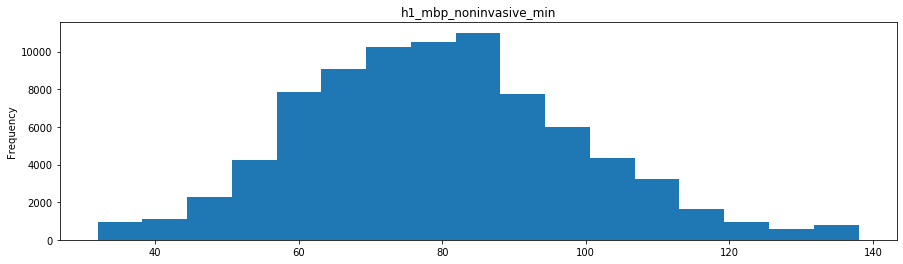

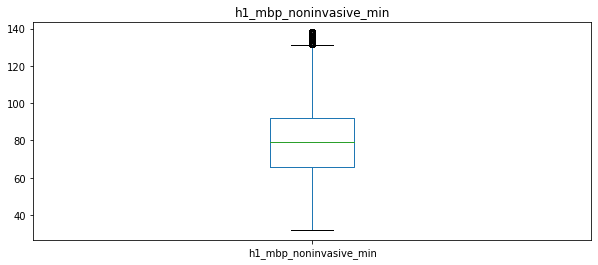

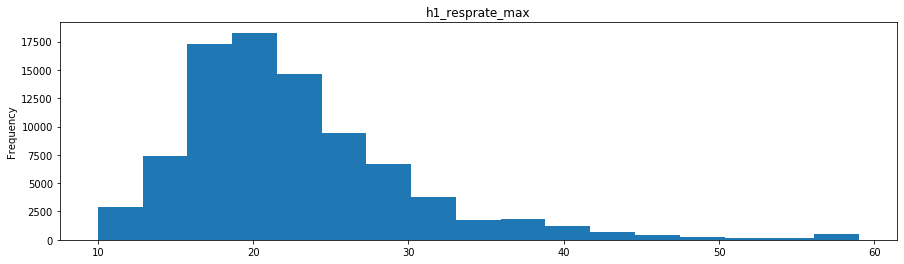

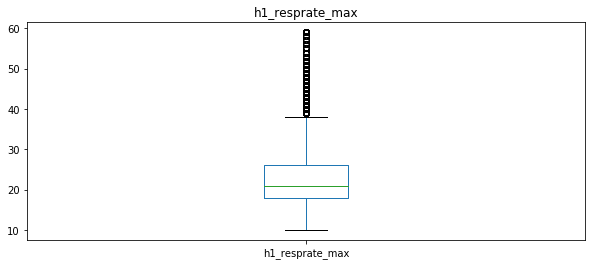

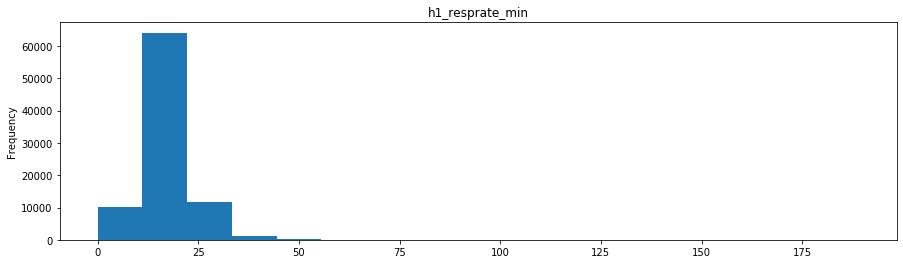

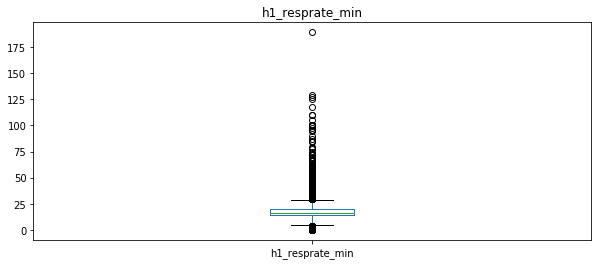

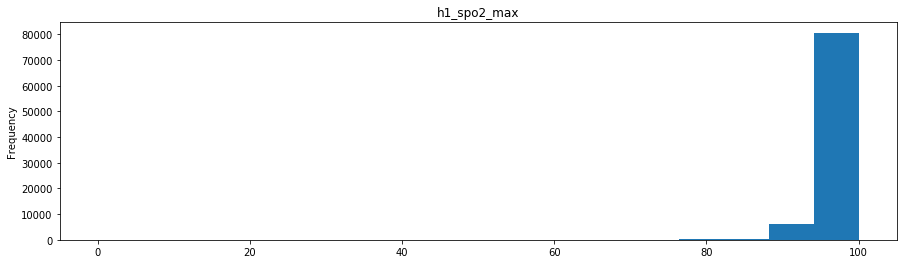

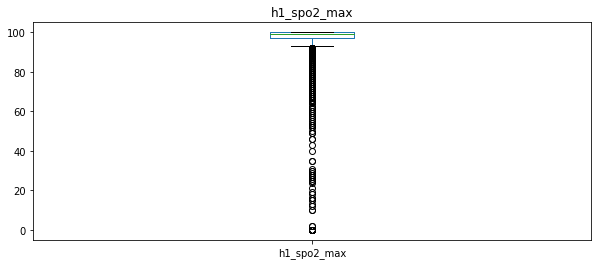

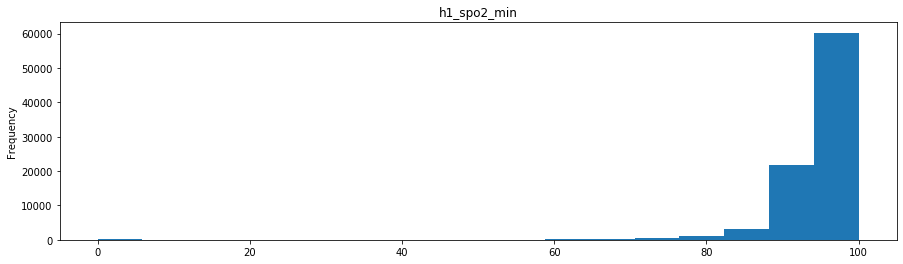

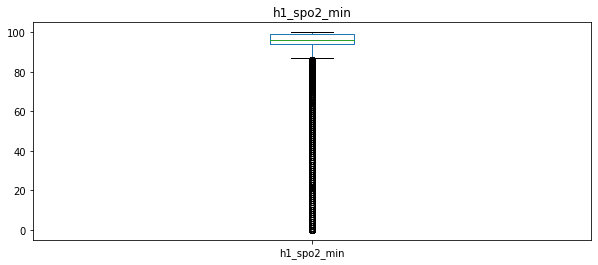

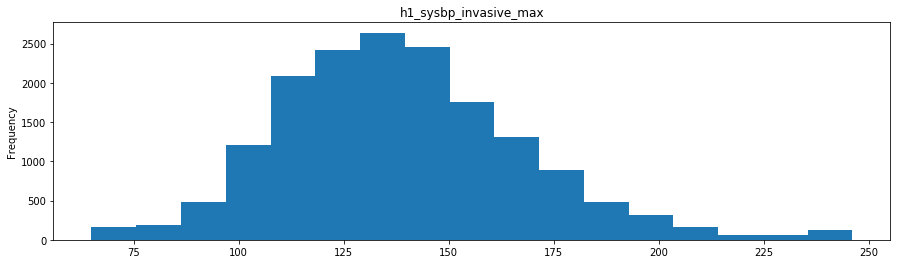

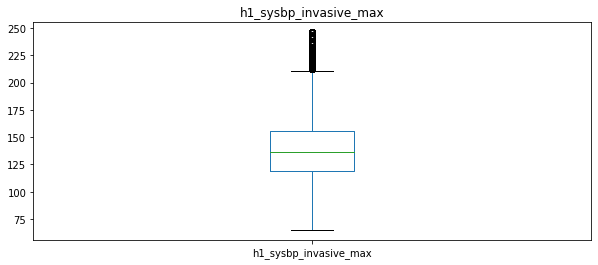

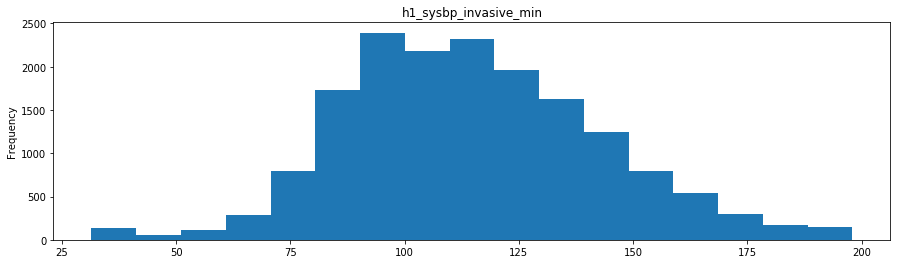

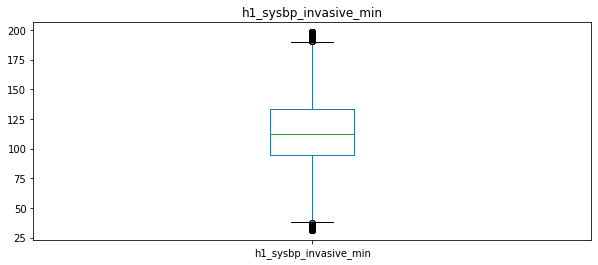

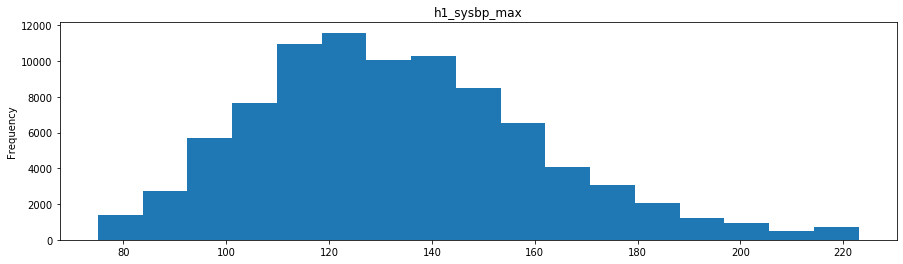

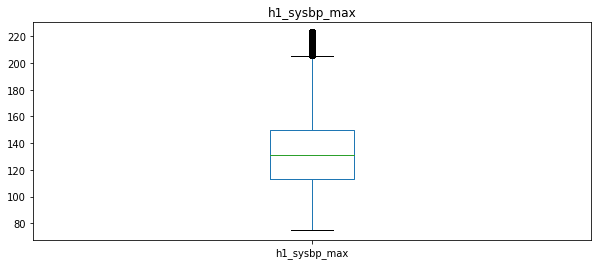

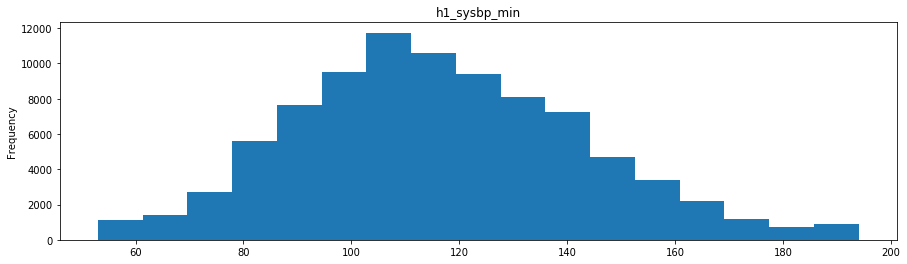

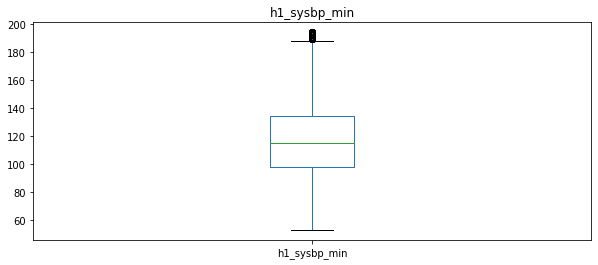

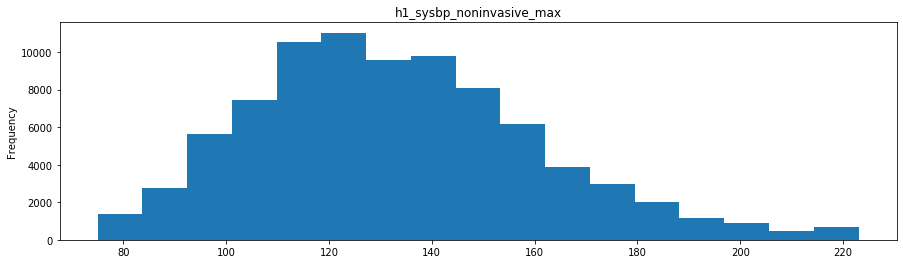

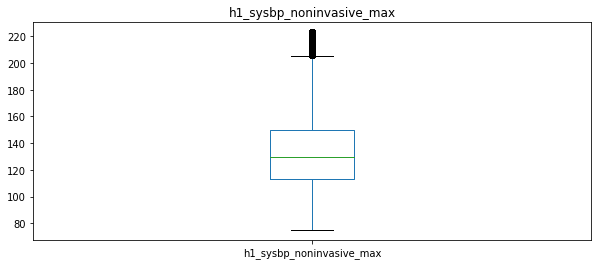

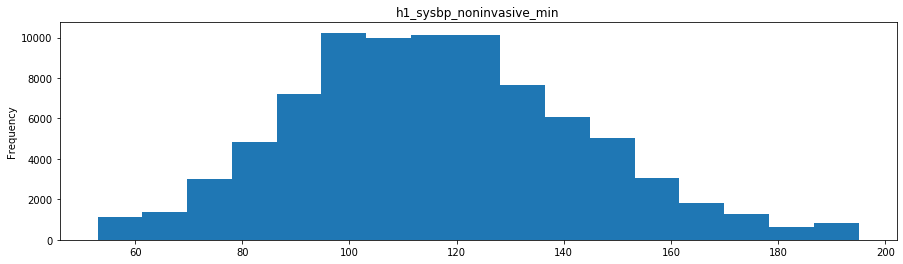

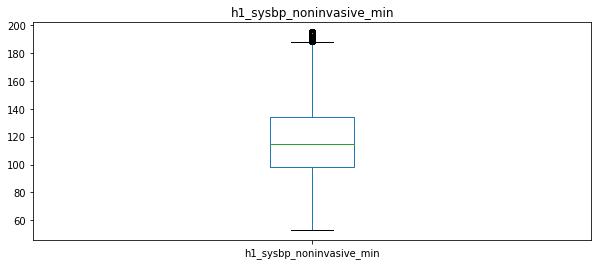

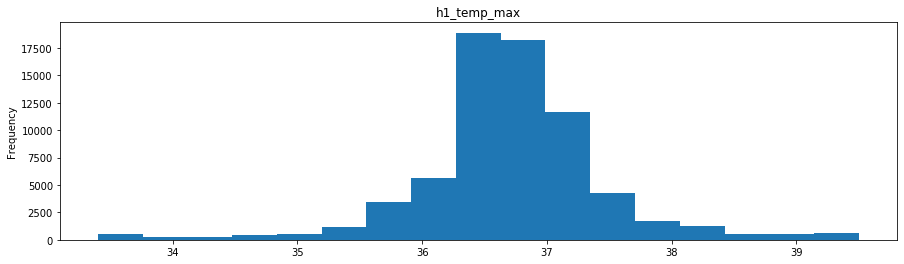

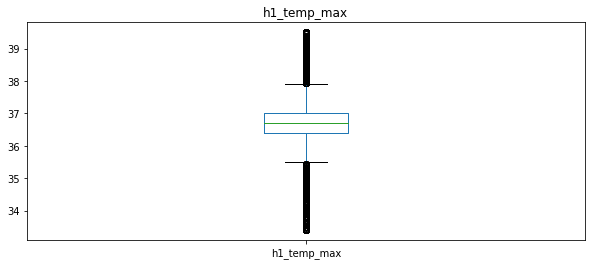

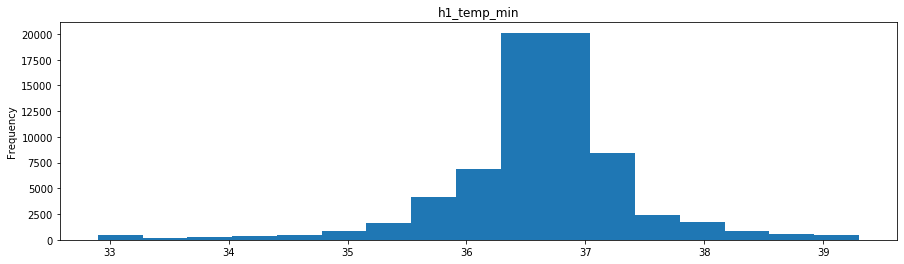

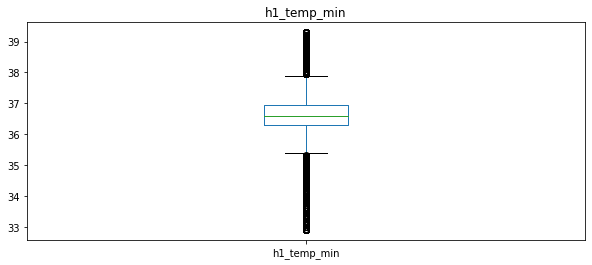

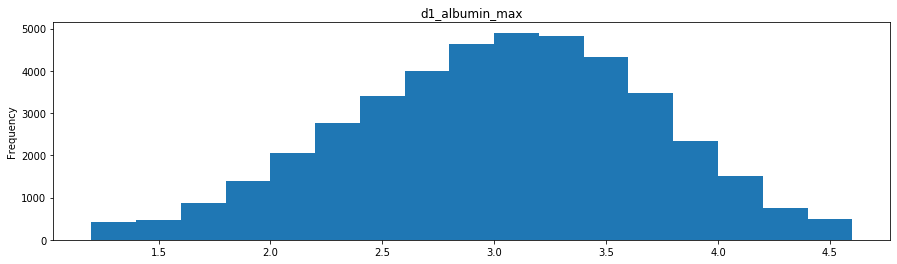

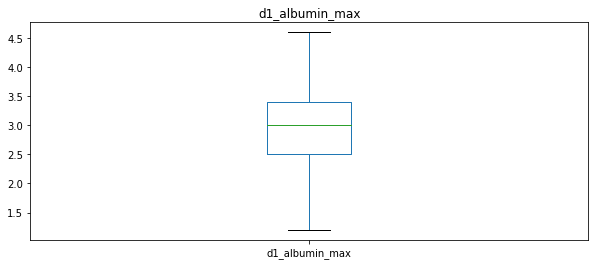

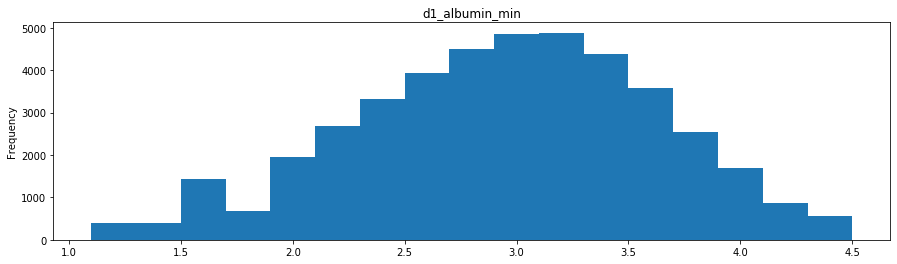

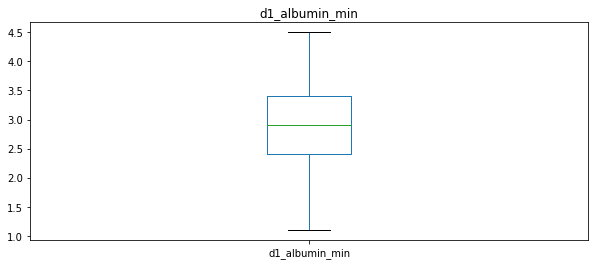

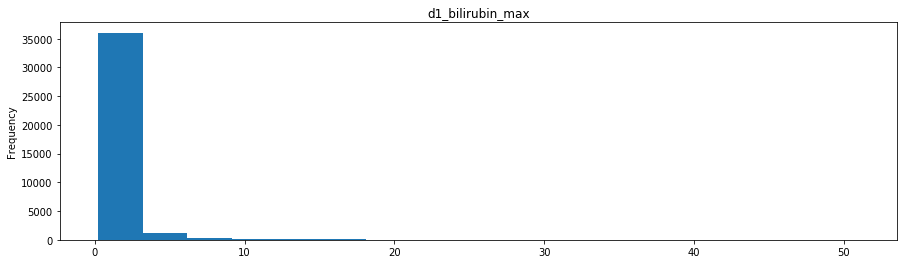

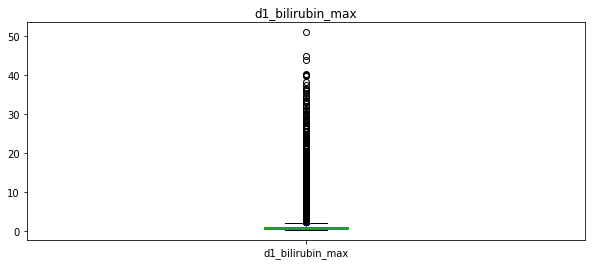

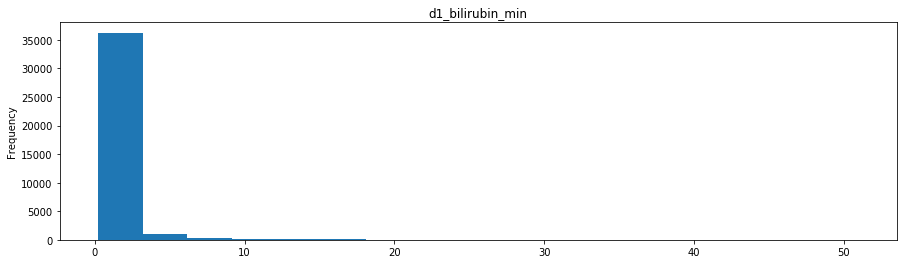

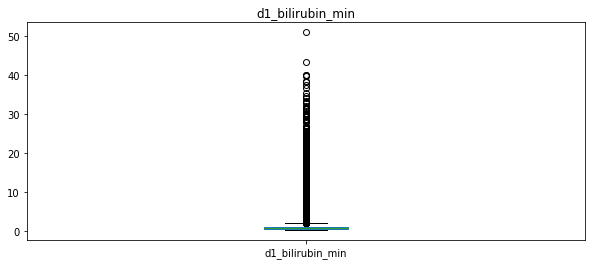

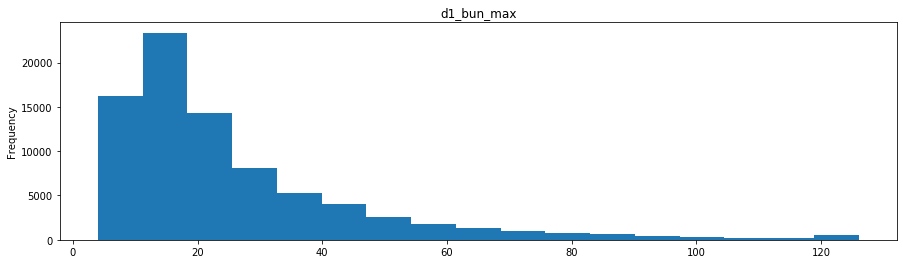

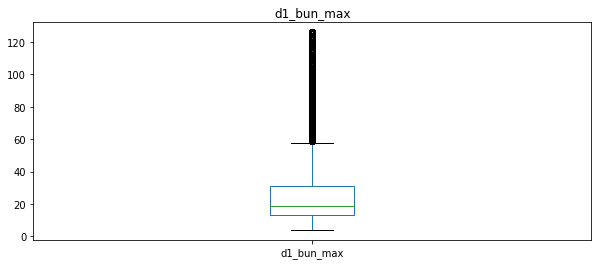

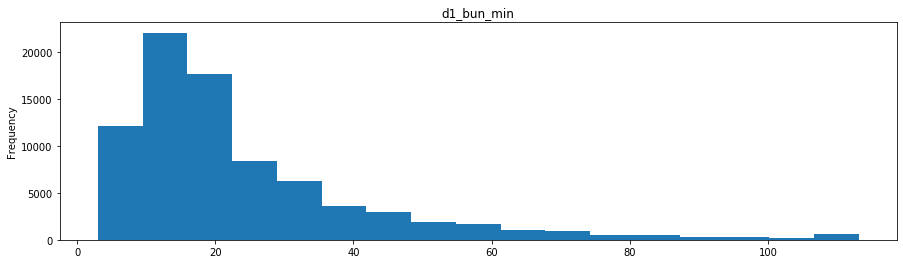

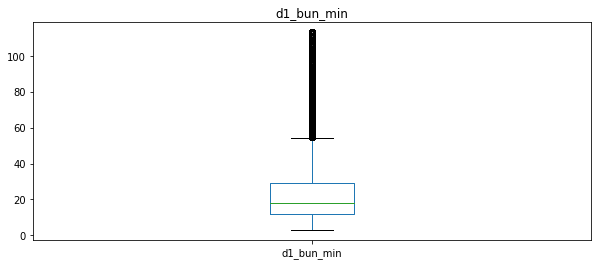

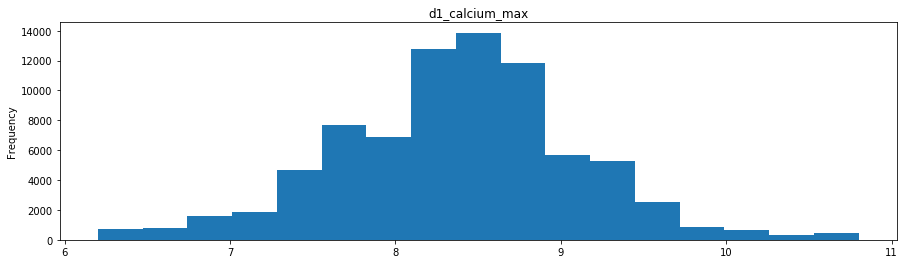

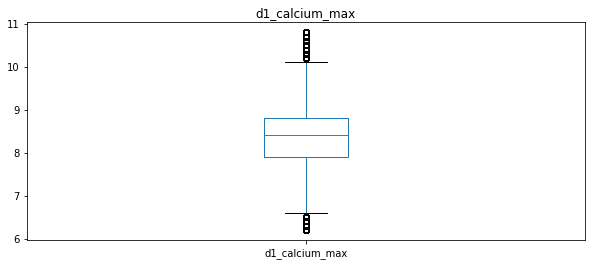

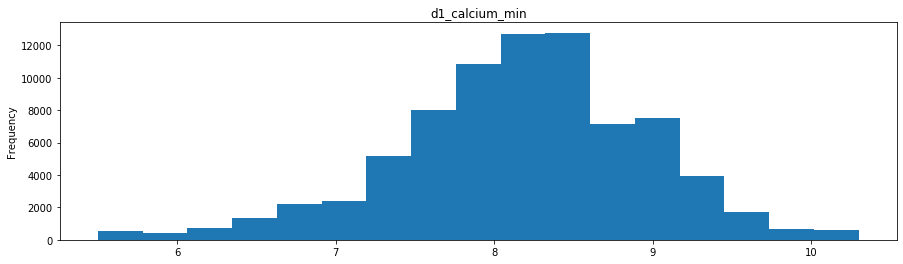

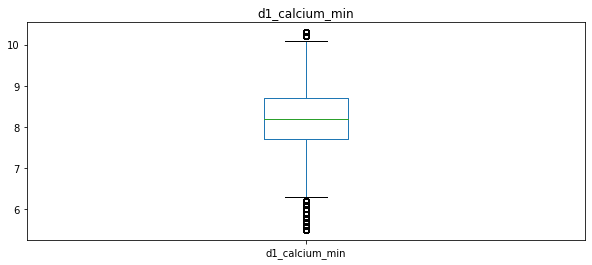

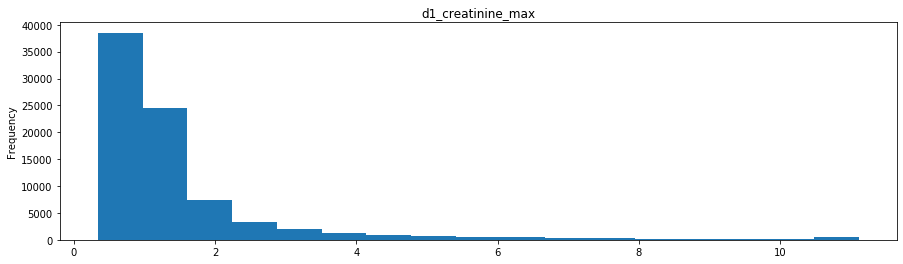

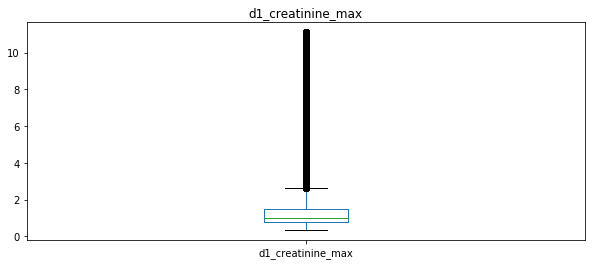

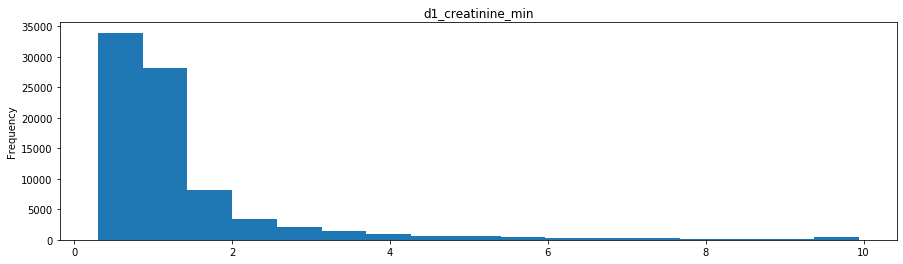

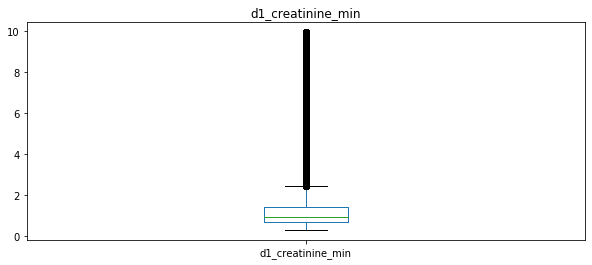

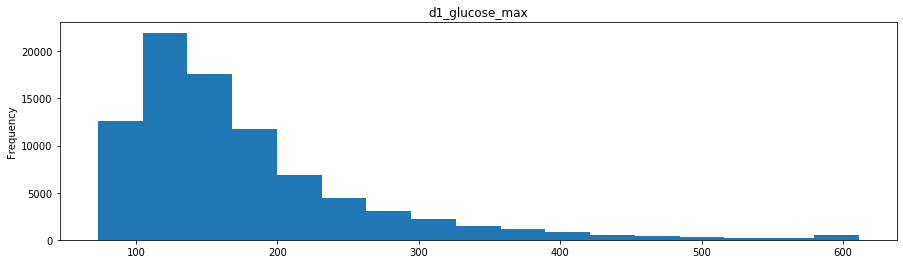

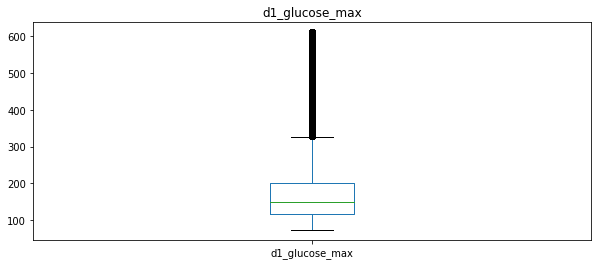

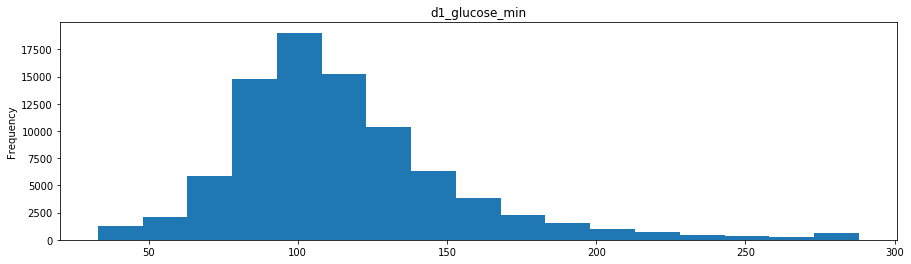

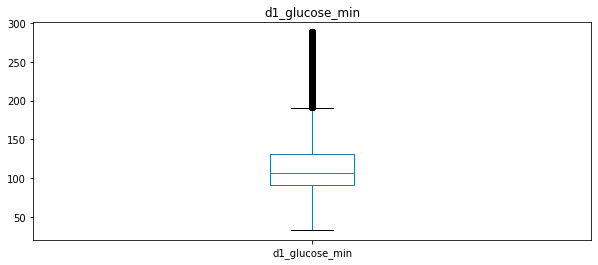

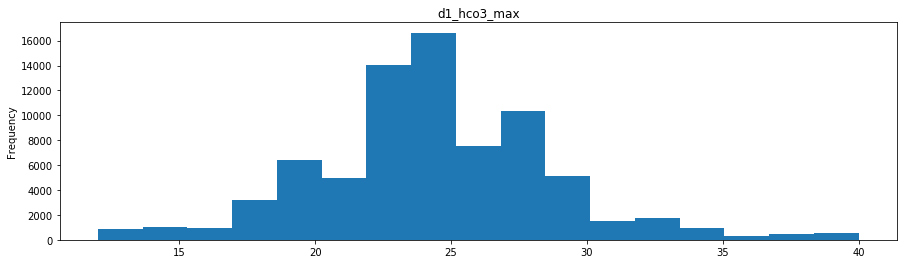

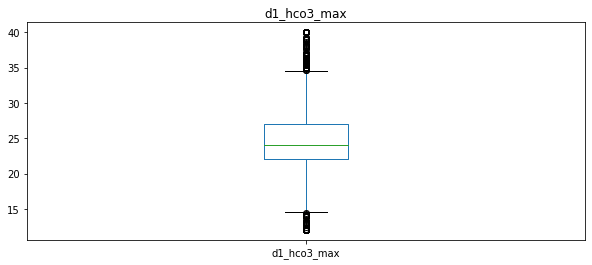

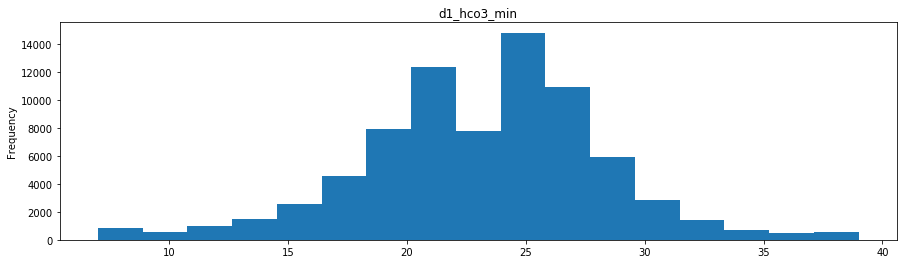

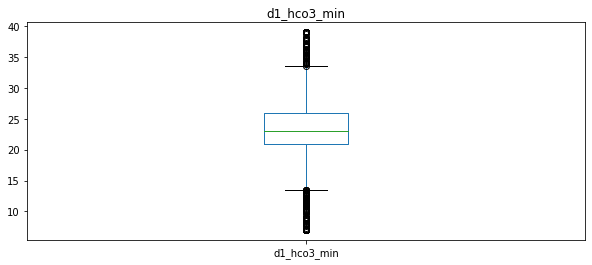

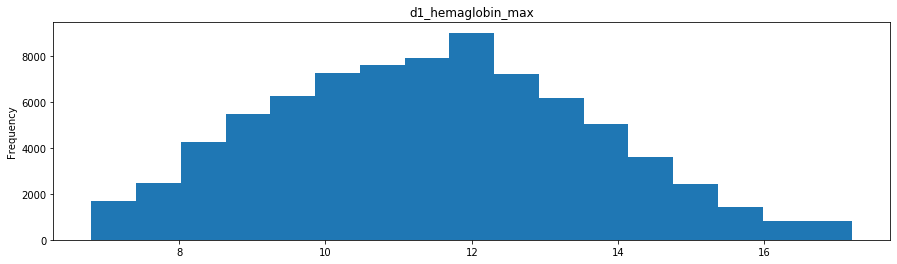

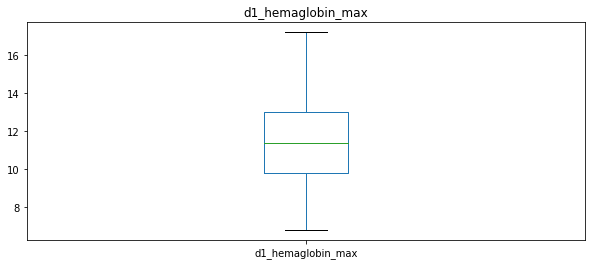

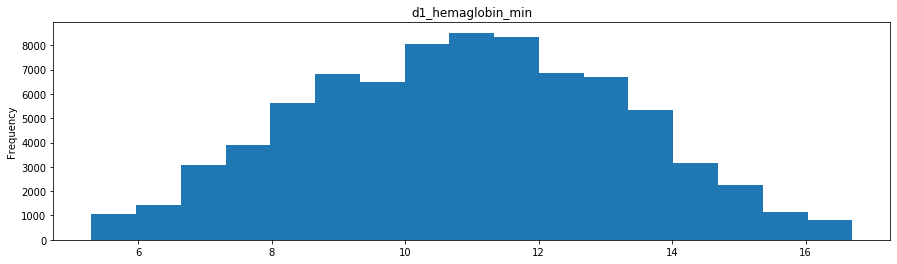

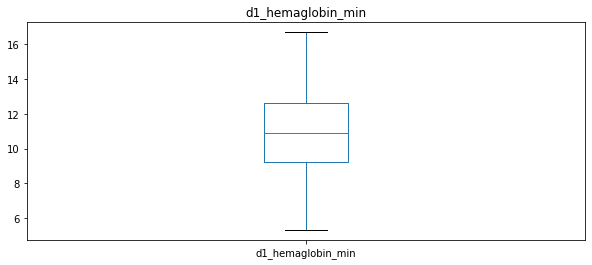

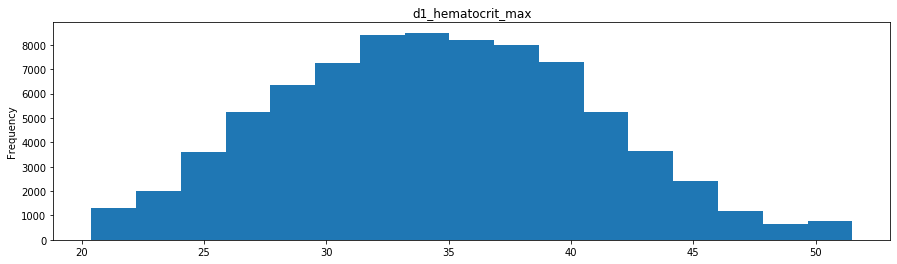

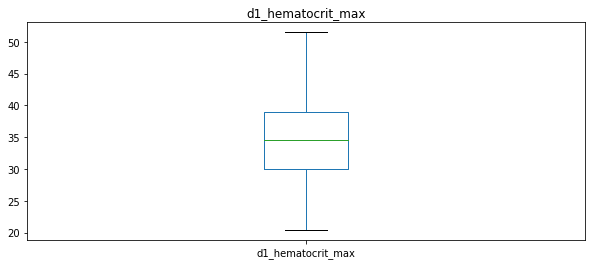

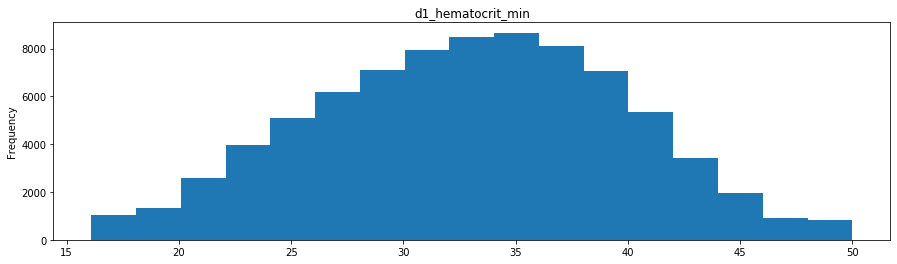

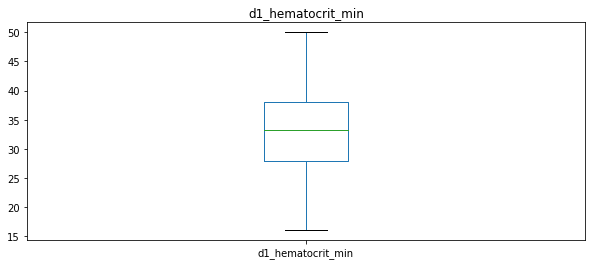

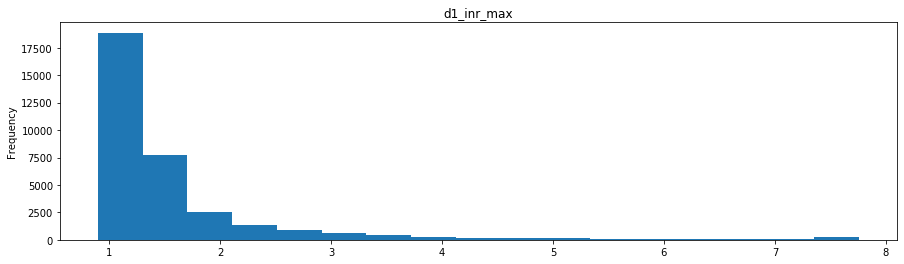

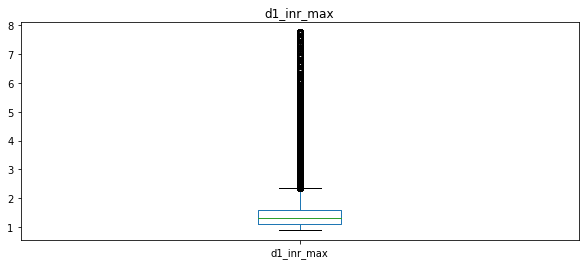

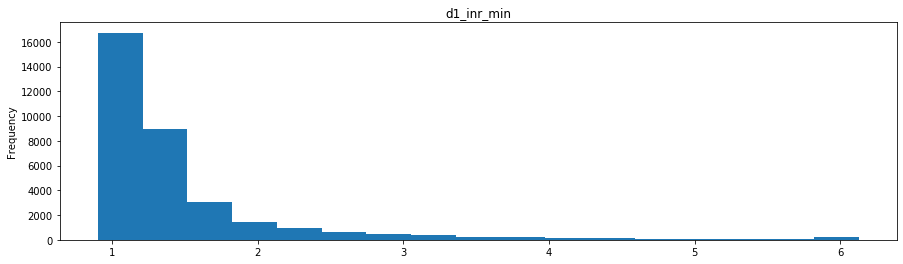

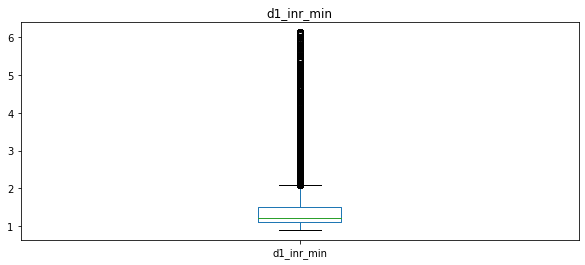

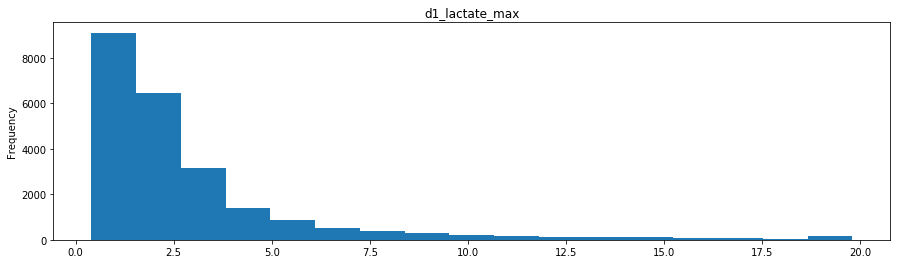

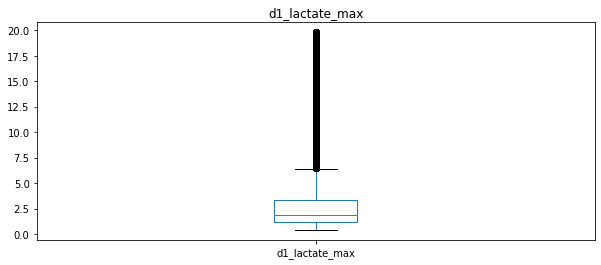

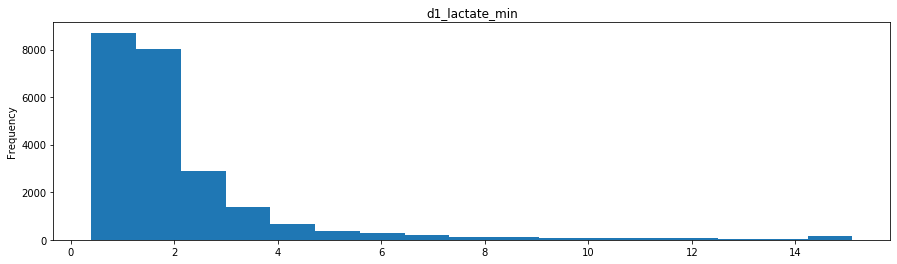

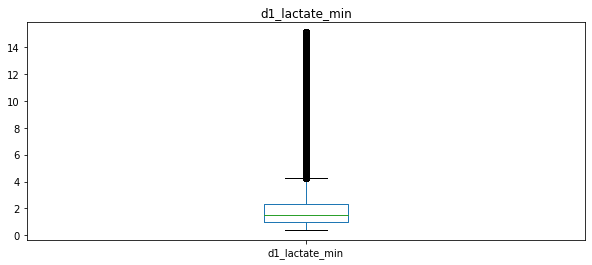

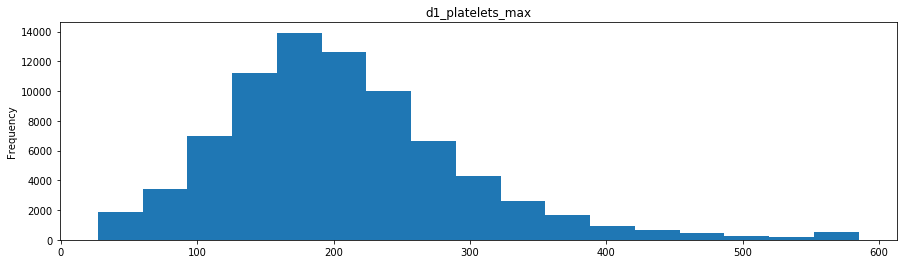

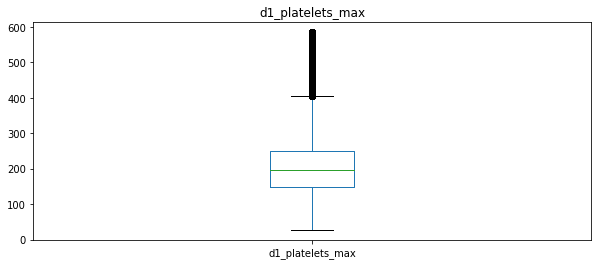

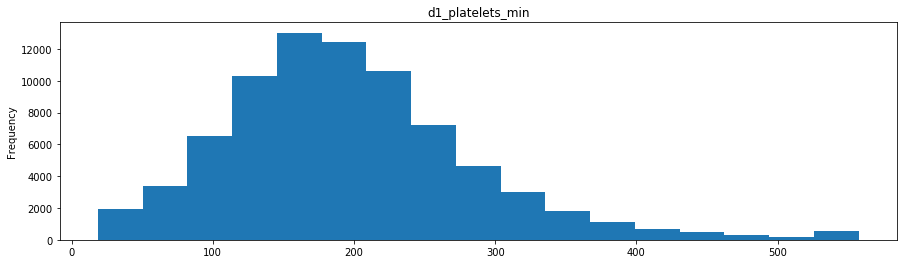

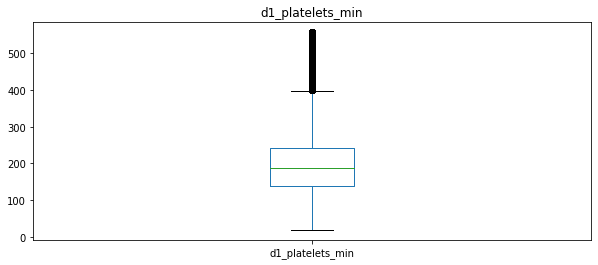

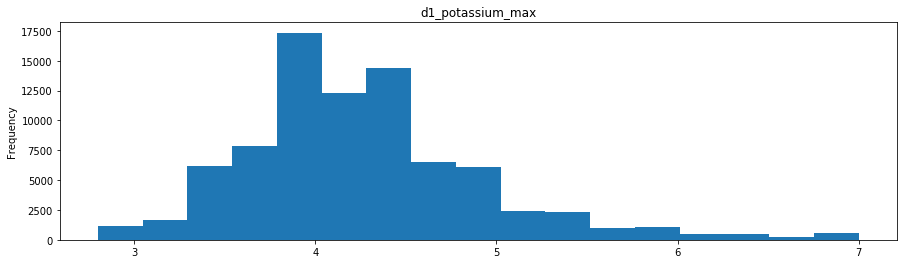

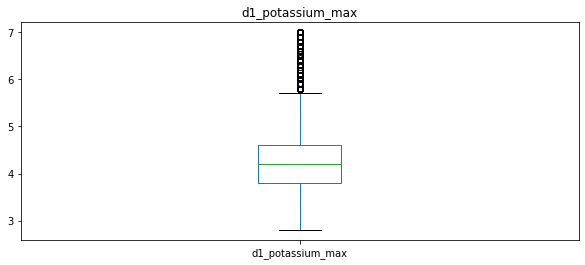

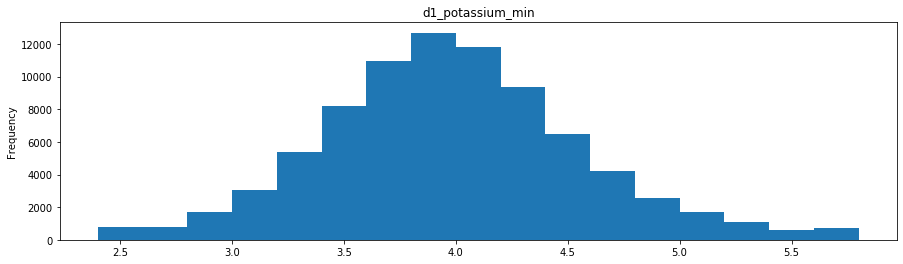

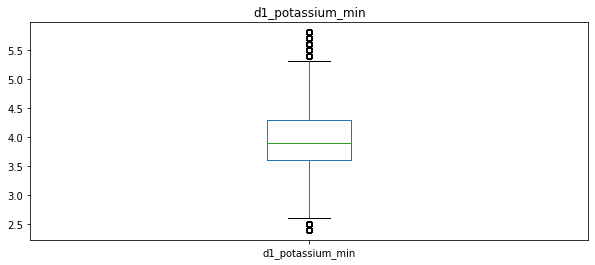

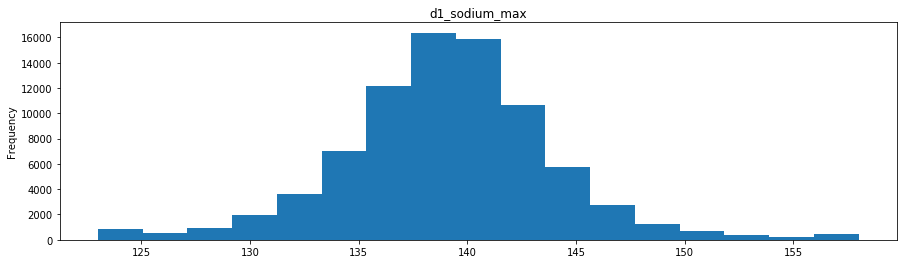

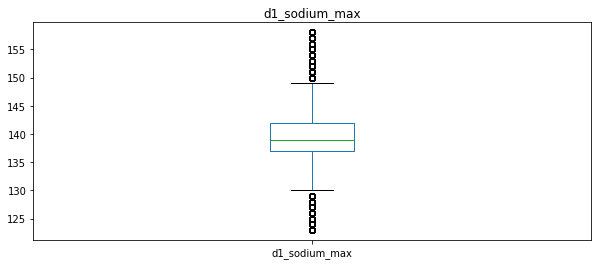

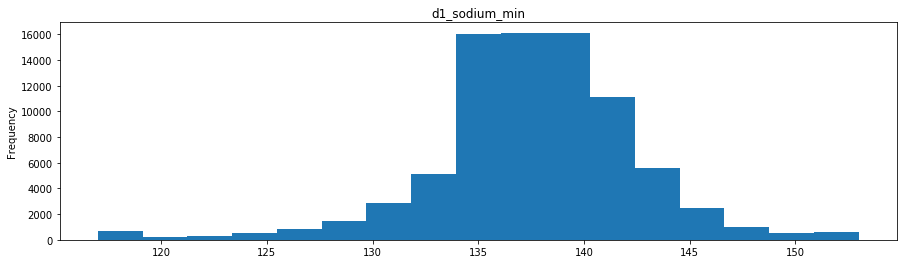

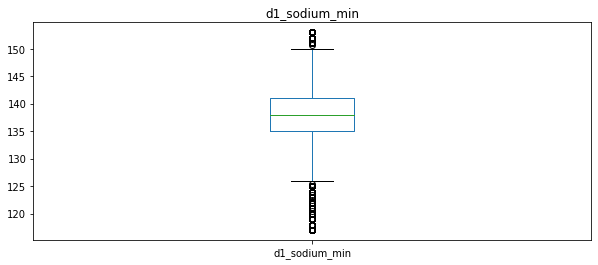

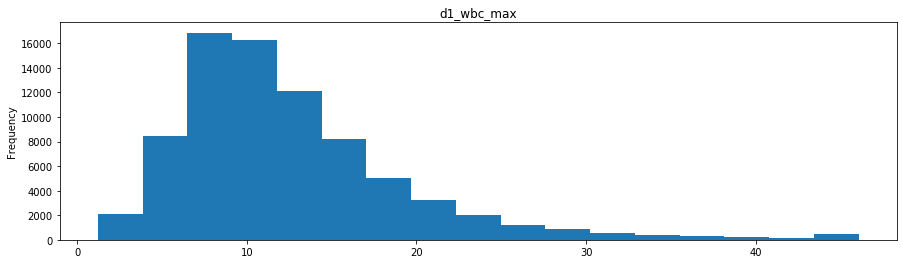

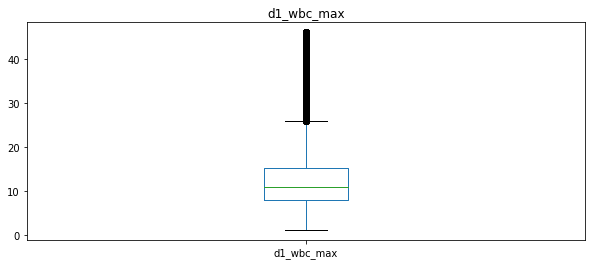

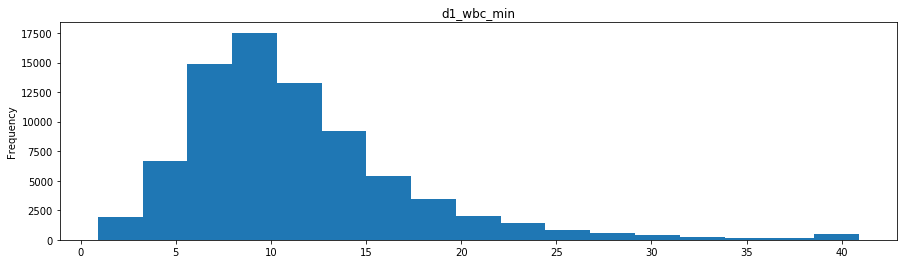

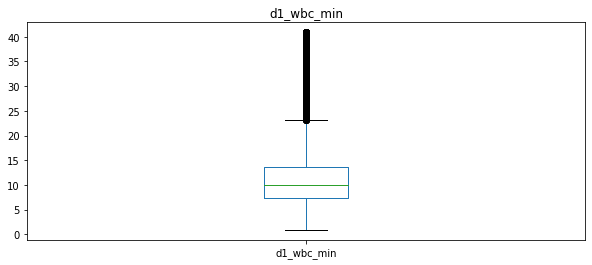

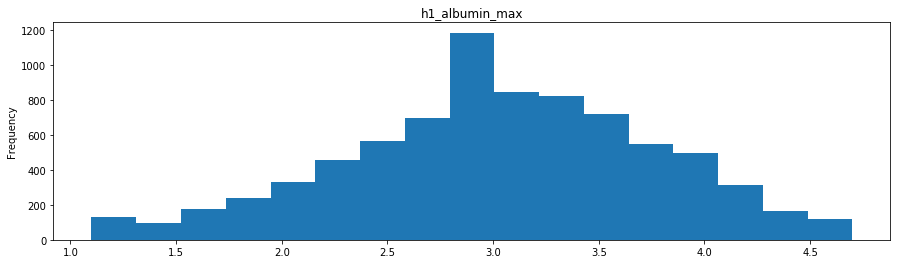

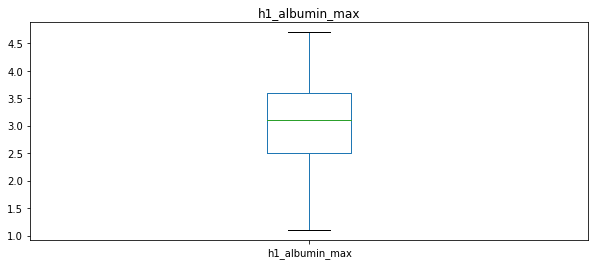

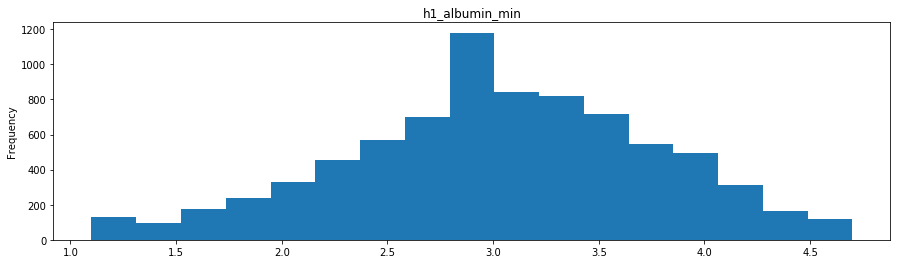

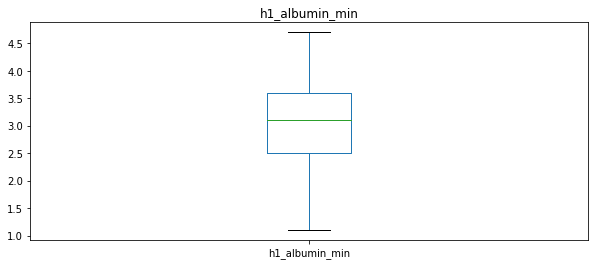

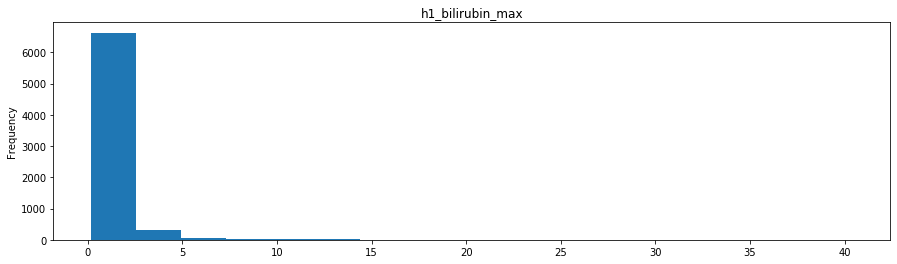

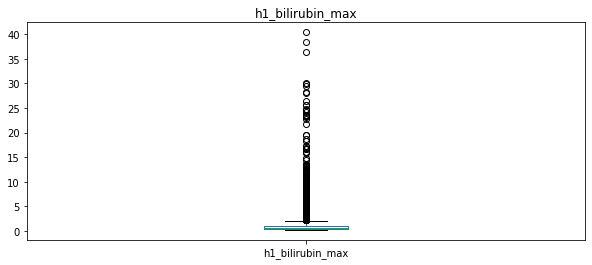

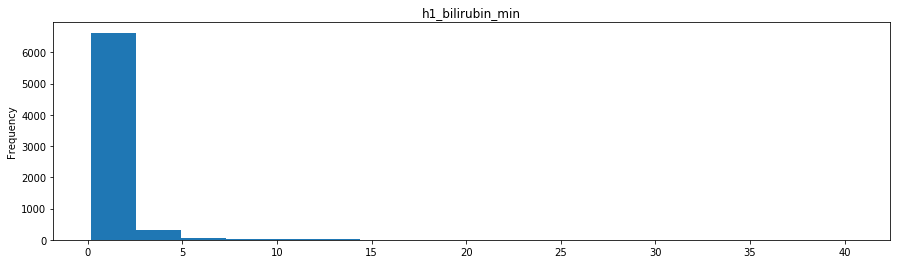

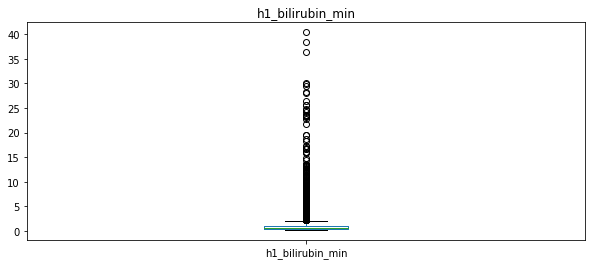

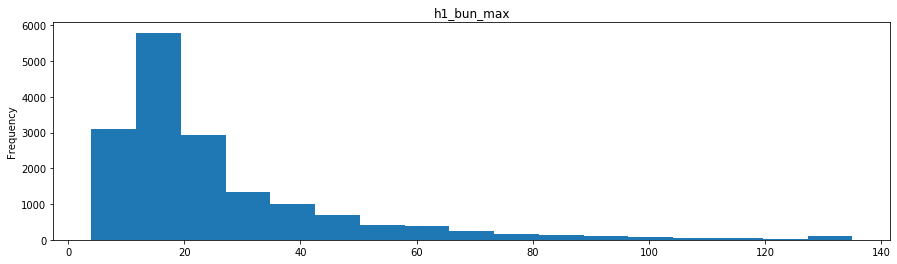

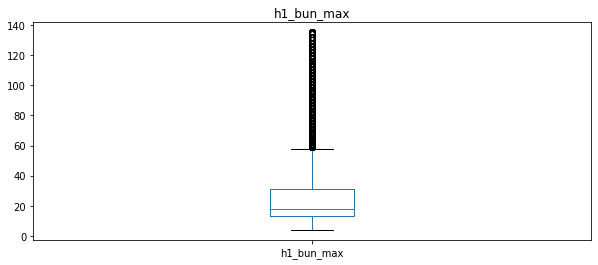

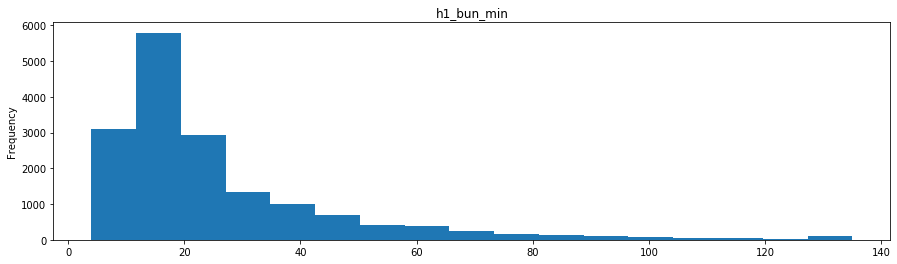

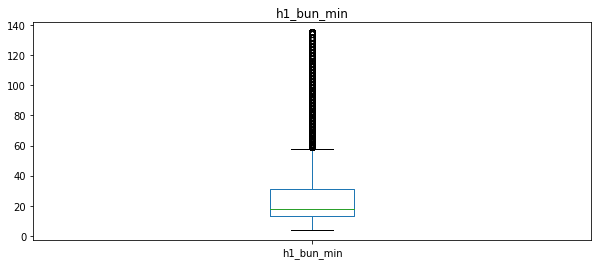

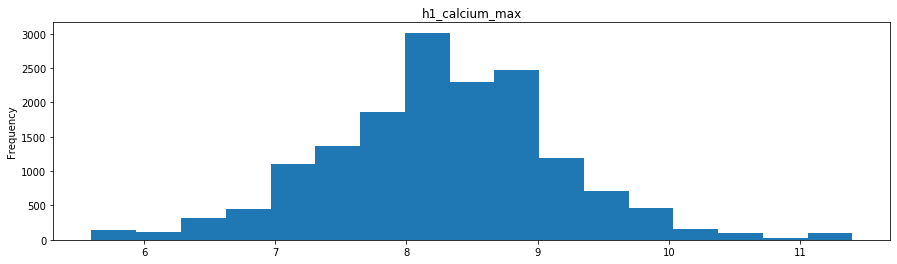

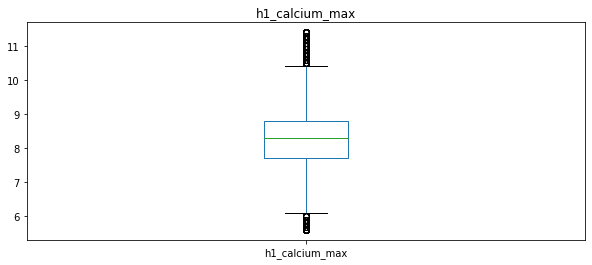

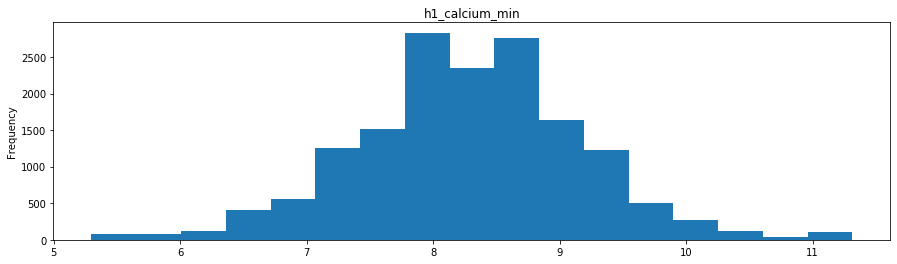

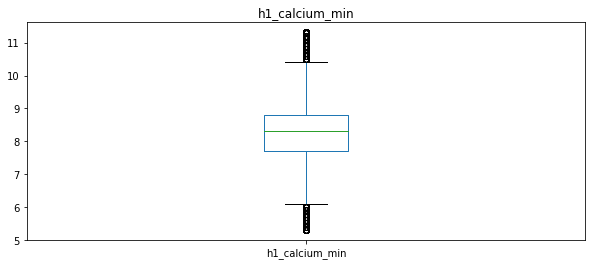

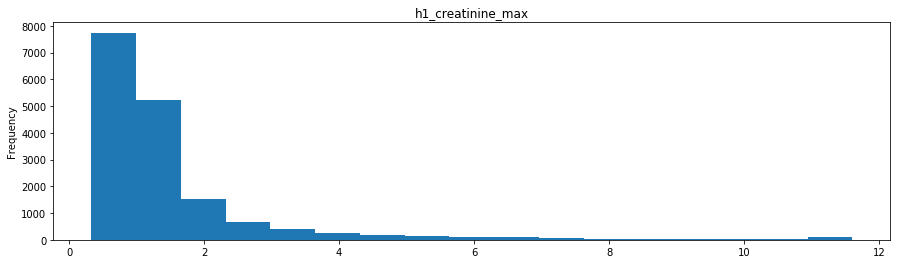

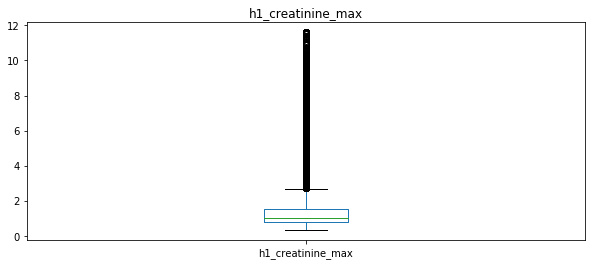

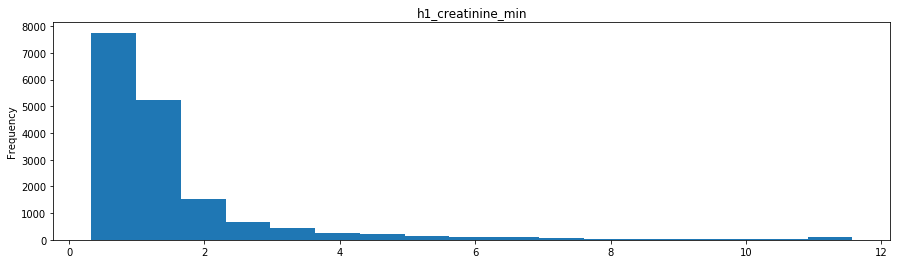

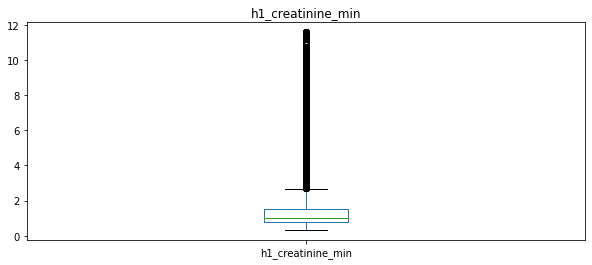

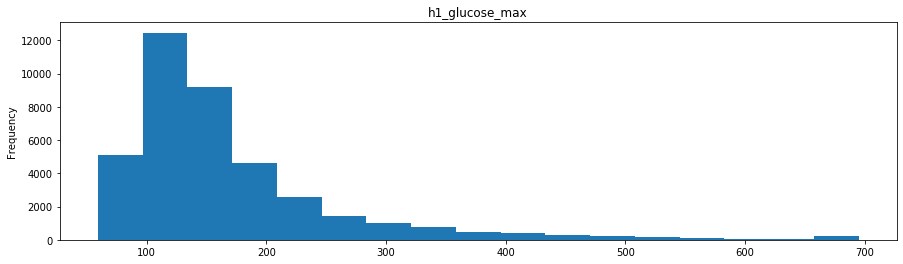

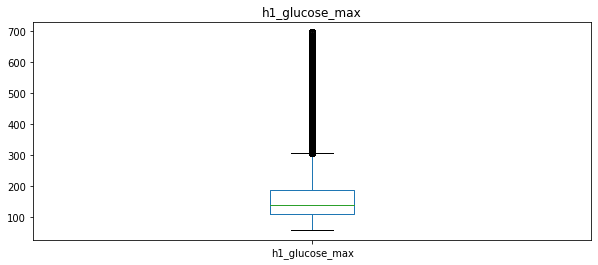

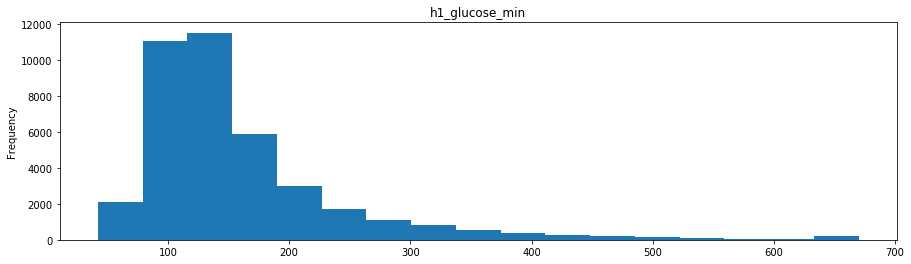

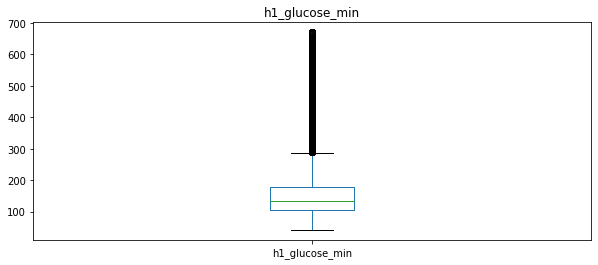

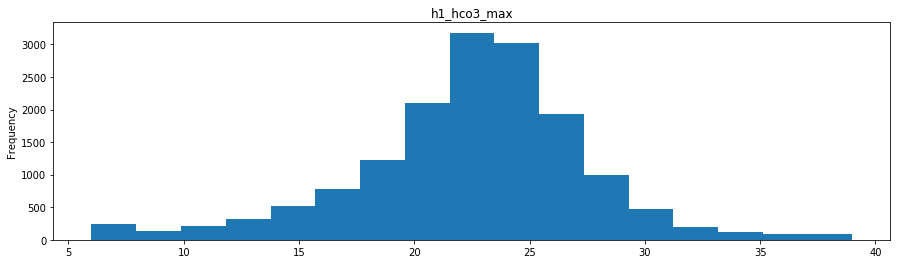

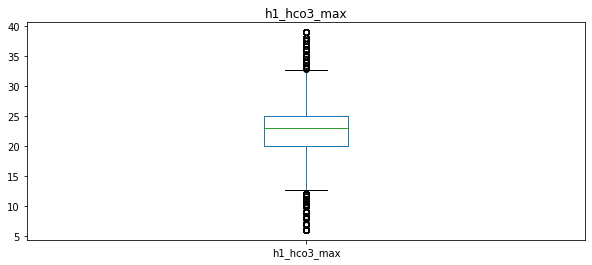

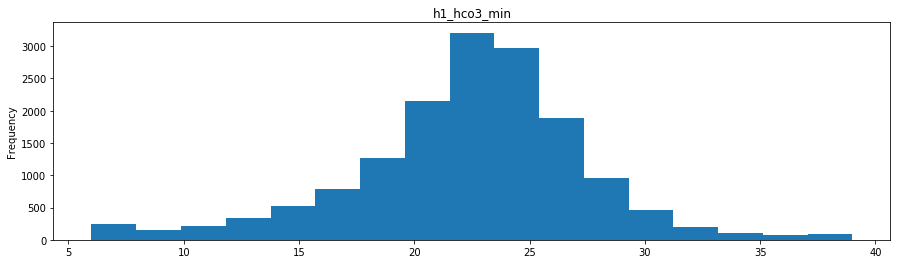

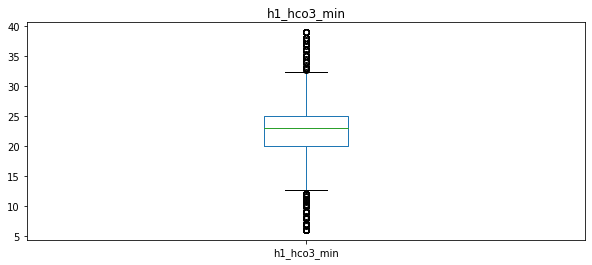

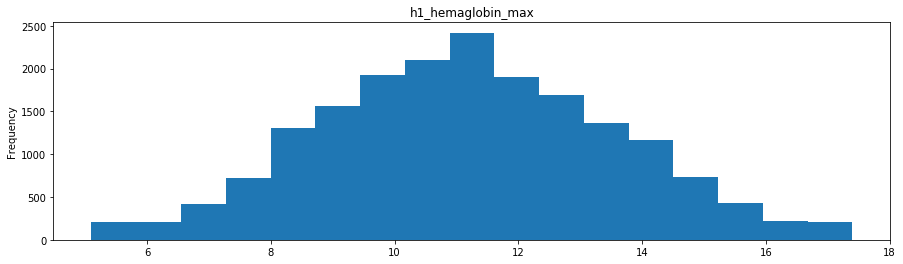

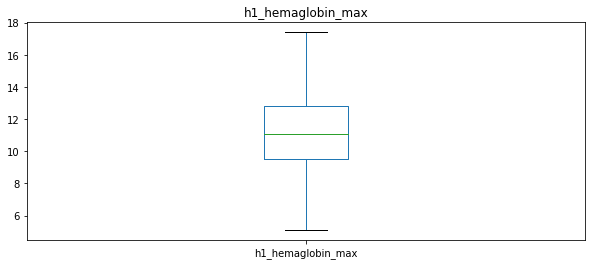

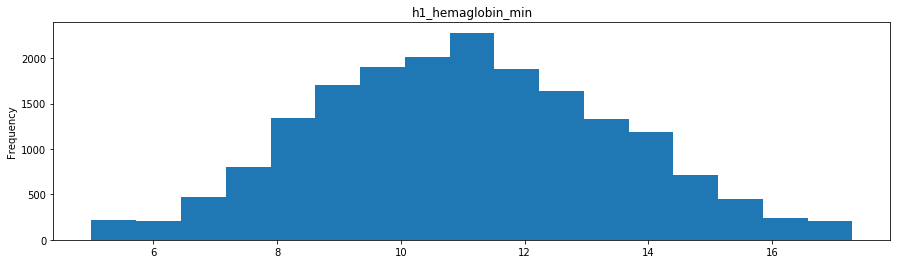

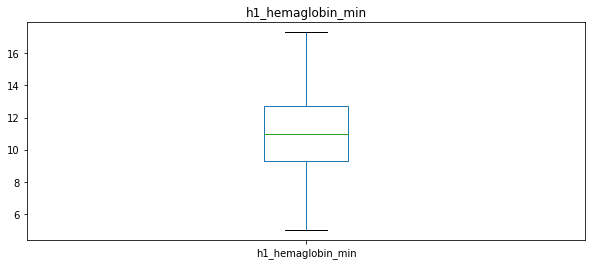

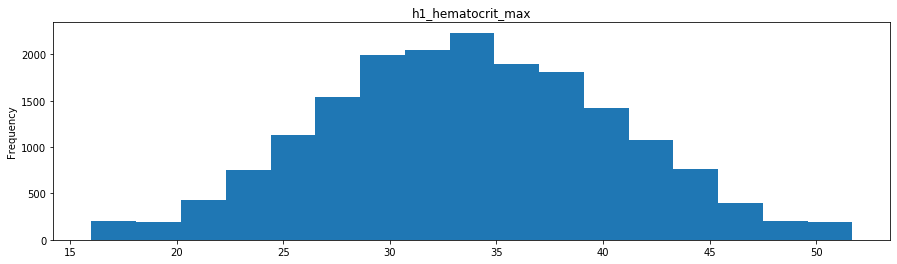

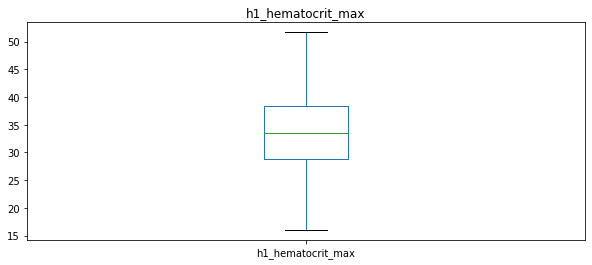

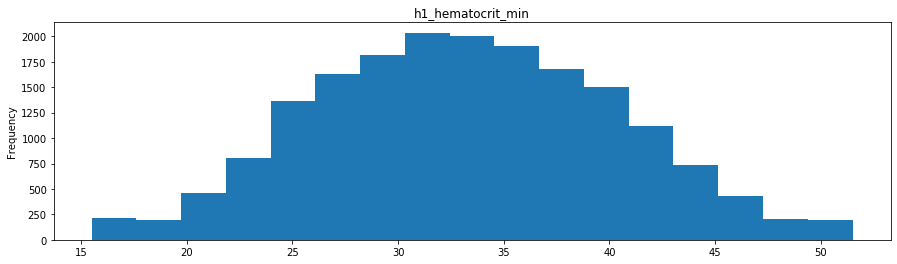

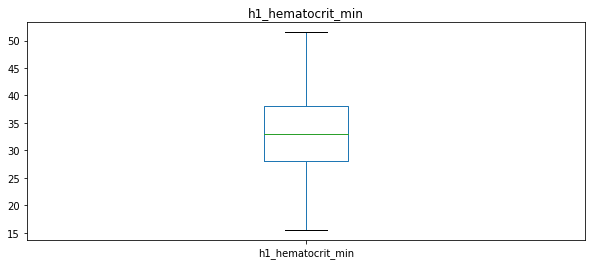

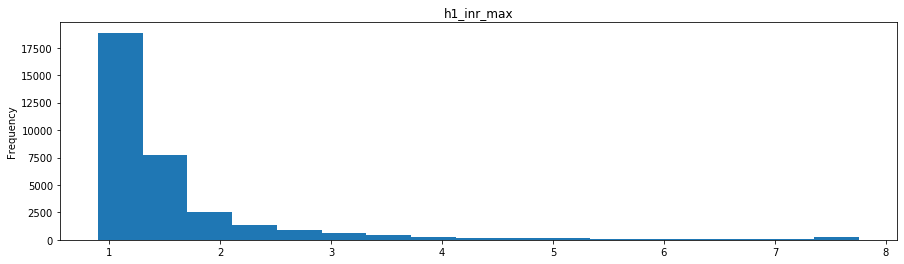

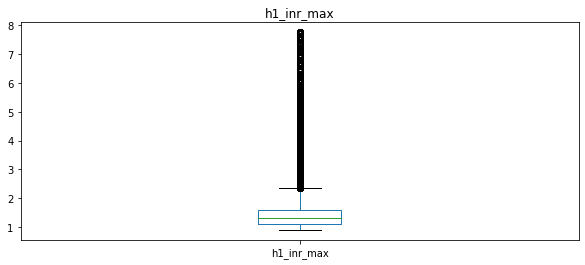

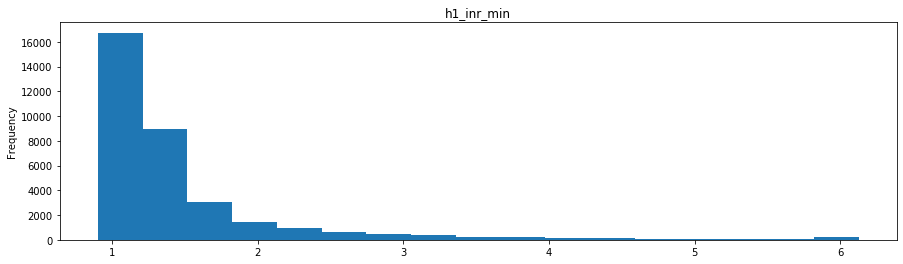

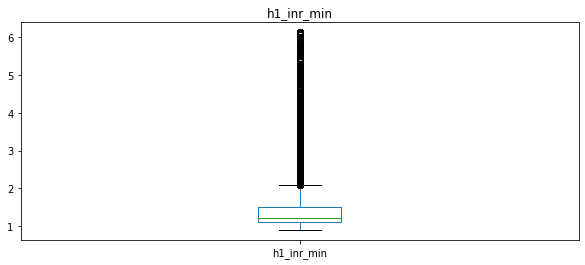

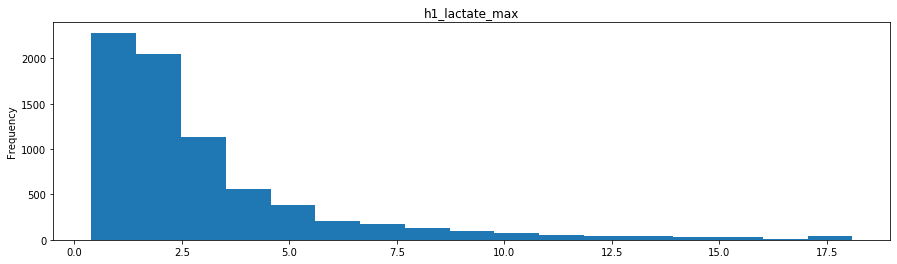

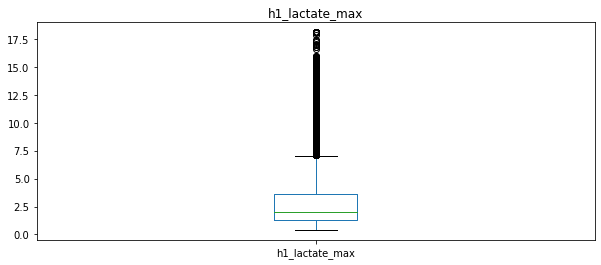

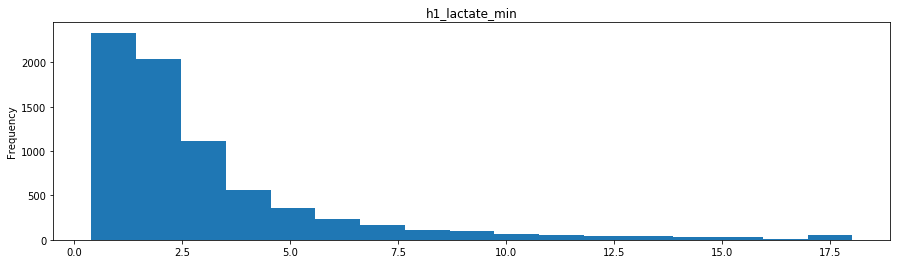

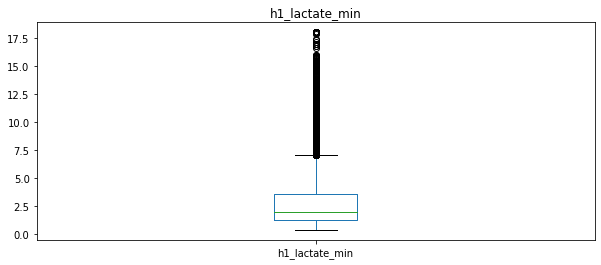

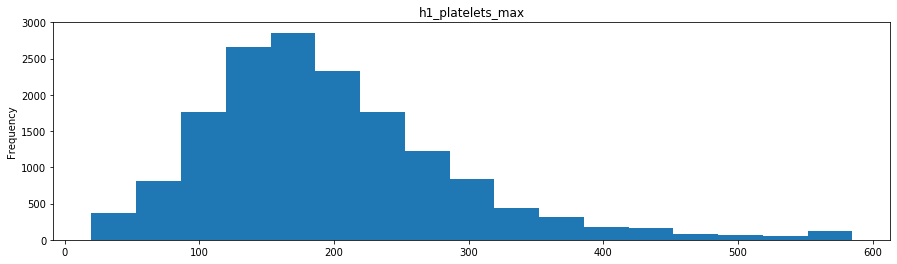

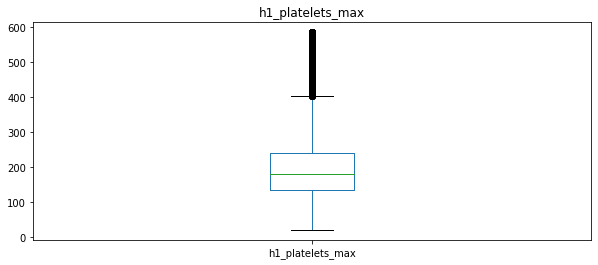

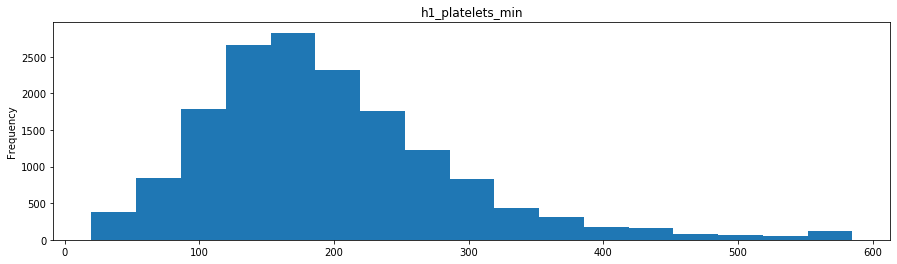

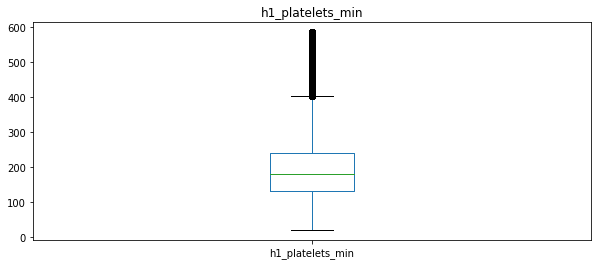

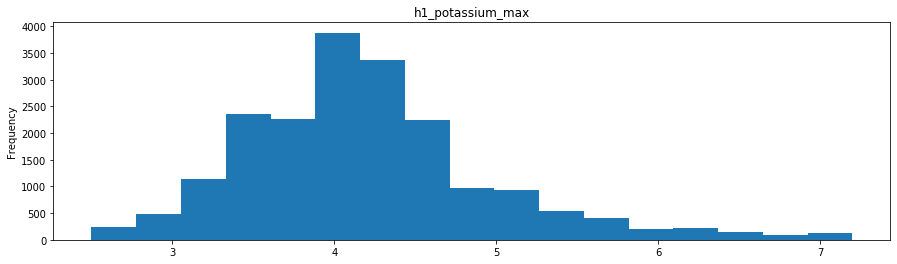

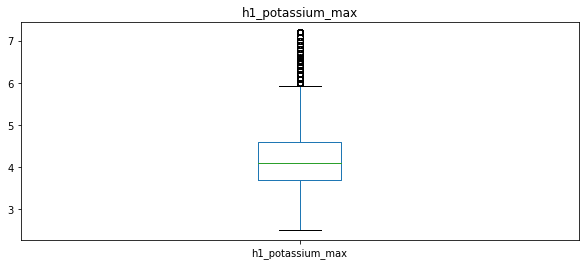

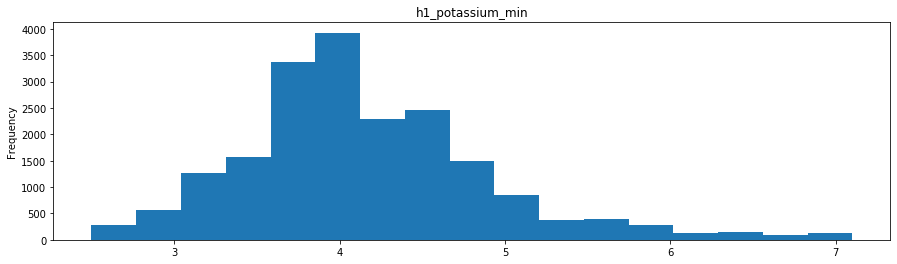

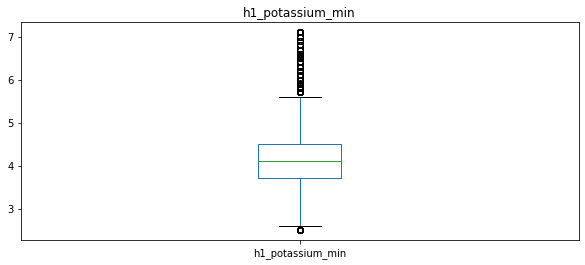

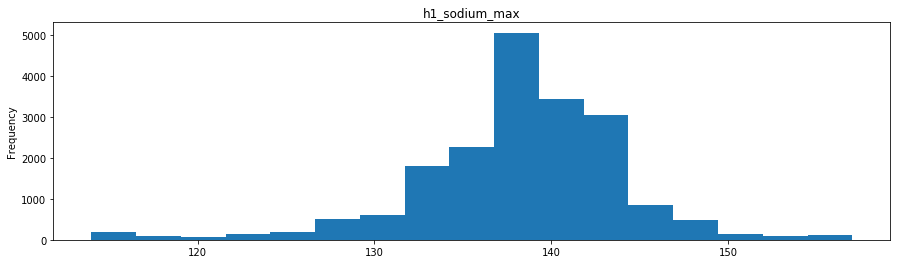

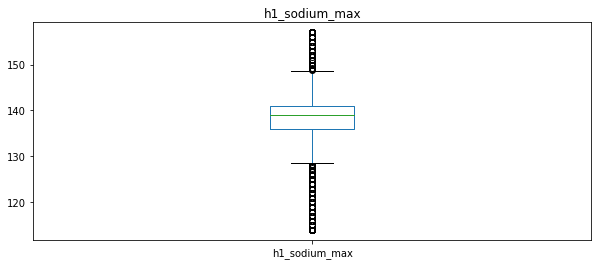

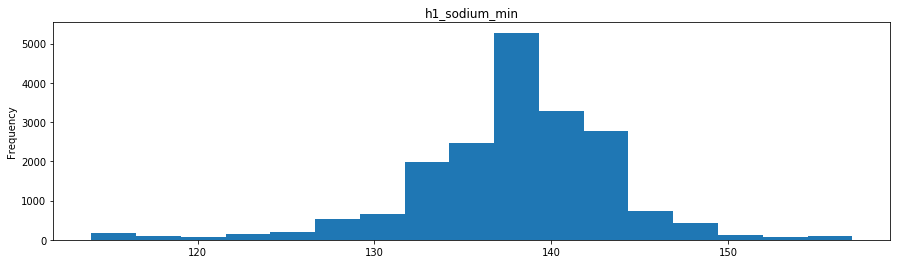

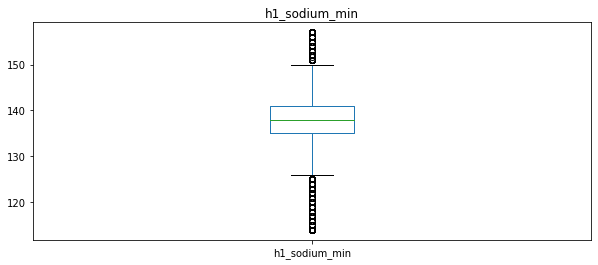

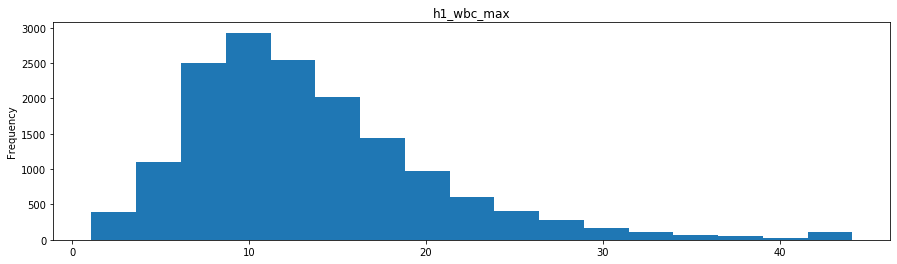

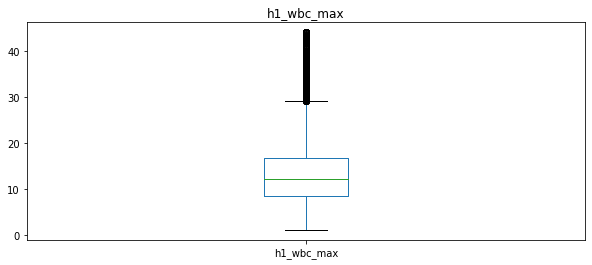

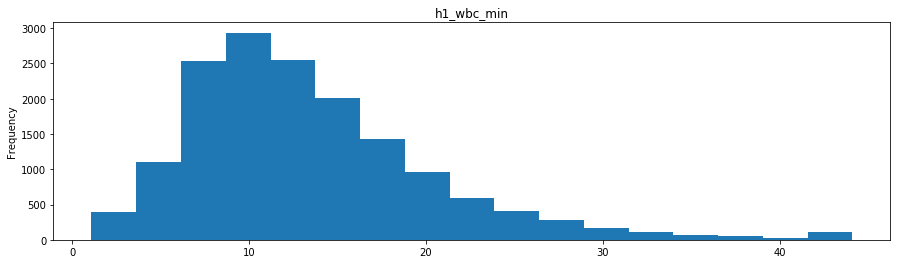

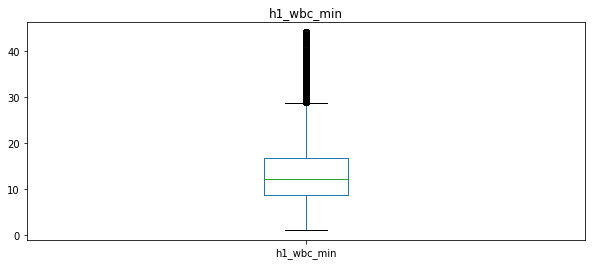

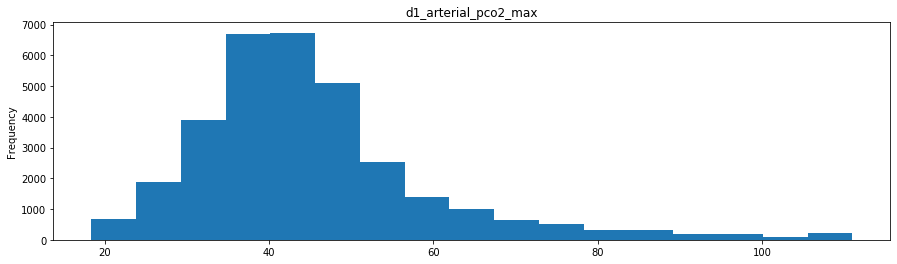

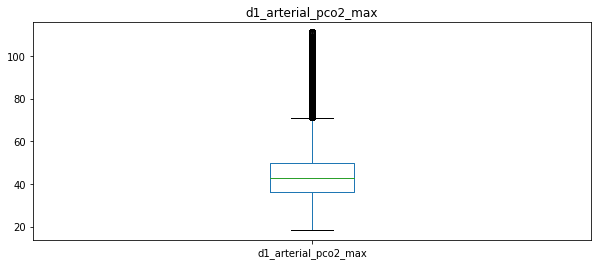

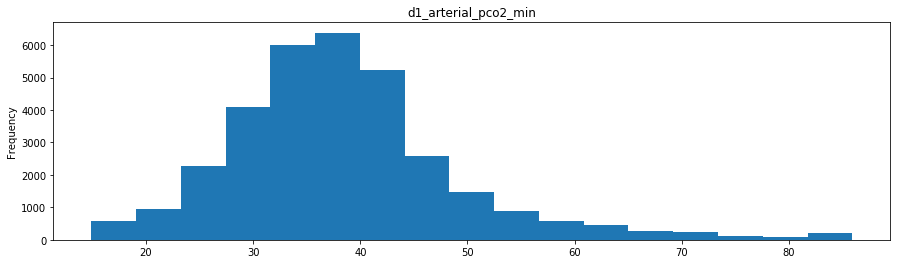

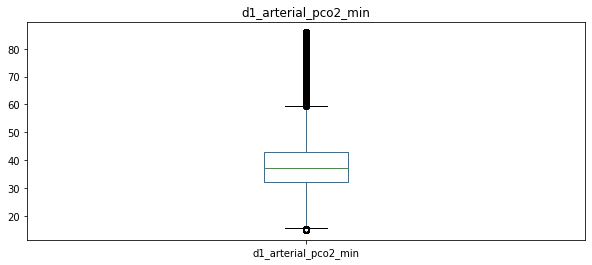

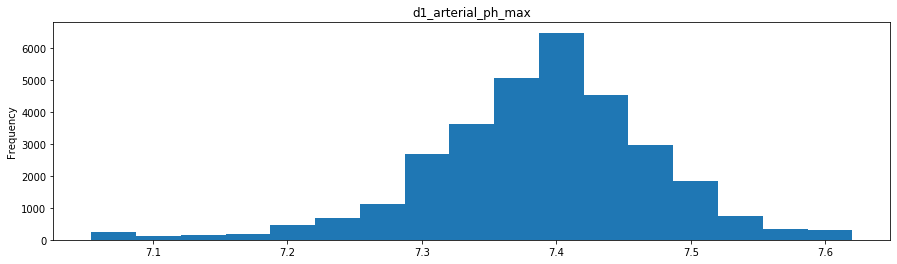

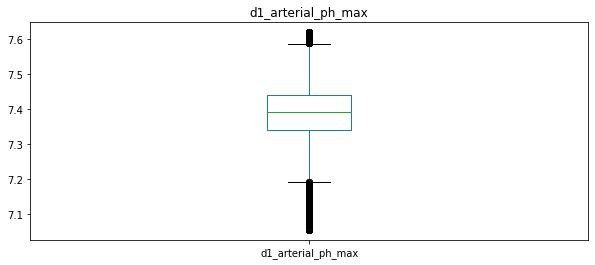

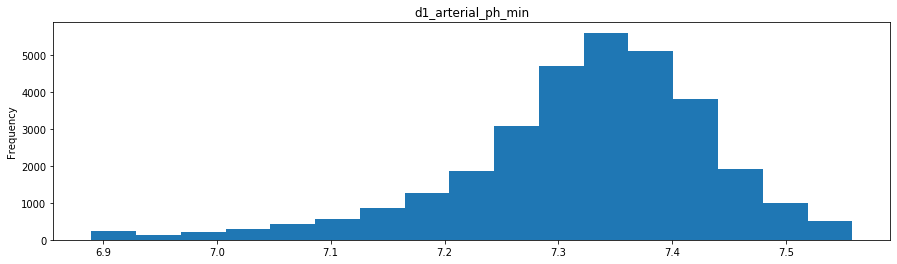

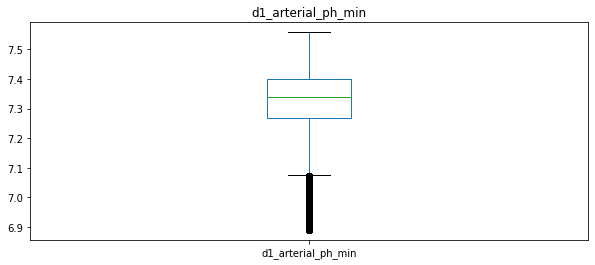

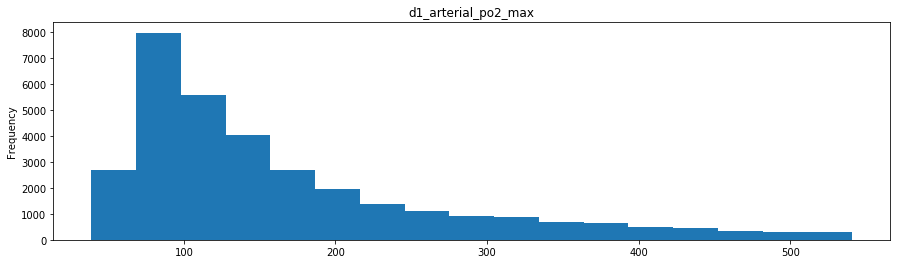

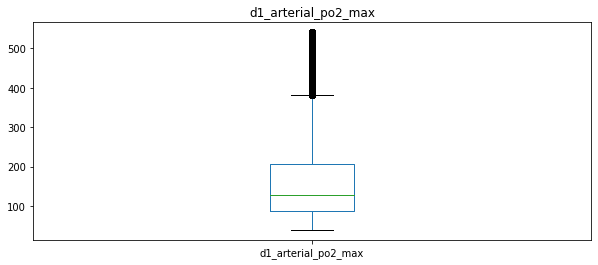

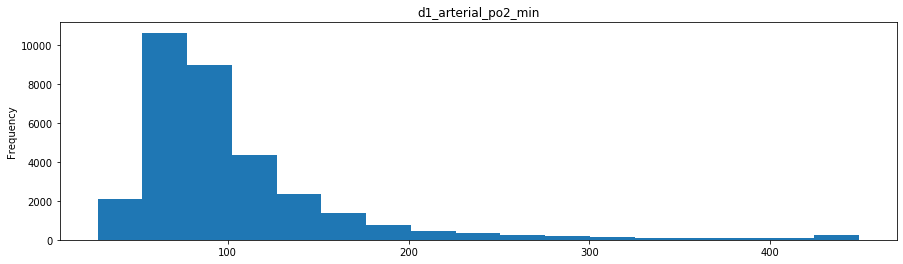

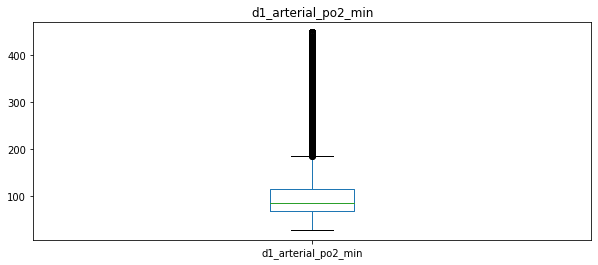

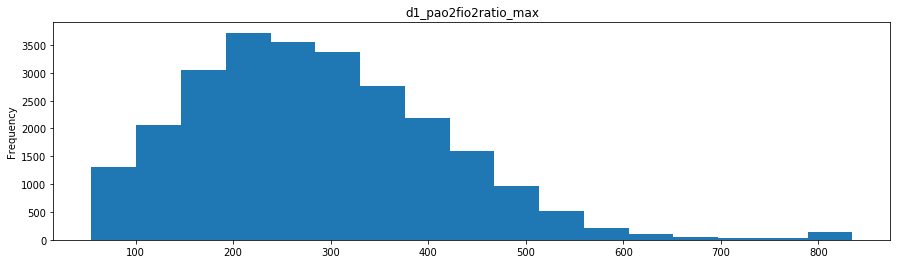

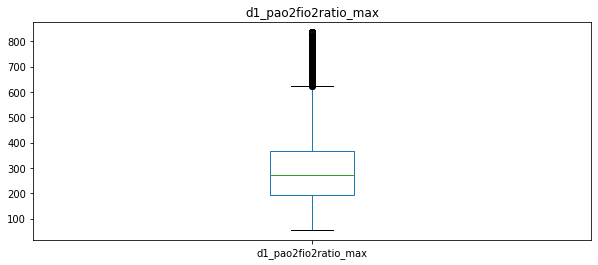

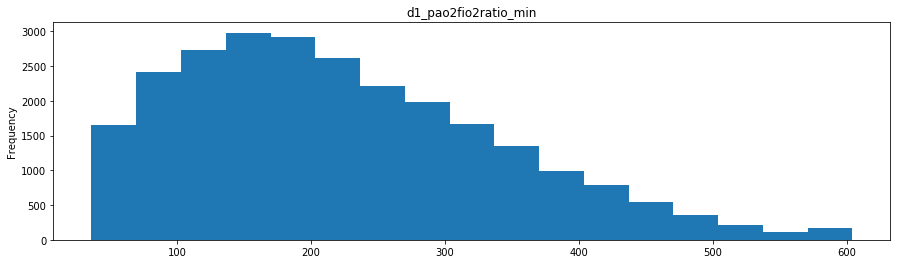

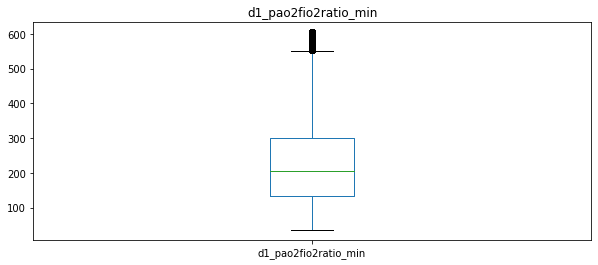

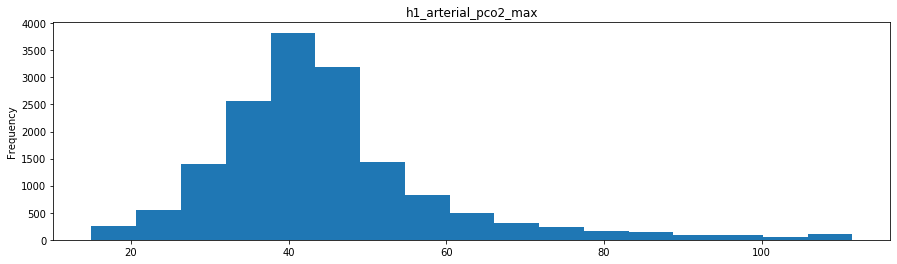

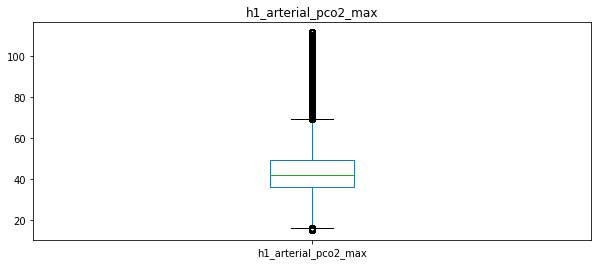

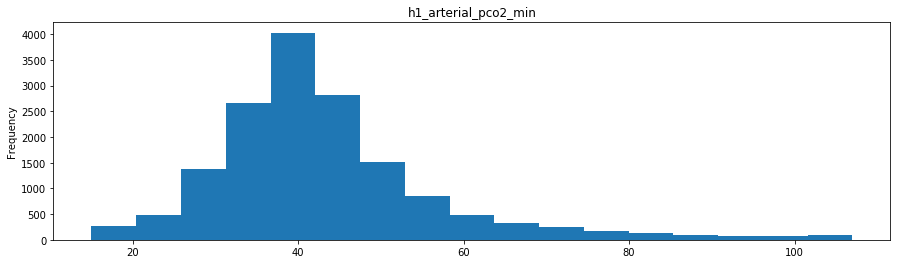

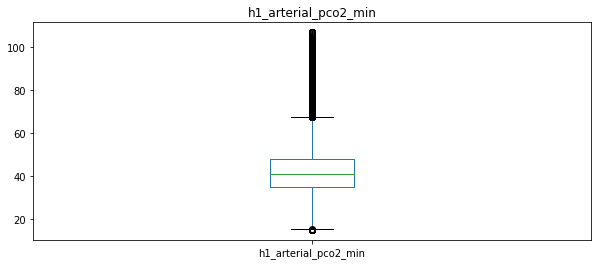

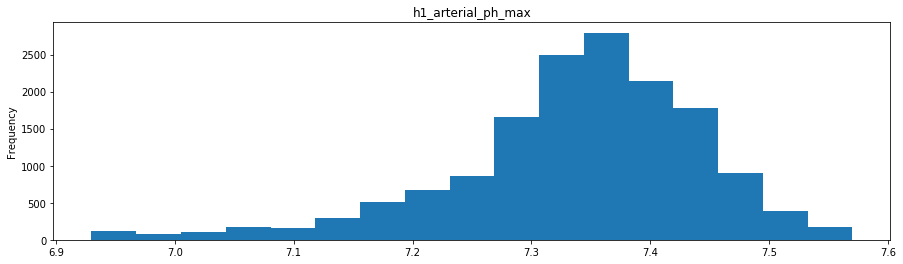

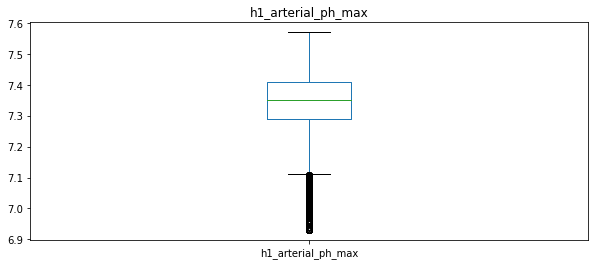

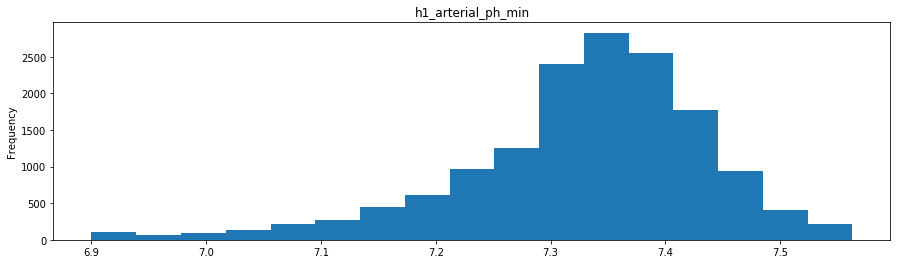

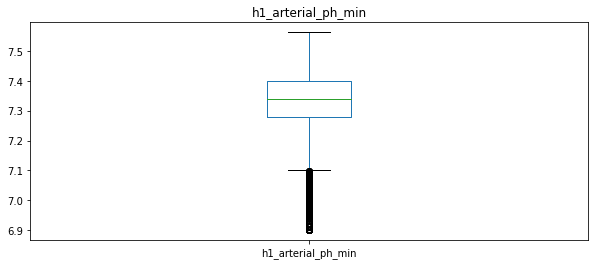

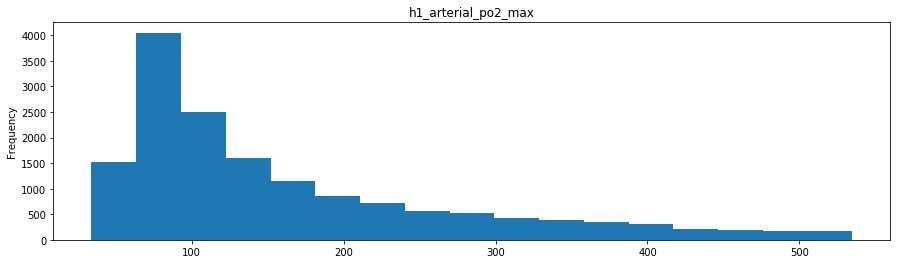

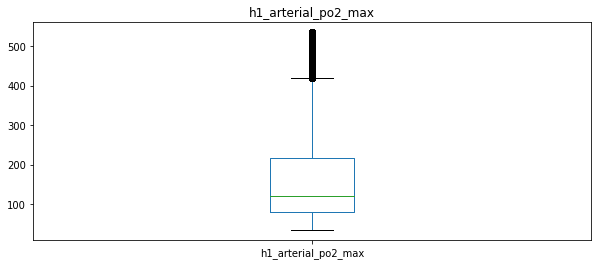

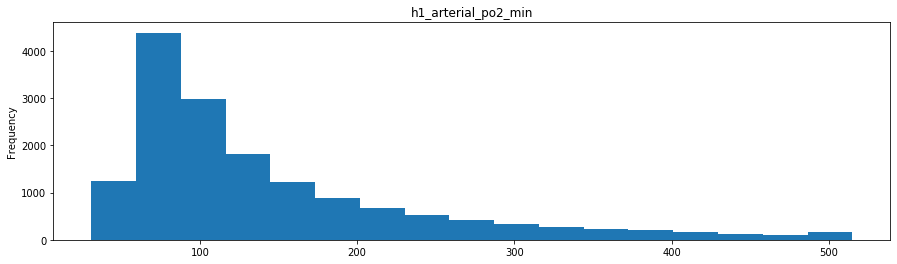

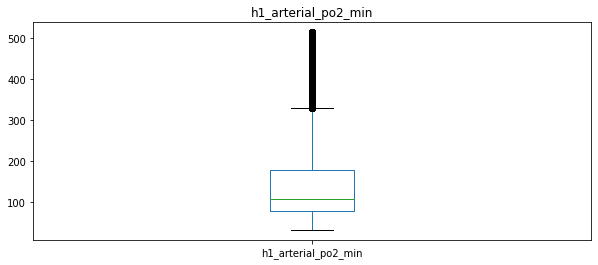

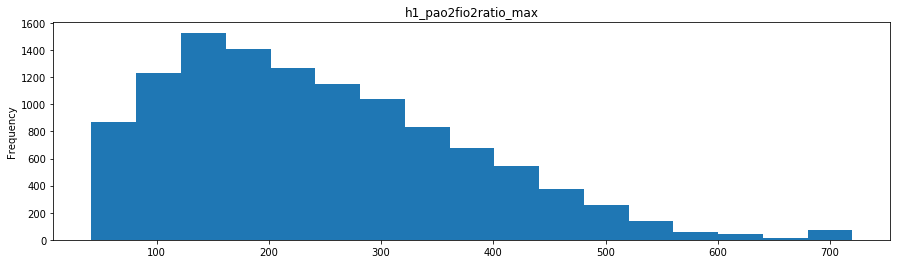

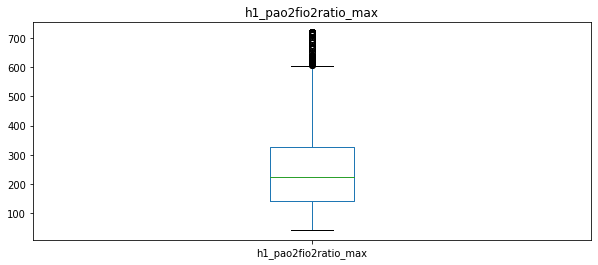

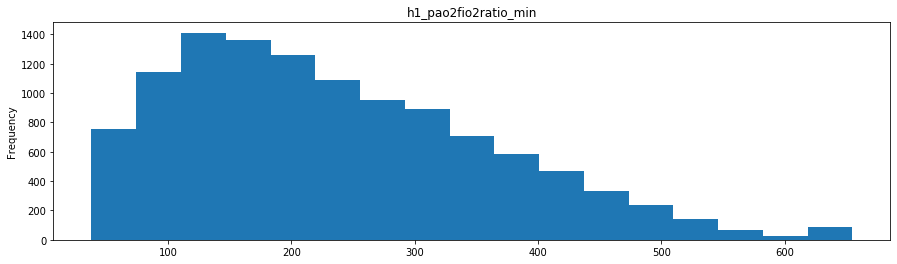

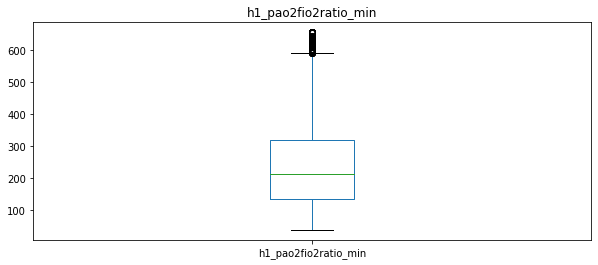

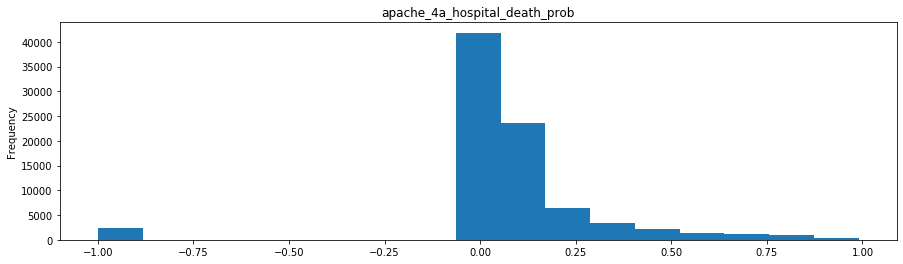

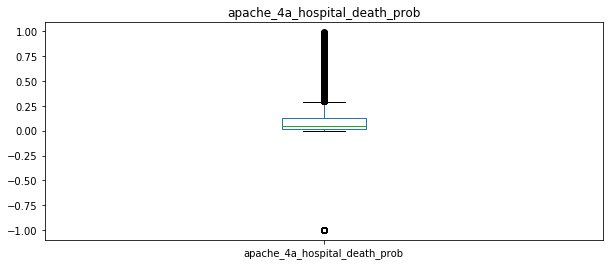

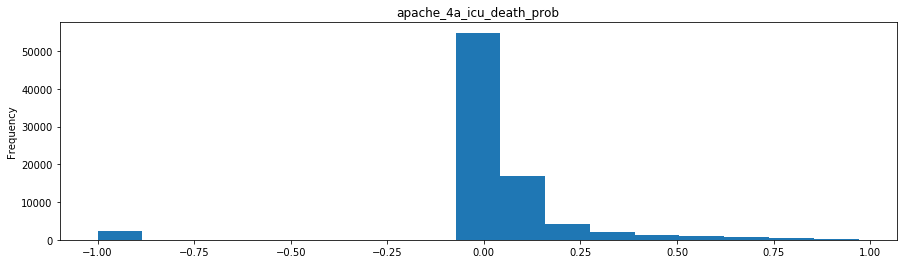

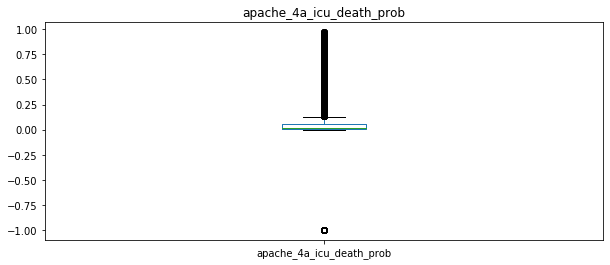

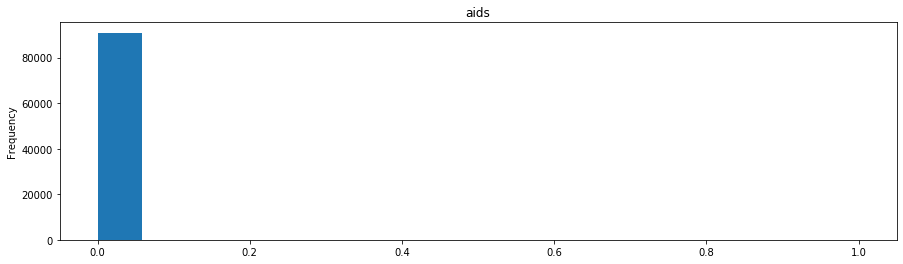

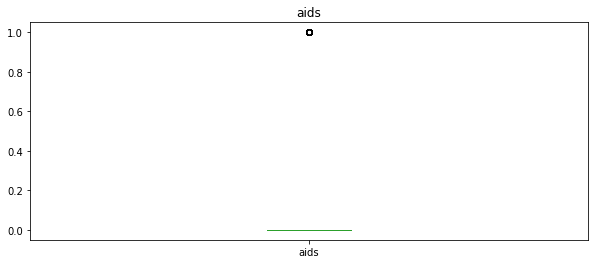

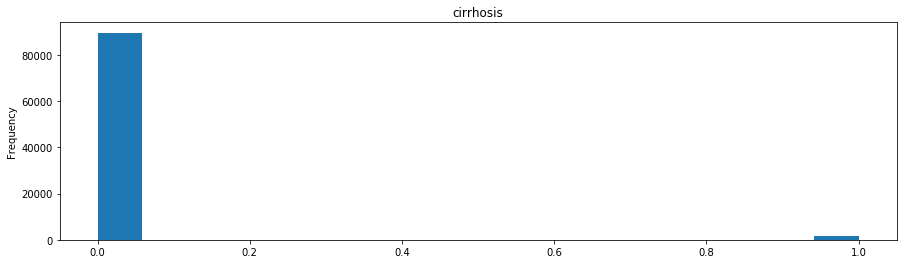

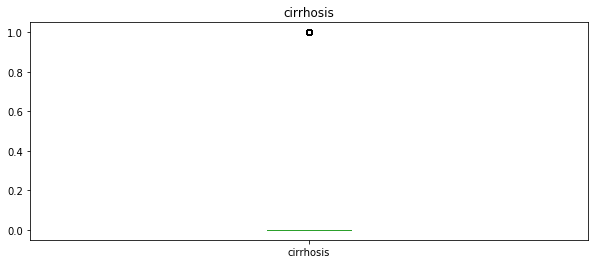

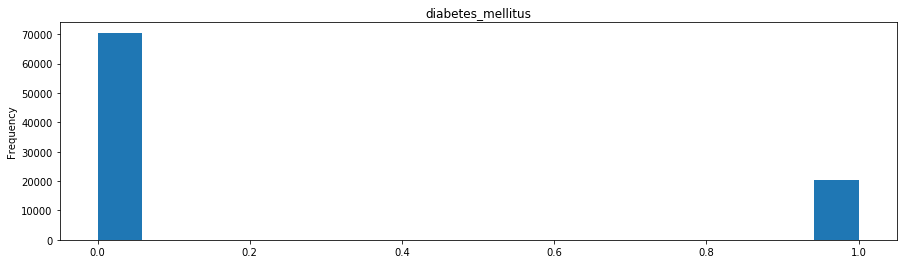

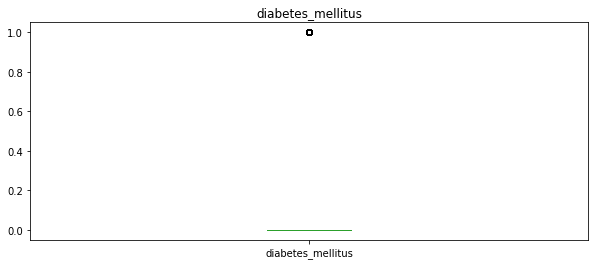

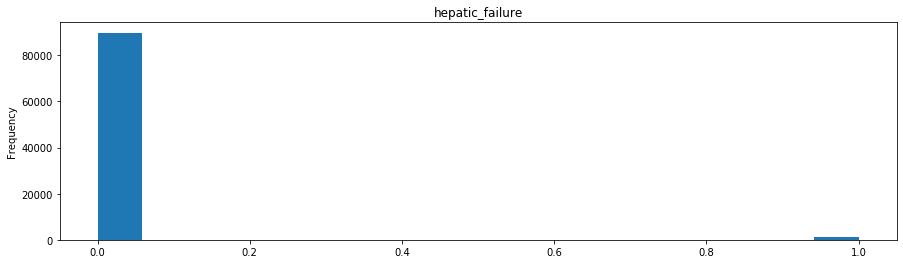

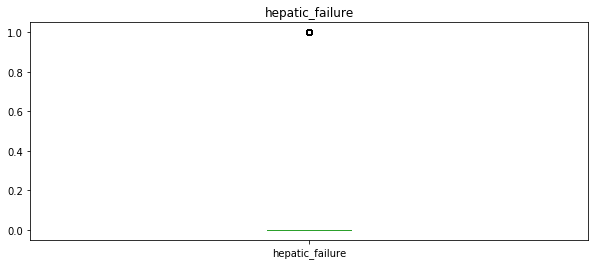

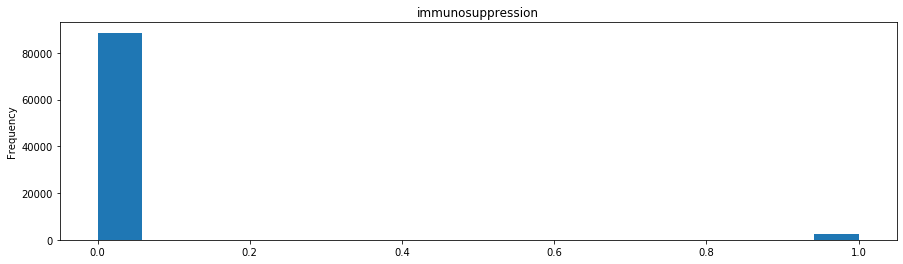

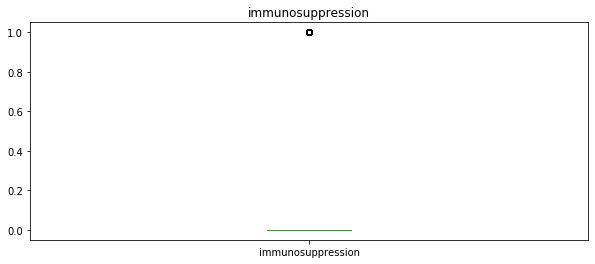

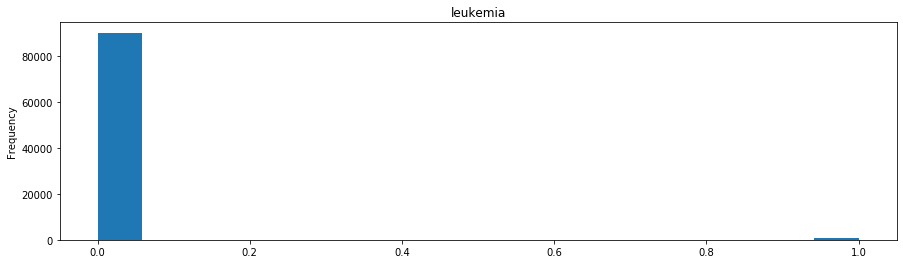

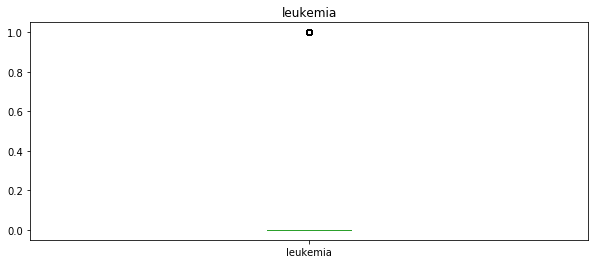

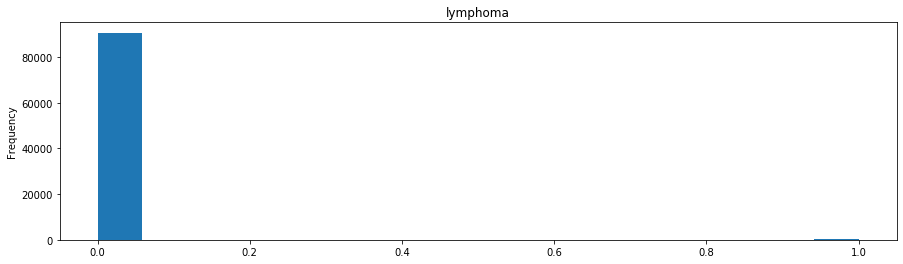

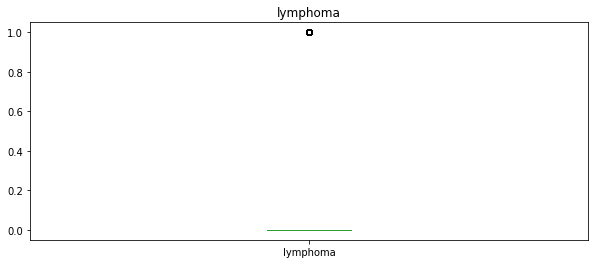

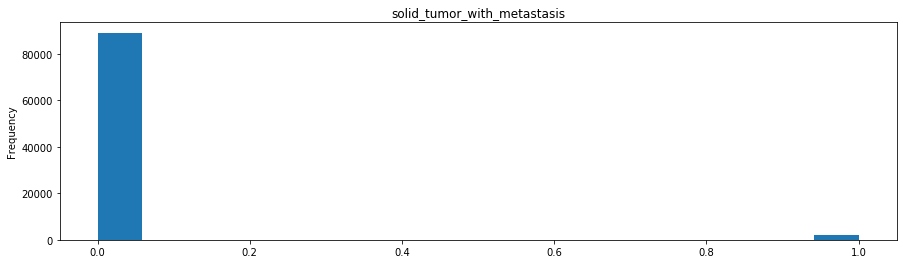

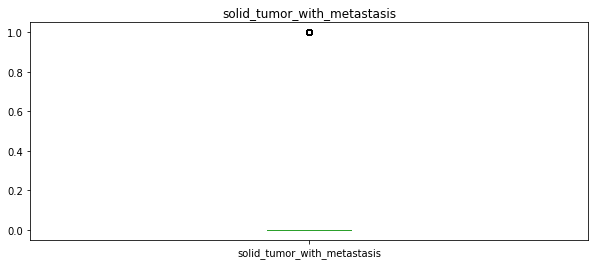

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = data.select_dtypes(include=numerics)
for i in range(len(df.columns)):
    fig = df.iloc[:,i].plot(kind='hist', bins=17, figsize=(15,4))
    plt.title(df.columns[i])
    plt.show()
    fig = df.iloc[:,i].plot(kind='box', figsize=(10,4))
    plt.title(df.columns[i])
    plt.show()    

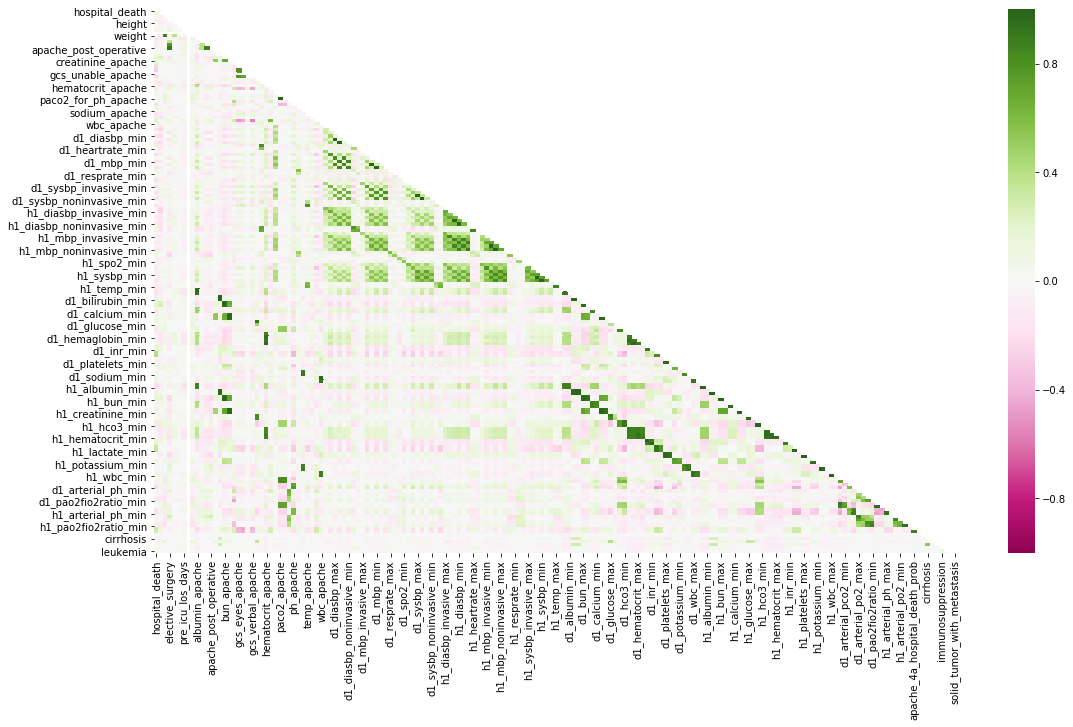

In [37]:
plt.figure(figsize=(18,10))
corr = data.iloc[:,3:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask, vmin=-1,cmap='PiYG', annot=False);
plt.yticks(rotation=0)
plt.xticks(rotation=90)
#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [23]:
corr['hospital_death'].sort_values(ascending=False)

hospital_death                   1.000000
d1_lactate_min                   0.403614
d1_lactate_max                   0.399029
h1_lactate_min                   0.344046
h1_lactate_max                   0.340951
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
ventilated_apache                0.228661
fio2_apache                      0.212249
h1_inr_max                       0.198641
d1_inr_max                       0.198641
d1_bun_max                       0.186558
bun_apache                       0.181435
d1_bun_min                       0.181383
d1_inr_min                       0.175804
h1_inr_min                       0.175804
intubated_apache                 0.173139
h1_bun_max                       0.167097
h1_bun_min                       0.166719
d1_heartrate_max                 0.162934
d1_wbc_max                       0.143862
d1_bilirubin_max                 0.139200
bilirubin_apache                 0.137464
wbc_apache                       0

In [54]:
corr['d1_lactate_min'].sort_values(ascending=False)

d1_lactate_min                   1.000000
d1_lactate_max                   0.829322
h1_lactate_min                   0.803146
h1_lactate_max                   0.787535
hospital_death                   0.403614
h1_inr_max                       0.309916
d1_inr_max                       0.309916
apache_4a_icu_death_prob         0.292416
apache_4a_hospital_death_prob    0.280129
h1_inr_min                       0.276621
d1_inr_min                       0.276621
fio2_apache                      0.221225
d1_bilirubin_max                 0.216370
bilirubin_apache                 0.208000
d1_potassium_max                 0.206672
h1_bilirubin_max                 0.202756
h1_bilirubin_min                 0.202607
d1_bilirubin_min                 0.192693
intubated_apache                 0.168490
ventilated_apache                0.165253
d1_heartrate_max                 0.165096
d1_wbc_max                       0.162174
d1_glucose_max                   0.156812
wbc_apache                       0

In [83]:
null = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/len(data))
null

,0
h1_bilirubin_min,0.922650
h1_bilirubin_max,0.922650
h1_lactate_max,0.919924
h1_lactate_min,0.919924
h1_albumin_min,0.913982
h1_albumin_max,0.913982
h1_pao2fio2ratio_min,0.874413
h1_pao2fio2ratio_max,0.874413
h1_arterial_ph_min,0.833295
h1_arterial_ph_max,0.833295


## Dropping Missing Values

In [53]:
#Drop all missing Values
print("Orginal shape before dropna()" ,data.shape)
drop = data.dropna(axis = 1)
print("Shape after dropna" ,drop.shape)
print(drop.columns)

Orginal shape before dropna() (91713, 186)
Shape after dropna (91713, 11)
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death',
       'elective_surgery', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'readmission_status', 'apache_post_operative'],
      dtype='object')


In [70]:
# Drop columns based on threshold limit
threshold = len(df) * 0.60
df_thresh=data.dropna(axis=1, thresh=threshold)
# View columns in the dataset
print("Shape after dropna with threshold",df_thresh.shape)

Shape after dropna with threshold (91713, 112)


Overview: Number of missing values and correlation with death variable

In [88]:
rel = corr[abs(corr)>0.2]
rel = pd.DataFrame(abs(rel['hospital_death']).sort_values(ascending = False).dropna())
rel = rel.merge(null, left_index=True, right_index=True)
rel.columns = ['cor_death','NA']
rel

,cor_death,NA
hospital_death,1.000000,0.000000
d1_lactate_min,0.403614,0.745761
d1_lactate_max,0.399029,0.745761
h1_lactate_min,0.344046,0.919924
h1_lactate_max,0.340951,0.919924
apache_4a_hospital_death_prob,0.311043,0.086651
apache_4a_icu_death_prob,0.283913,0.086651
gcs_motor_apache,0.282449,0.020728
gcs_eyes_apache,0.260373,0.020728
gcs_verbal_apache,0.241044,0.020728


## Modeling

In [127]:
#Importing the classifiers
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import ShuffleSplit #Cross-Validation
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import time

In [191]:
models = [
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    SVC(),
    DecisionTreeClassifier(criterion='gini',max_depth=None),
    RandomForestClassifier(n_estimators=600),
    AdaBoostClassifier(),
    MLPClassifier()
]

In [129]:
from sklearn.model_selection import train_test_split

In [150]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [144]:
non_num = data.select_dtypes(exclude=numerics)

Filling na with "999"

In [181]:
num = data.select_dtypes(include=numerics).fillna(999)

In [182]:
non_num = non_num.fillna("unknown")

In [183]:
non_num = non_num.apply(LabelEncoder().fit_transform)

In [184]:
data = pd.concat([num,non_num],axis=1)

In [186]:
i_split = 0.20
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,4:], data.iloc[:,3], test_size=i_split,
                                                    random_state=1234)

In [192]:
comparison = []

for model in models:
    classifier_name = str(type(model).__name__)
    list_of_labels = sorted(list(set(y_train)))
    fit = model.fit(X_train, y_train)
    now = time.time()
    predictions = fit.predict(X_test)

    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    cms = confusion_matrix(y_test,predictions)
    
    comparison.append([classifier_name, str(round(accuracy*100,2))+'%',str(round(time.time()-now,4))+'s'])
    
comparison = pd.DataFrame(comparison)
comparison.columns = ['Model','Accuracy','Prediction Time']
comparison.set_index('Model')

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:14

,Accuracy,Prediction Time
Model,,
BernoulliNB,90.03%,0.1271s
GaussianNB,77.3%,0.1451s
KNeighborsClassifier,90.73%,270.1089s
LogisticRegression,92.09%,0.06s
SGDClassifier,67.18%,0.055s
LinearSVC,88.85%,0.048s
SVC,91.36%,310.1151s
DecisionTreeClassifier,88.37%,0.0591s
RandomForestClassifier,92.93%,4.1639s


In [193]:
comparison.sort_values("Accuracy", ascending=False)

,Model,Accuracy,Prediction Time
8,RandomForestClassifier,92.93%,4.1639s
9,AdaBoostClassifier,92.62%,0.7565s
3,LogisticRegression,92.09%,0.06s
10,MLPClassifier,91.4%,0.1861s
6,SVC,91.36%,310.1151s
2,KNeighborsClassifier,90.73%,270.1089s
0,BernoulliNB,90.03%,0.1271s
5,LinearSVC,88.85%,0.048s
7,DecisionTreeClassifier,88.37%,0.0591s
1,GaussianNB,77.3%,0.1451s


* Random Forest, AdaBoost or Logistic Regression all perform >92%

Next steps:
* Feature Selection
* Feature Normalization / NA handling
* Model parameter selection

In [197]:
fit = RandomForestClassifier(n_estimators=600).fit(X_train, y_train)
predictions = fit.predict(X_test)

In [202]:
importances = fit.feature_importances_

In [217]:
parameters = pd.Series(fit.feature_importances_, index=X_train.columns).sort_values(ascending=False)
parameters

apache_4a_hospital_death_prob    0.038062
apache_4a_icu_death_prob         0.034971
d1_spo2_min                      0.015743
d1_sysbp_min                     0.015370
d1_heartrate_min                 0.014158
d1_sysbp_noninvasive_min         0.014124
d1_arterial_ph_min               0.014100
apache_3j_diagnosis              0.013752
gcs_motor_apache                 0.013123
d1_temp_min                      0.012868
temp_apache                      0.011518
d1_mbp_min                       0.011394
d1_temp_max                      0.010759
gcs_eyes_apache                  0.010630
d1_mbp_noninvasive_min           0.010046
age                              0.009620
d1_heartrate_max                 0.009416
pre_icu_los_days                 0.009369
d1_hco3_min                      0.009362
d1_platelets_min                 0.009012
heart_rate_apache                0.008926
d1_creatinine_max                0.008775
d1_glucose_min                   0.008666
d1_bun_max                       0

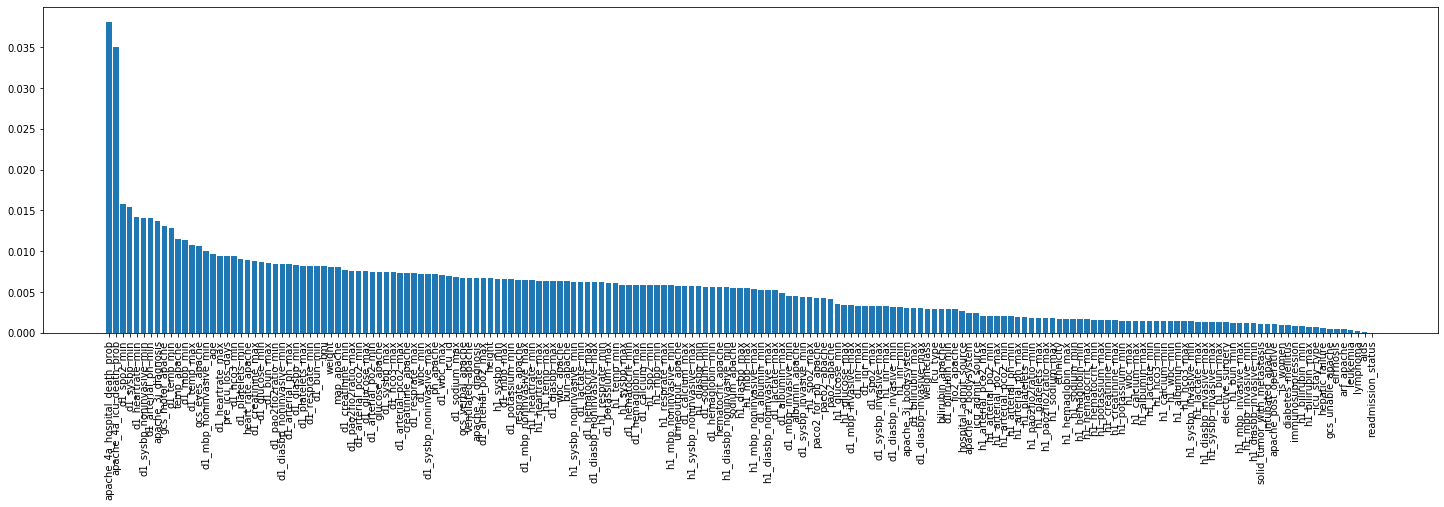

In [247]:
plt.figure(figsize=(25,6))
plt.bar(parameters.index, parameters)
plt.xticks(rotation="vertical")
plt.show()